<a href="https://colab.research.google.com/github/tivanello/fase2/blob/main/notebooks/TECH_CHALLENGE_FASE_02_Eduardo_Gil_Tivanello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você foi recentemente alocado em uma equipe de cientistas de dados de um grande fundo de investimentos brasileiro. Sua missão inicial é desenvolver um modelo preditivo capaz de prever se o índice IBOVESPA vai fechar em alta ou baixa no dia seguinte, com base em dados históricos do próprio índice. Esse modelo será usado como insumo para alimentar dashboards internos de tomada de decisão dos analistas quantitativos da empresa.
# Dados
Utilize os dados históricos do índice IBOVESPA, disponíveis publicamente: https://br.investing.com/indices/bovespa-historical-data

# Requisitos:
• Selecione o período “diário”.
• Baixe um intervalo de pelo menos 2 anos de dados.
• Realize o pré-processamento necessário para utilizar os dados no
modelo.

# Objetivo
Criar um modelo que preveja se o fechamento do IBOVESPA do dia seguinte será maior ou menor que o do dia atual, ou seja: Seu modelo deve prever a tendência (↑ ou ↓) com acuracidade mínima de 75% em um conjunto de teste. O conjunto de testes deverá conter o último mês (30 dias) de dados disponíveis.

# Entregas Esperadas
Você deverá apresentar ao time de investimentos:
Storytelling Técnico
Apresentação com os seguintes requisitos:
• Aquisição e exploração dos dados;
• Estratégia de engenharia de atributos, caso seja realizado (por exemplo: variações, médias móveis, etc)
• Preparação da base para previsão (definição de target, janela de tempo, etc.);
• Escolha e justificativa do modelo utilizado;
• Resultados e análise de métricas que garantem que o modelo está confiável;

# Justificativa Técnica
Explique claramente:
• Por que você escolheu o(s) modelo(s) utilizados (ex: árvores, regressão logística, LSTM, etc.);
• Como tratou a natureza sequencial dos dados (ex: janelas deslizantes, features lagged);
• Quais os trade-offs entre acuracidade e overfitting.

#Quais documentos devo subir na plataforma? As entregas deverão conter necessariamente:
• Uma pasta zip contendo todos os arquivos do projeto, ou um link para o repositório do GitHub com seu projeto.
• Apresentação do storytelling. Pode ser em PPT, PDF ou ferramentas da sua preferência, como o CANVAS, por exemplo.
• Vídeo de no máximo 5 (cinco) minutos, com uma visão gerencial, explicando como interpretar os resultados obtidos. Note que é necessário que todos os membros do grupo apareçam no vídeo.

**Dica: Utilize o maior intervalo de tempo possível para atingir maior  acuracidade no modelo preditivo.**

Lembre-se que você poderá apresentar o desenvolvimento do seu projeto durante as lives e grupos de estudo com os(as) docentes. Essas são ótimas oportunidades para discutir sobre as dificuldades encontradas, além de pegar dicas valiosas com especialistas e colegas de turma. Não se esqueça que isso é um entregável obrigatório! Se atente para o prazo de entrega até o final da fase.

## **Importação dos arquivos.**

 tentei importar toda a série histórica, à partir de 01/08/1994,  porém o arquivo vinha apenas até 10/10/2014. Como solução realizei a importação de  dois arquivos e realizada junção dos dois nas linhas de comando abaixo. Iremos trabalhar com o arquivo com a série hitórica de 01/08/1994 até 01/08/2025

In [62]:
import os
import pandas as pd

# 1) Clona o repositório (uma vez por sessão)
REPO_URL = "https://github.com/tivanello/fase2.git"
PASTA_REPO = "/content/fase2"

if not os.path.exists(PASTA_REPO):
    !git clone {REPO_URL} {PASTA_REPO}

# 2) Caminhos dentro do repo (exemplo: data/raw)
arquivo1 = f"{PASTA_REPO}/data/raw/Dados Históricos - Ibovespa 11-10-2014 01-08-2025.csv"
arquivo2 = f"{PASTA_REPO}/data/raw/Dados Históricos - Ibovespa 1994 10-10-2014.csv"

# 3) Carrega e unifica
df1 = pd.read_csv(arquivo1, thousands='.', decimal=',')
df2 = pd.read_csv(arquivo2, thousands='.', decimal=',')

df_ibovespa_baixado = pd.concat([df1, df2], ignore_index=True)
df_ibovespa_baixado.head()


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,1082025,132644,132920,133237,132571,"4,88M","-0,32%"
1,31072025,133071,133987,133987,132096,"9,20B","-0,69%"
2,30072025,133990,132702,134368,131883,"8,66B","0,95%"
3,29072025,132726,132130,133346,132130,"6,32B","0,45%"
4,28072025,132129,133538,133902,131550,"6,63B","-1,04%"


In [63]:
# Cria uma cópia para trabalhar e não precisar baixar todo tempo
df_ibovespa = df_ibovespa_baixado.copy()
df_ibovespa.head()


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,1082025,132644,132920,133237,132571,"4,88M","-0,32%"
1,31072025,133071,133987,133987,132096,"9,20B","-0,69%"
2,30072025,133990,132702,134368,131883,"8,66B","0,95%"
3,29072025,132726,132130,133346,132130,"6,32B","0,45%"
4,28072025,132129,133538,133902,131550,"6,63B","-1,04%"


In [64]:
# Verifica a quantidade de linhas e colunas
linhas, colunas = df_ibovespa.shape
print("Linhas:", linhas)
print("Colunas:", colunas)

Linhas: 7679
Colunas: 7


In [65]:
# Verifica o nome das colunas
for c in df_ibovespa.columns:
    print(c)


Data
Último
Abertura
Máxima
Mínima
Vol.
Var%


Alterar os nomes das colunas retirando o maiusculo e acentuação e Vol. para volume e Var% para variacao. Será necessário instalar a biblioteca unicode ( biblioteca Python que remove acentos e caracteres especiais, convertendo textos para versões ASCII simples)


In [54]:
pip install unidecode

In [66]:
import unidecode

# Renomeia colunas: remove acentos e converte para minúsculas
df_ibovespa.columns = [unidecode.unidecode(col).lower().replace('vol.', 'volume').replace('var%', 'variacao') for col in df_ibovespa.columns]

# Visualiza o novo nome das colunas
print(df_ibovespa.columns)

Index(['data', 'ultimo', 'abertura', 'maxima', 'minima', 'volume', 'variacao'], dtype='object')


In [67]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao
0,1082025,132644,132920,133237,132571,"4,88M","-0,32%"
1,31072025,133071,133987,133987,132096,"9,20B","-0,69%"
2,30072025,133990,132702,134368,131883,"8,66B","0,95%"
3,29072025,132726,132130,133346,132130,"6,32B","0,45%"
4,28072025,132129,133538,133902,131550,"6,63B","-1,04%"


In [68]:
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   data      7679 non-null   int64 
 1   ultimo    7679 non-null   int64 
 2   abertura  7679 non-null   int64 
 3   maxima    7679 non-null   int64 
 4   minima    7679 non-null   int64 
 5   volume    7678 non-null   object
 6   variacao  7679 non-null   object
dtypes: int64(5), object(2)
memory usage: 420.1+ KB


Analisando o arquivo notei que a data não esta no formato correto, sendo necessária a sua formação


In [69]:
import pandas as pd

# Converte DDMMAAAA -> datetime (bom para ML)
df_ibovespa["data"] = pd.to_datetime(
    df_ibovespa["data"].astype(str).str.zfill(8),
    format="%d%m%Y",
    errors="coerce"
)

# Ordena por data
df_ibovespa = df_ibovespa.sort_values("data").reset_index(drop=True)



Verificando a formatação de cada coluna e se existem campos vazios ou nulos

In [70]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao
0,1994-08-01,4152,4201,4223,4091,"5,39B","-1,17%"
1,1994-08-02,4311,4152,4311,4152,"6,63B","3,83%"
2,1994-08-03,4392,4311,4426,4275,"6,88B","1,88%"
3,1994-08-04,4355,4392,4406,4321,"5,67B","-0,84%"
4,1994-08-05,4470,4355,4476,4329,"5,14B","2,64%"


In [71]:
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      7679 non-null   datetime64[ns]
 1   ultimo    7679 non-null   int64         
 2   abertura  7679 non-null   int64         
 3   maxima    7679 non-null   int64         
 4   minima    7679 non-null   int64         
 5   volume    7678 non-null   object        
 6   variacao  7679 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 420.1+ KB


Verifica se não há dados nulos

In [72]:
df_ibovespa.isnull().sum()

,0
data,0
ultimo,0
abertura,0
maxima,0
minima,0
volume,1
variacao,0


In [73]:
# Como a bese a grande, mais de 7.000 registros, será copiado o valor de volume do último pregrão para sanar o probelma desse valor nulo na variável "volume"

# garantir ordem por data (importante antes do ffill)
df_ibovespa = df_ibovespa.sort_values("data").reset_index(drop=True)

# preencher volume nulo com o valor anterior
df_ibovespa["volume"] = df_ibovespa["volume"].ffill()


In [74]:
# Mostra quantos valores nulos existem em "volume" e exibe as linhas com volume nulo
qtd_nulos = df_ibovespa["volume"].isnull().sum()
print("Qtd de nulos em volume:", qtd_nulos)

df_ibovespa[df_ibovespa["volume"].isnull()]

Qtd de nulos em volume: 0


,data,ultimo,abertura,maxima,minima,volume,variacao


In [75]:
df_ibovespa.info()
df_ibovespa.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data      7679 non-null   datetime64[ns]
 1   ultimo    7679 non-null   int64         
 2   abertura  7679 non-null   int64         
 3   maxima    7679 non-null   int64         
 4   minima    7679 non-null   int64         
 5   volume    7679 non-null   object        
 6   variacao  7679 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 420.1+ KB


,data,ultimo,abertura,maxima,minima,volume,variacao
0,1994-08-01,4152,4201,4223,4091,"5,39B","-1,17%"
1,1994-08-02,4311,4152,4311,4152,"6,63B","3,83%"
2,1994-08-03,4392,4311,4426,4275,"6,88B","1,88%"
3,1994-08-04,4355,4392,4406,4321,"5,67B","-0,84%"
4,1994-08-05,4470,4355,4476,4329,"5,14B","2,64%"


# Agora irei padronizar os tipos (dtypes) das colunas do DataFrame: manter "data" como datetime, converter "ultimo", "abertura", "maxima" e "minima" para float64, transformar "volume" (com sufixos K/M/B) em valor numérico float64 e converter "variacao" de percentual (texto) para float em fração.

In [ ]:
# DATA: garante que a coluna "data" está em datetime (se já estiver, não muda nada)
df_ibovespa["data"] = pd.to_datetime(df_ibovespa["data"], errors="coerce")


In [76]:
# ULTIMO: converte a coluna "ultimo" para float64
df_ibovespa["ultimo"] = df_ibovespa["ultimo"].astype("float64")


In [77]:
# ABERTURA: converte a coluna "abertura" para float64
df_ibovespa["abertura"] = df_ibovespa["abertura"].astype("float64")


In [78]:
# MAXIMA: converte a coluna "maxima" para float64
df_ibovespa["maxima"] = df_ibovespa["maxima"].astype("float64")


In [79]:
# VOLUME: converte texto com sufixos K/M/B para número (float64)
def converter_volume(v):
    if pd.isna(v):
        return np.nan
    s = str(v).strip().replace(".", "").replace(",", ".")
    mult = 1.0
    if s.endswith("K"):
        mult, s = 1e3, s[:-1]
    elif s.endswith("M"):
        mult, s = 1e6, s[:-1]
    elif s.endswith("B"):
        mult, s = 1e9, s[:-1]
    return float(s) * mult

df_ibovespa["volume"] = df_ibovespa["volume"].apply(converter_volume).astype("float64")


In [80]:
# VARIACAO: converte texto percentual (ex: "-1,17%") para float em fração (ex: -0.0117)
df_ibovespa["variacao"] = (
    df_ibovespa["variacao"].astype(str)
    .str.replace("%", "", regex=False)
    .str.replace(",", ".", regex=False)
)
df_ibovespa["variacao"] = pd.to_numeric(df_ibovespa["variacao"], errors="coerce") / 100


In [82]:
# MINIMA: converte a coluna "minima" para float64
df_ibovespa["minima"] = df_ibovespa["minima"].astype("float64")


In [83]:
# CHECK: mostra os tipos após as conversões
df_ibovespa.dtypes



,0
data,datetime64[ns]
ultimo,float64
abertura,float64
maxima,float64
minima,float64
volume,float64
variacao,float64


In [84]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao
0,1994-08-01,4152.0,4201.0,4223.0,4091.0,5.390000e+09,-0.0117
1,1994-08-02,4311.0,4152.0,4311.0,4152.0,6.630000e+09,0.0383
2,1994-08-03,4392.0,4311.0,4426.0,4275.0,6.880000e+09,0.0188
3,1994-08-04,4355.0,4392.0,4406.0,4321.0,5.670000e+09,-0.0084
4,1994-08-05,4470.0,4355.0,4476.0,4329.0,5.140000e+09,0.0264


Necessidade de criar a minha variável de tendência, onde:

1 = O fechamento do IBOVESPA no dia seguinte será maior que o de hoje (alta)

0 = O fechamento do IBOVESPA no dia seguinte será igual ou menor que o de hoje (sem alta)

In [87]:
# Cria a variável target "tendencia" comparando o fechamento (ultimo) de amanhã com o de hoje
df_ibovespa["tendencia"] = (df_ibovespa["ultimo"].shift(-1) > df_ibovespa["ultimo"]).astype(int)

# Remove a última linha (não existe "amanhã" para calcular a tendência)
df_ibovespa = df_ibovespa.iloc[:-1].reset_index(drop=True)



In [88]:
df_ibovespa.tail()

,data,ultimo,abertura,maxima,minima,volume,variacao,tendencia
7673,2025-07-25,133524.0,133820.0,134204.0,133285.0,5.560000e+09,-0.0021,0
7674,2025-07-28,132129.0,133538.0,133902.0,131550.0,6.630000e+09,-0.0104,1
7675,2025-07-29,132726.0,132130.0,133346.0,132130.0,6.320000e+09,0.0045,1
7676,2025-07-30,133990.0,132702.0,134368.0,131883.0,8.660000e+09,0.0095,0
7677,2025-07-31,133071.0,133987.0,133987.0,132096.0,9.200000e+09,-0.0069,0


In [91]:
# Verificando se a variável tendência esta equilibrada
df_ibovespa['tendencia'].value_counts(normalize=True)

,proportion
tendencia,
1,0.521297
0,0.478703


# Agora, os dados serão organizados em ordem temporal, será criada a variável target "tendencia" (se amanhã fecha acima de hoje),
# Serão separadas as variáveis explicativas (X) do alvo (y), dividir treino e teste usando os últimos 30 dias como teste e treinar um modelo base (Regressão Logística) para estabelecer uma linha de referência de desempenho.



In [95]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# 1) Garante ordem temporal
df_ibovespa = df_ibovespa.sort_values("data").reset_index(drop=True)

# 2) Cria o target (tendência do dia seguinte) e remove a última linha (sem target)
df_ibovespa["tendencia"] = (df_ibovespa["ultimo"].shift(-1) > df_ibovespa["ultimo"]).astype(int)
df_ibovespa = df_ibovespa.iloc[:-1].reset_index(drop=True)

# 3) Define X e y (não coloque "tendencia" no X)
features = ["ultimo", "abertura", "maxima", "minima", "volume", "variacao"]
X = df_ibovespa[features].copy()
y = df_ibovespa["tendencia"].copy()

# 4) Split por tempo: últimos 30 dias (linhas) para teste conforme solictado no The Chalenge
X_train, X_test = X.iloc[:-30], X.iloc[-30:]
y_train, y_test = y.iloc[:-30], y.iloc[-30:]




In [96]:
X.head()

,ultimo,abertura,maxima,minima,volume,variacao
0,4152.0,4201.0,4223.0,4091.0,5.390000e+09,-0.0117
1,4311.0,4152.0,4311.0,4152.0,6.630000e+09,0.0383
2,4392.0,4311.0,4426.0,4275.0,6.880000e+09,0.0188
3,4355.0,4392.0,4406.0,4321.0,5.670000e+09,-0.0084
4,4470.0,4355.0,4476.0,4329.0,5.140000e+09,0.0264


In [97]:
y.head()

,tendencia
0,1
1,1
2,0
3,1
4,1


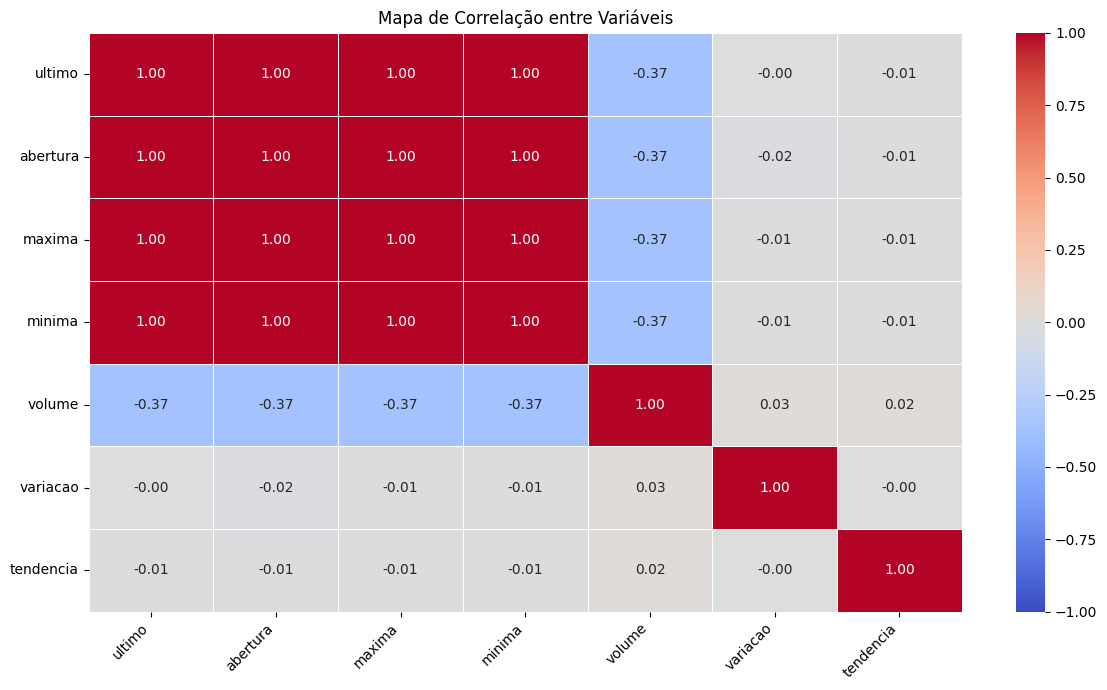

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# (recomendado) calcular a correlação só no TREINO para não “olhar” o período de teste
df_treino = df_ibovespa.iloc[:-30].copy()

# monte aqui a lista de colunas que você quer no mapa (inclua a target se quiser ver)
cols_corr = [
    "ultimo", "abertura", "maxima", "minima", "volume", "variacao", "tendencia"
]

df_corr = df_treino[cols_corr].corr()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1, vmax=1
)
plt.title("Mapa de Correlação entre Variáveis")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



## **Interpretação**

## Análise do Mapa de Correlação entre Variáveis

### O que será mostrado

O mapa de correlação mede o quanto duas variáveis “andam juntas” (linearmente):
- **+1.00**: sobem/descem praticamente juntas
- **0.00**: não existe relação linear clara
- **-1.00**: quando uma sobe, a outra tende a cair (relação inversa)

### Conclusão (continuação)
Diante da forte redundância entre as variáveis dque tratam de valor (preço) e da ausência de correlação linear da variável alvo **tendencia** com as features atuais, **não é recomendado avançar com o treinamento de modelos apenas com essas variáveis brutas** (Abertura, Máxima, Mínima e ultima + volume + variação).

Na prática, essa configuração tende a gerar um modelo com comportamento próximo de um **baseline**, com baixa capacidade de generalização e pouca utilidade para tomada de decisão.

Com isso o próximo passo será aplicar **engenharia de atributos (feature engineering)**, criando variáveis temporais (lags, médias móveis, volatilidade, indicadores técnicos etc.) para capturar a dinâmica histórica e melhorar o poder preditivo.






# **Feature Engineering**

## **Estratégia de engenharia de atributos**

Aqui irei criar novas colunas (features) com o objetivo de dar ao modelo mais contexto sobre o comportamento histórico do IBOVESPA, sempre usando apenas informações disponíveis até o dia *t* (sem utilizar dados do futuro).

**Novas colunas**
---

### 1) **Retornos/defasagens (lags)**

- **retorno_1d** – Variação percentual de 1 dia: mostra o comportamento de ontem para hoje  
- **retorno_3d** – Variação percentual de 3 dias: indica tendência de curtíssimo prazo  
- **retorno_7d** – Variação percentual de 7 dias: indica sinal de tendência semanal  

### 2) **Médias móveis (SMA – média simples)**

- **media_movel_3** – Média do fechamento dos últimos 3 dias: suaviza ruídos diários  
- **media_movel_7** – Média do fechamento dos últimos 7 dias: mostra a direção geral da semana  

### 3) **Volatilidade em janela (std de retornos)**  
*(volatilidade calculada sobre retornos, não sobre preços)*

- **volatilidade_3d** – Desvio padrão dos **retornos** dos últimos 3 dias: mede instabilidade recente  
- **volatilidade_7d** – Desvio padrão dos **retornos** dos últimos 7 dias: mede instabilidade semanal e ajuda a detectar movimentos bruscos  

### 4) **RSI(14)**

- **rsi_14** – Índice de Força Relativa calculado em 14 dias: mede a força e velocidade dos movimentos.  
  Valores acima de 70 sugerem sobrecompra (possível reversão para queda) e abaixo de 30 sugerem sobrevenda (possível reversão para alta).

### 5) **MACD(12,26,9) (EMA – médias exponenciais)**

- **macd** – Diferença entre as EMAs de 12 e 26 dias; valores positivos sugerem tendência de alta  
- **macd_signal** – EMA de 9 dias do próprio MACD (linha de sinal), usada para detectar cruzamentos  
- **macd_diff** – Histograma (macd − macd_signal), mostrando a força do sinal de tendência (quanto maior o valor absoluto, maior a intensidade do movimento)  

### 6) **Distância do preço para a média (relação preço/média)**

- **dist_mm_7** – Relação do fechamento com a média móvel de 7 dias: indica se o preço está acima/abaixo do padrão recente e o quanto ele está “esticado” em relação à média  

### 7) **Volume (variação e razão vs média)**

- **volume_var_1d** – Variação percentual do volume em 1 dia  
- **volume_ratio_7d** – Volume do dia dividido pela média móvel de 7 dias do volume, indicando se o volume está acima ou abaixo do padrão recente  





In [101]:
# A biblioteca `ta` é usada para calcular indicadores técnicos de mercado a partir de séries de preço e volume.
# Ela facilita a engenharia de atributos porque já disponibiliza, de forma pronta, indicadores como RSI, MACD,
# médias móveis (SMA/EMA), Bandas de Bollinger, ATR, ADX, Estocástico, entre outros, evitando implementações manuais.

!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=a37c53dd92fd77d84a09ab2327d9dbf22715fc57cb95525bba2cc79ba92361b4
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [103]:
# Bloco de criação das novas variáveis

# Variação percentual de 1 dia: para mostrar o comportamento de ontem para hoje
df_ibovespa['retorno_1d'] = df_ibovespa['ultimo'].pct_change(periods=1)

# Variação acumulada dos últimos 3 dias: para mostrar a tendência de curtíssimo prazo
df_ibovespa['retorno_3d'] = df_ibovespa['ultimo'].pct_change(periods=3)

# Variação acumulada dos últimos 7 dias: para mostrar o sinal de tendência semanal
df_ibovespa['retorno_7d'] = df_ibovespa['ultimo'].pct_change(periods=7)


# Colunas de MÉDIAS MÓVEIS

# Média dos preços de fechamento dos últimos 3 dias: para suavizar ruídos diários
df_ibovespa['media_movel_3'] = df_ibovespa['ultimo'].rolling(window=3).mean()

# Média dos últimos 7 dias: para mostrar a direção geral da semana
df_ibovespa['media_movel_7'] = df_ibovespa['ultimo'].rolling(window=7).mean()


# Colunas de desvio padrão - VOLATILIDADE (calculada sobre retornos, não sobre preço)

# Desvio padrão dos retornos de 1 dia nos últimos 3 dias: mede instabilidade recente
df_ibovespa['volatilidade_3d'] = df_ibovespa['retorno_1d'].rolling(window=3).std()

# Desvio padrão dos retornos de 1 dia nos últimos 7 dias: mede instabilidade semanal
df_ibovespa['volatilidade_7d'] = df_ibovespa['retorno_1d'].rolling(window=7).std()


# === INDICADORES TÉCNICOS ADICIONAIS ===
import ta

# RSI (14 dias)
df_ibovespa['rsi_14'] = ta.momentum.RSIIndicator(close=df_ibovespa['ultimo'], window=14).rsi()

# MACD (12-26-9 padrão)
macd = ta.trend.MACD(close=df_ibovespa['ultimo'])
df_ibovespa['macd'] = macd.macd()
df_ibovespa['macd_signal'] = macd.macd_signal()
df_ibovespa['macd_diff'] = macd.macd_diff()


# === LIMPEZA FINAL ===
# Remove linhas com NaNs gerados pelos lags/janelas e indicadores técnicos
df_ibovespa = df_ibovespa.dropna(subset=[
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
])



In [105]:
# Verificar se as minhas novas variáveis foram criadas

print(df_ibovespa.head())

         data  ultimo  abertura  maxima  minima        volume  variacao  \
66 1994-11-07  4809.0    4667.0  4865.0  4667.0  6.870000e+09    0.0304   
67 1994-11-08  4782.0    4809.0  4952.0  4778.0  6.890000e+09   -0.0056   
68 1994-11-09  4885.0    4782.0  4892.0  4736.0  7.650000e+09    0.0215   
69 1994-11-10  4993.0    4885.0  5041.0  4885.0  7.820000e+09    0.0221   
70 1994-11-11  4952.0    4993.0  5064.0  4936.0  6.440000e+09   -0.0082   

    tendencia  retorno_1d  retorno_3d  retorno_7d  media_movel_3  \
66          0    0.030426    0.022974    0.031089    4661.333333   
67          1   -0.005614    0.060781    0.015934    4752.666667   
68          1    0.021539    0.046711   -0.008726    4825.333333   
69          0    0.022108    0.038262    0.040642    4886.666667   
70          0   -0.008211    0.035550    0.053393    4943.333333   

    media_movel_7  volatilidade_3d  volatilidade_7d     rsi_14        macd  \
66    4731.142857         0.042737         0.034356  48.666953

**verificar estatísticas básicas**, valores extremos e possíveis erros visíveis

In [106]:
df_ibovespa.describe()

,data,ultimo,abertura,maxima,minima,volume,variacao,tendencia,retorno_1d,retorno_3d,retorno_7d,media_movel_3,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,macd_diff
count,7610,7610.000000,7610.000000,7610.000000,7610.000000,7.610000e+03,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000,7610.000000
mean,2010-03-22 19:31:40.762155008,53340.647963,53324.996189,53846.682129,52810.967411,1.631575e+09,0.000639,0.521288,0.000639,0.001919,0.004319,53323.839422,53289.981735,0.015242,0.016574,52.824255,121.002333,121.363344,-0.361011
min,1994-11-07 00:00:00,2138.000000,2138.000000,2449.000000,2110.000000,1.121000e+05,-0.158100,0.000000,-0.158090,-0.254273,-0.335406,2372.333333,2618.428571,0.000245,0.002410,13.245486,-12092.405368,-10303.426794,-3250.441270
25%,2002-07-22 06:00:00,14879.500000,14872.250000,15136.500000,14725.000000,3.600000e+06,-0.009100,0.000000,-0.009068,-0.015090,-0.022160,14869.916667,14799.821429,0.007936,0.010272,43.882559,-311.057367,-290.845202,-125.372400
50%,2010-03-24 12:00:00,52082.500000,52075.500000,52659.000000,51472.500000,1.131000e+07,0.000800,1.000000,0.000840,0.002429,0.005509,52134.000000,52198.642857,0.012401,0.014009,52.732207,100.711542,103.435895,5.088962
75%,2017-11-27 18:00:00,73642.750000,73555.250000,74515.000000,72608.000000,2.759425e+08,0.010800,1.000000,0.010833,0.019866,0.032312,73625.583333,73470.571429,0.018759,0.019181,61.940993,613.705725,590.240920,125.260636
max,2025-07-29 00:00:00,141264.000000,141265.000000,141564.000000,140597.000000,5.406000e+10,0.334200,1.000000,0.334190,0.459561,0.511766,140560.666667,139777.142857,0.237590,0.150693,87.526295,4184.425241,3476.717814,2289.282082
std,NaN,38417.744876,38410.429005,38689.326380,38136.650777,3.957770e+09,0.020015,0.499579,0.020015,0.034622,0.049416,38406.152072,38384.955347,0.013026,0.011595,12.248368,1061.407612,1004.480332,306.149164


In [107]:
# Verificação de valores ausentes

print(df_ibovespa.isnull().sum())

data               0
ultimo             0
abertura           0
maxima             0
minima             0
volume             0
variacao           0
tendencia          0
retorno_1d         0
retorno_3d         0
retorno_7d         0
media_movel_3      0
media_movel_7      0
volatilidade_3d    0
volatilidade_7d    0
rsi_14             0
macd               0
macd_signal        0
macd_diff          0
dtype: int64


In [109]:
# Análisar do balanceamento da variável alvo (tendencia)

df_ibovespa['tendencia'].value_counts(normalize=True)


,proportion
tendencia,
1,0.521288
0,0.478712


Sem desbalanceamento preocupante no conjunto completo (52% vs. 48%);

Isso aumenta a confiança do modelo que pode aprender padrões sem precisar de balanceamento artificial, desde que a divisão entre treino e teste também esteja proporcional.

In [111]:
# Realizar uma cópia do df_ibovespa com as features prontas

df_feat = df_ibovespa.copy()
df_model = df_feat.copy()


In [112]:
# 1) Garantir ordem por data

df_model = df_model.sort_values("data").reset_index(drop=True)

# 2) Criar o target (tendência do dia seguinte) e remover a última linha (sem amanhã)

df_model["tendencia"] = (df_model["ultimo"].shift(-1) > df_model["ultimo"]).astype(int)
df_model = df_model.iloc[:-1].reset_index(drop=True)

# 3) Definir X e y
features = [
    "retorno_1d", "retorno_3d", "retorno_7d",
    "media_movel_3", "media_movel_7",
    "volatilidade_3d", "volatilidade_7d",
    "rsi_14",
    "macd", "macd_signal", "macd_diff"
]
X = df_model[features].copy()
y = df_model["tendencia"].copy()

# 4) Split (dividir os dados em partes para treinar e testar o modelo) temporal: últimos 30 dias para teste
X_train, X_test = X.iloc[:-30], X.iloc[-30:]
y_train, y_test = y.iloc[:-30], y.iloc[-30:]

# 5) Verificar o balanceamento (contagem e proporção) - treino e teste
print("Balanceamento TREINO (contagem):")
print(y_train.value_counts())
print("\nBalanceamento TREINO (proporção):")
print(y_train.value_counts(normalize=True))

print("\nBalanceamento TESTE (contagem):")
print(y_test.value_counts())
print("\nBalanceamento TESTE (proporção):")
print(y_test.value_counts(normalize=True))


Balanceamento TREINO (contagem):
tendencia
1    3955
0    3624
Name: count, dtype: int64

Balanceamento TREINO (proporção):
tendencia
1    0.521837
0    0.478163
Name: proportion, dtype: float64

Balanceamento TESTE (contagem):
tendencia
0    19
1    11
Name: count, dtype: int64

Balanceamento TESTE (proporção):
tendencia
0    0.633333
1    0.366667
Name: proportion, dtype: float64


### Justificativa do Split Temporal (últimas 30 linhas)

Para este projeto, foi adotado um **split temporal** em que o conjunto de teste corresponde às **últimas 30 linhas** do dataset, que representam os **30 pregões mais recentes disponíveis**.

Essa escolha é adequada porque a base do IBOVESPA contém **apenas dias de negociação** (não há registros para fins de semana e feriados). Portanto, utilizar as últimas 30 linhas garante um período recente e consistente de observações reais de mercado, além de simular o cenário prático de produção: **treinar com o histórico e avaliar no período mais recente**, sem embaralhar os dados e evitando vazamento de informação do futuro.

### Outra observação é que O conjunto de teste está desbalanceado

Mesmo que o conjunto completo esteja equilibrado (52% vs. 48%), os últimos 30 pregões — que é a parte que será usada para avaliar a performance do modelo está desbalanceada, com predomínio de quedas 63/37, mais puxado para “não alta”, sendo este um cenário realista do período dos ultimos 30 pregões


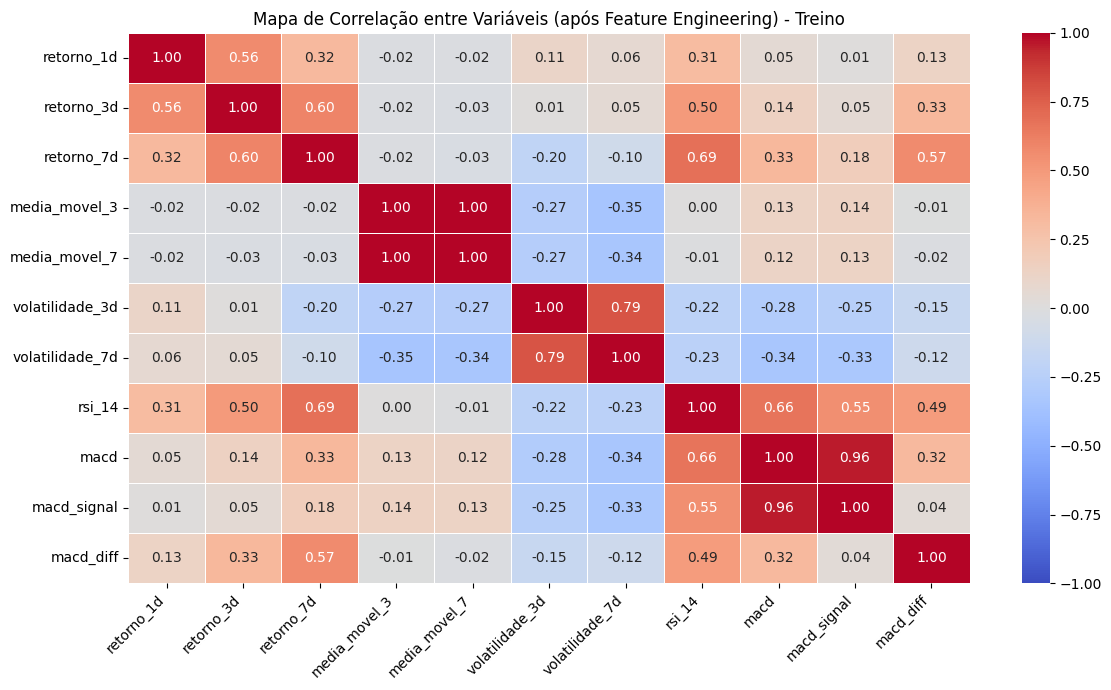

In [116]:
# Mapa de Correlação.

import seaborn as sns
import matplotlib.pyplot as plt

# Correlação só nas features do TREINO
df_corr = X_train.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df_corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmin=-1, vmax=1
)
plt.title("Mapa de Correlação entre Variáveis (após Feature Engineering) - Treino")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Interpretação do Mapa de Correlação (somente features do treino)

O mapa de correlação foi utilizado para identificar **redundância** entre as variáveis explicativas e reduzir risco de **multicolinearidade**, especialmente relevante em modelos lineares.

### O que foi observado
- **Médias móveis** (media_movel_3 e media_movel_7) apresentam correlação **muito alta (~1.00)**, indicando que carregam praticamente a mesma informação (preço suavizado em janelas próximas).
- **Volatilidades** (volatilidade_3d e volatilidade_7d) também têm correlação **alta (~0.79)**, pois medem o mesmo conceito (risco recente) em janelas diferentes.
- **MACD e MACD signal** têm correlação **muito alta (~0.96)**, o que é esperado porque o macd_signal é uma média do próprio MACD.
- **Retornos** (retorno_1d, retorno_3d, retorno_7d) possuem correlação positiva entre si, indicando sinais de movimento semelhantes em horizontes diferentes.

### Como isso será usado
- Correlação **muito alta entre features** indica possível duplicidade e pode justificar remoção de variáveis redundantes (principalmente para modelos lineares).
- Correlação **baixa entre features** não é um problema por si só; pode significar que as variáveis trazem informações diferentes.
- Importante: este mapa mede apenas **relações lineares** e não determina sozinho se uma feature é boa para previsão. A utilidade real será confirmada na avaliação do modelo com validação temporal.



In [119]:
# Rodando o Modelo Linear RL

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, class_weight="balanced"))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório:\n", classification_report(y_test, y_pred, zero_division=0))


Acurácia: 0.6333333333333333

Matriz de confusão:
 [[19  0]
 [11  0]]

Relatório:
               precision    recall  f1-score   support

           0       0.63      1.00      0.78        19
           1       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.32      0.50      0.39        30
weighted avg       0.40      0.63      0.49        30



## Conclusão (Modelo Linear)

A Regressão Logística (modelo linear) apresentou acurácia de **0,63** no teste, porém a **matriz de confusão** mostra que o modelo **classificou todos os casos como classe 0 (sem alta)**, não identificando nenhum dia de alta (classe 1).

Isso indica que, mesmo após a engenharia de atributos e a normalização, o modelo linear **não conseguiu aprender um padrão discriminante** para separar adequadamente as duas classes. Na prática, ele ficou próximo de um baseline, seguindo a classe predominante no período de teste, o que reduz sua utilidade para previsão.

Diante desse comportamento, o próximo passo é avançar para **modelos não lineares**, que conseguem capturar relações mais complexas e interações entre variáveis (ex.: árvores, Random Forest, Gradient Boosting), aumentando a chance de extrair sinal preditivo a partir das features construídas.


## **Função para teste de modelos**

Como serão testados vários modelos abaixo será criada uma função para ser usada e economizar tempo durante a execução dos modelos... A função faz:

* treina, calcula acurácia, matriz de confusão (plot), relatório, ROC/AUC, e Permutation Importance

* Salva tudo numa lista resultados para comparar depois

* resumo_resultados(...): gera uma tabela final (DataFrame) ordenada. Depois que testar todos os modelos executar...

**df_comparacao = resumo_resultados(resultados, ordenar_por="acuracia")
print(df_comparacao)**

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
)
from sklearn.inspection import permutation_importance


def avaliar_modelo(
    modelo,
    nome_modelo: str,
    X_train, y_train,
    X_test, y_test,
    resultados: list,
    plotar: bool = True,
    roc: bool = True,
    importancia: bool = False,
    n_repeats: int = 20,
    random_state: int = 42
):
    """
    Treina e avalia um modelo de classificação binária.
    Salva métricas em `resultados` e opcionalmente plota Matriz de Confusão, ROC e Permutation Importance.
    """

    # 1) Treino
    modelo.fit(X_train, y_train)

    # 2) Predição de classe
    y_pred = modelo.predict(X_test)

    # 3) Métricas básicas
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    relatorio = classification_report(y_test, y_pred, zero_division=0, output_dict=True)

    # 4) Probabilidades para ROC/AUC (se possível)
    auc = None
    y_score = None
    if roc:
        if hasattr(modelo, "predict_proba"):
            y_score = modelo.predict_proba(X_test)[:, 1]
        elif hasattr(modelo, "decision_function"):
            y_score = modelo.decision_function(X_test)

        if y_score is not None:
            try:
                auc = roc_auc_score(y_test, y_score)
            except Exception:
                auc = None

    # 5) Prints
    print(f"\n===== {nome_modelo} =====")
    print("Acurácia:", acc)
    print("\nMatriz de confusão:\n", cm)
    print("\nRelatório:\n", classification_report(y_test, y_pred, zero_division=0))

    # 6) Plots (opcionais)
    if plotar:
        # Matriz de Confusão (igual ao estilo do sklearn)
        plt.figure(figsize=(6, 5))
        ConfusionMatrixDisplay.from_predictions(
            y_test, y_pred,
            display_labels=["0 (sem alta)", "1 (alta)"]
        )
        plt.title(f"Matriz de Confusão - {nome_modelo}")
        plt.tight_layout()
        plt.show()

        # Curva ROC
        if roc and y_score is not None and auc is not None:
            plt.figure(figsize=(6, 5))
            RocCurveDisplay.from_predictions(y_test, y_score)
            plt.title(f"Curva ROC - {nome_modelo} (AUC = {auc:.2f})")
            plt.tight_layout()
            plt.show()

    # 7) Permutation Importance (opcional)
    imp_media = None
    imp_std = None
    if importancia:
        try:
            perm = permutation_importance(
                modelo, X_test, y_test,
                n_repeats=n_repeats,
                random_state=random_state,
                scoring="accuracy"
            )
            imp_media = perm.importances_mean
            imp_std = perm.importances_std

            imp_df = (
                pd.DataFrame({
                    "feature": X_test.columns,
                    "importancia_media": imp_media,
                    "importancia_std": imp_std
                })
                .sort_values("importancia_media", ascending=False)
            )

            print("\nTop 10 features (Permutation Importance):")
            print(imp_df.head(10))

            if plotar:
                plt.figure(figsize=(10, 4))
                plt.bar(imp_df["feature"], imp_df["importancia_media"])
                plt.xticks(rotation=45, ha="right")
                plt.title(f"Importância das Variáveis - {nome_modelo} (Permutation Importance)")
                plt.ylabel("Impacto na acurácia")
                plt.xlabel("Variáveis")
                plt.tight_layout()
                plt.show()

        except Exception as e:
            print("\nPermutation Importance não foi possível para este modelo:", str(e))

    # 8) Guardar resultado para comparação final
    resultado = {
        "modelo": nome_modelo,
        "acuracia": acc,
        "auc": auc,
        "tn": int(cm[0, 0]),
        "fp": int(cm[0, 1]),
        "fn": int(cm[1, 0]),
        "tp": int(cm[1, 1]),
        "precision_1": relatorio.get("1", {}).get("precision", np.nan),
        "recall_1": relatorio.get("1", {}).get("recall", np.nan),
        "f1_1": relatorio.get("1", {}).get("f1-score", np.nan),
    }

    resultados.append(resultado)
    return resultado


def resumo_resultados(resultados: list, ordenar_por: str = "acuracia"):
    """
    Gera um DataFrame para comparar os modelos testados.
    """
    df_res = pd.DataFrame(resultados).copy()
    if ordenar_por in df_res.columns:
        df_res = df_res.sort_values(ordenar_por, ascending=False).reset_index(drop=True)
    return df_res



===== Logistic Regression (Scaler + class_weight) =====
Acurácia: 0.6333333333333333

Matriz de confusão:
 [[19  0]
 [11  0]]

Relatório:
               precision    recall  f1-score   support

           0       0.63      1.00      0.78        19
           1       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.32      0.50      0.39        30
weighted avg       0.40      0.63      0.49        30



<Figure size 600x500 with 0 Axes>

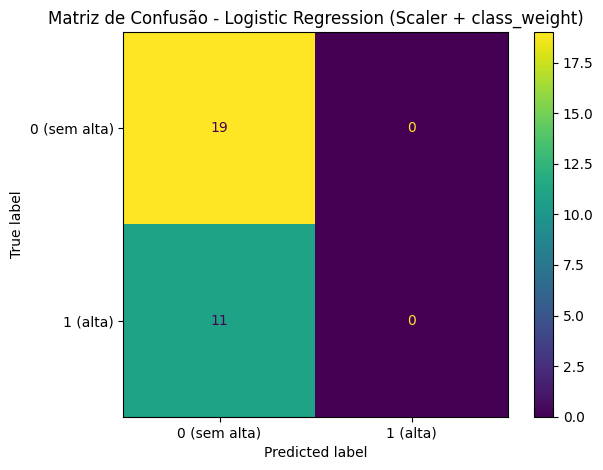

<Figure size 600x500 with 0 Axes>

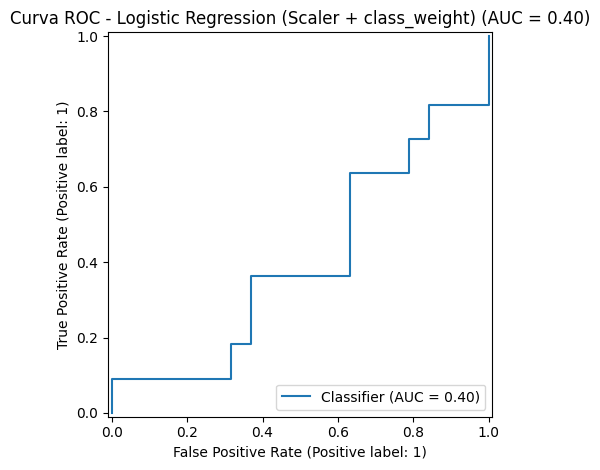


Top 10 features (Permutation Importance):
            feature  importancia_media  importancia_std
2        retorno_7d           0.105000         0.056051
7            rsi_14           0.055000         0.083848
1        retorno_3d           0.035000         0.045308
10        macd_diff           0.005000         0.011902
5   volatilidade_3d           0.005000         0.021794
9       macd_signal           0.003333         0.031447
8              macd           0.003333         0.023333
0        retorno_1d           0.001667         0.007265
3     media_movel_3           0.000000         0.000000
4     media_movel_7           0.000000         0.000000


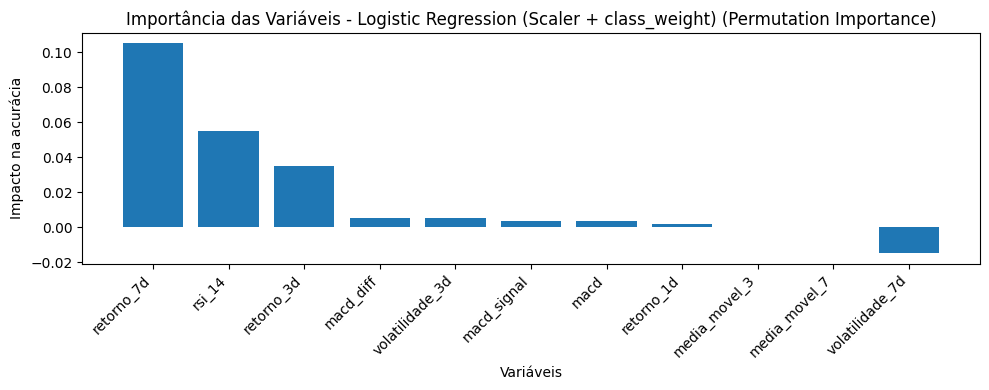

In [121]:
resultados = []

# Modelo 1: Regressão Logística
resultado_lr = avaliar_modelo(
    pipe, "Logistic Regression (Scaler + class_weight)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)





===== Gradient Boosting =====
Acurácia: 0.6333333333333333

Matriz de confusão:
 [[15  4]
 [ 7  4]]

Relatório:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       0.50      0.36      0.42        11

    accuracy                           0.63        30
   macro avg       0.59      0.58      0.58        30
weighted avg       0.62      0.63      0.62        30



<Figure size 600x500 with 0 Axes>

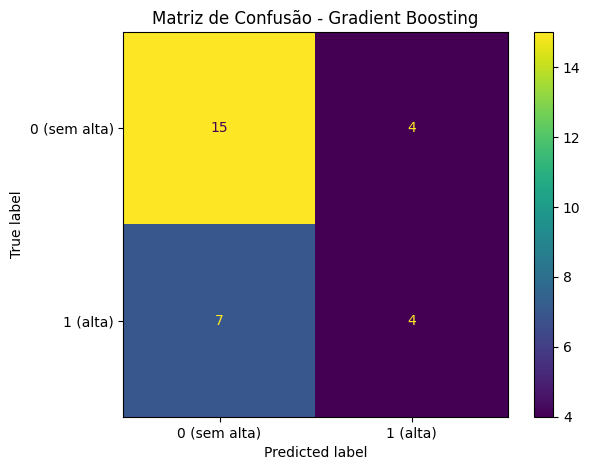

<Figure size 600x500 with 0 Axes>

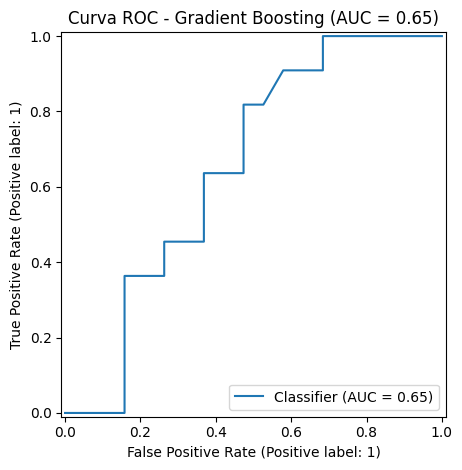


Top 10 features (Permutation Importance):
            feature  importancia_media  importancia_std
4     media_movel_7           0.060000         0.041633
3     media_movel_3           0.056667         0.052810
2        retorno_7d           0.053333         0.049889
7            rsi_14           0.045000         0.033789
5   volatilidade_3d           0.025000         0.020750
0        retorno_1d           0.023333         0.049554
1        retorno_3d           0.016667         0.035746
8              macd           0.013333         0.028674
9       macd_signal           0.000000         0.042164
10        macd_diff          -0.008333         0.037823


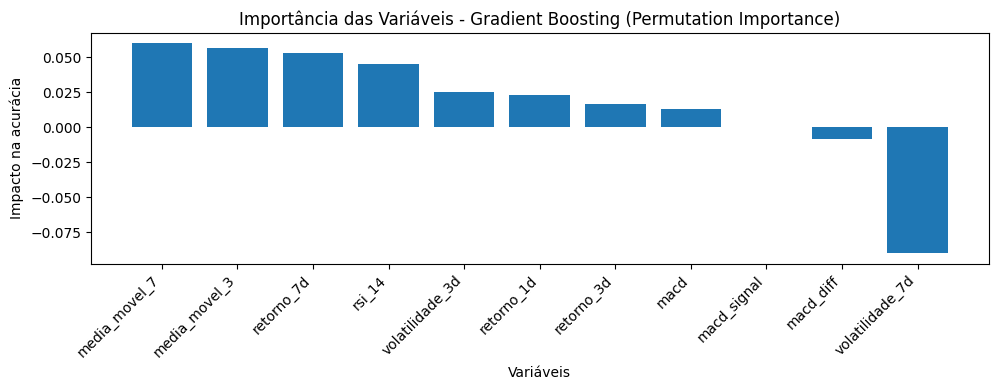

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

# Modelo 2: Gradient Boosting (não linear)
gb = GradientBoostingClassifier(random_state=42)

resultado_gb = avaliar_modelo(
    gb, "Gradient Boosting",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)



===== Random Forest (500 árvores, class_weight=balanced) =====
Acurácia: 0.36666666666666664

Matriz de confusão:
 [[ 8 11]
 [ 8  3]]

Relatório:
               precision    recall  f1-score   support

           0       0.50      0.42      0.46        19
           1       0.21      0.27      0.24        11

    accuracy                           0.37        30
   macro avg       0.36      0.35      0.35        30
weighted avg       0.40      0.37      0.38        30



<Figure size 600x500 with 0 Axes>

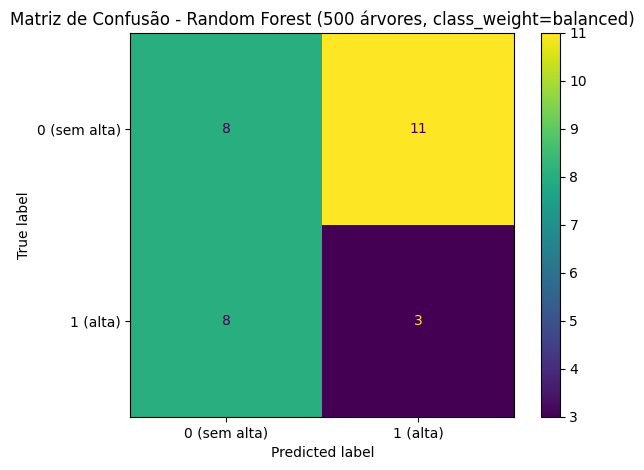

<Figure size 600x500 with 0 Axes>

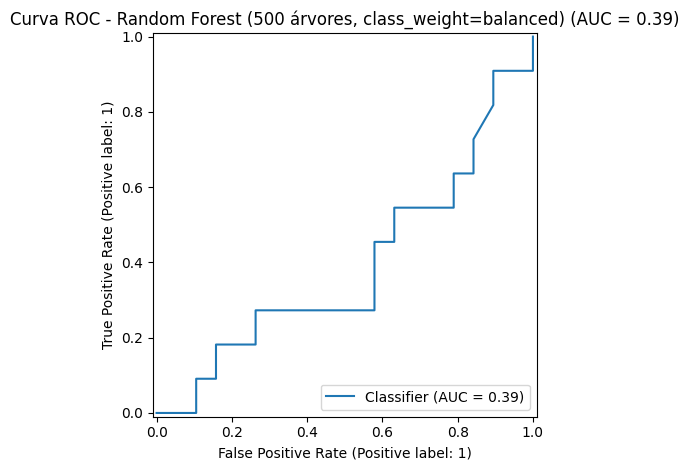


Top 10 features (Permutation Importance):
           feature  importancia_media  importancia_std
4    media_movel_7          -0.028333         0.026405
6  volatilidade_7d          -0.033333         0.047140
5  volatilidade_3d          -0.045000         0.039826
3    media_movel_3          -0.053333         0.035590
1       retorno_3d          -0.071667         0.043811
0       retorno_1d          -0.081667         0.051072
8             macd          -0.086667         0.047610
7           rsi_14          -0.090000         0.043589
2       retorno_7d          -0.095000         0.056051
9      macd_signal          -0.123333         0.052810


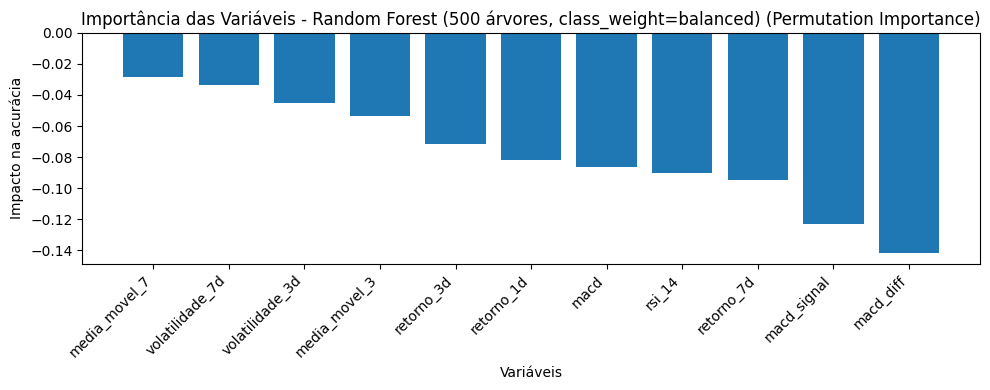

In [123]:
from sklearn.ensemble import RandomForestClassifier

# Modelo 3: Random Forest (não linear)
rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced",
    max_depth=None
)

resultado_rf = avaliar_modelo(
    rf, "Random Forest (500 árvores, class_weight=balanced)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)



===== HistGradientBoosting (max_depth=6, lr=0.05, iter=500) =====
Acurácia: 0.4

Matriz de confusão:
 [[ 6 13]
 [ 5  6]]

Relatório:
               precision    recall  f1-score   support

           0       0.55      0.32      0.40        19
           1       0.32      0.55      0.40        11

    accuracy                           0.40        30
   macro avg       0.43      0.43      0.40        30
weighted avg       0.46      0.40      0.40        30



<Figure size 600x500 with 0 Axes>

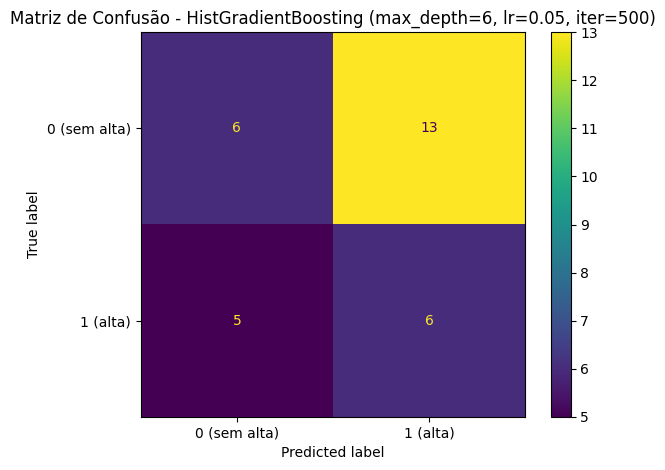

<Figure size 600x500 with 0 Axes>

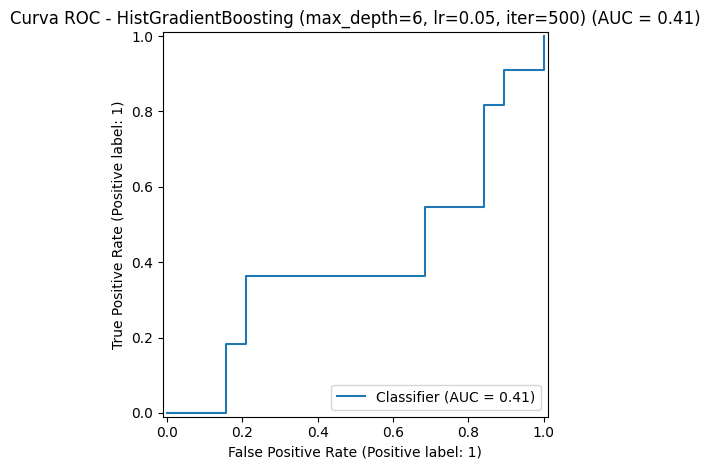


Top 10 features (Permutation Importance):
            feature  importancia_media  importancia_std
5   volatilidade_3d           0.055000         0.042525
10        macd_diff           0.008333         0.046993
0        retorno_1d           0.003333         0.039299
4     media_movel_7           0.003333         0.029627
3     media_movel_3           0.000000         0.000000
6   volatilidade_7d          -0.001667         0.024664
7            rsi_14          -0.005000         0.052994
1        retorno_3d          -0.016667         0.038730
9       macd_signal          -0.033333         0.043461
2        retorno_7d          -0.035000         0.077800


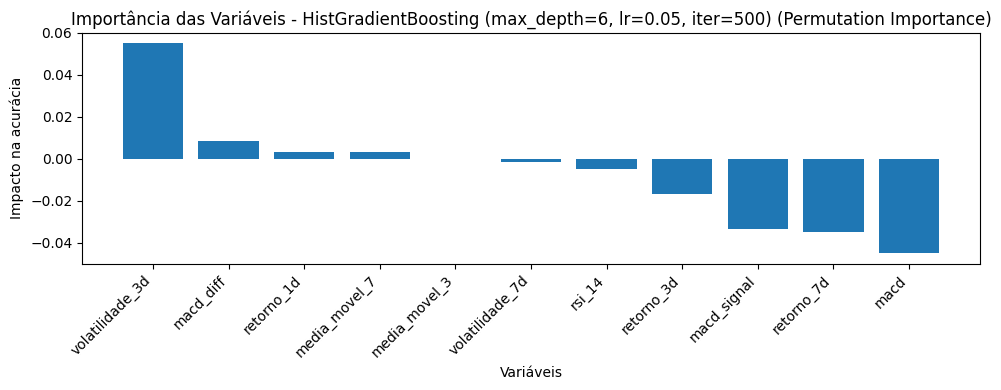

In [124]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Modelo 4: HistGradientBoosting (não linear)
hgb = HistGradientBoostingClassifier(
    random_state=42,
    max_depth=6,
    learning_rate=0.05,
    max_iter=500
)

resultado_hgb = avaliar_modelo(
    hgb, "HistGradientBoosting (max_depth=6, lr=0.05, iter=500)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)



===== SVC (RBF + Scaler, class_weight=balanced) =====
Acurácia: 0.7

Matriz de confusão:
 [[17  2]
 [ 7  4]]

Relatório:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.67      0.36      0.47        11

    accuracy                           0.70        30
   macro avg       0.69      0.63      0.63        30
weighted avg       0.69      0.70      0.67        30



<Figure size 600x500 with 0 Axes>

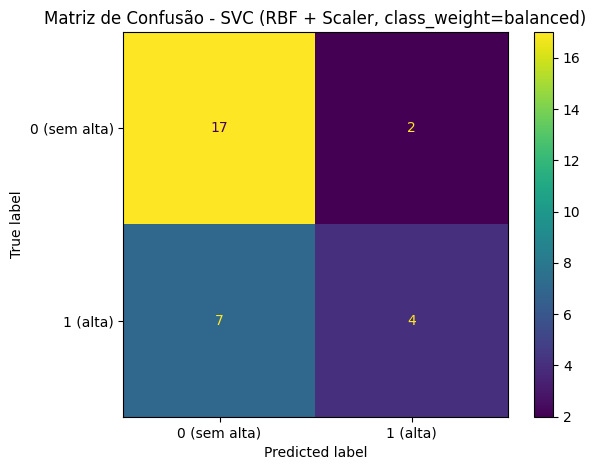

<Figure size 600x500 with 0 Axes>

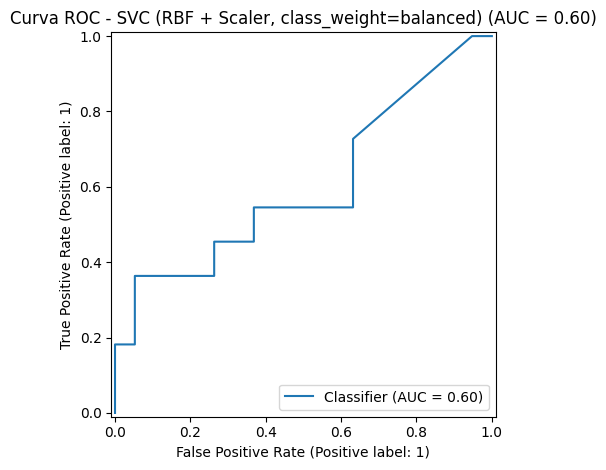


Top 10 features (Permutation Importance):
            feature  importancia_media  importancia_std
7            rsi_14           0.030000         0.044597
10        macd_diff           0.028333         0.039826
2        retorno_7d           0.016667         0.041500
1        retorno_3d           0.013333         0.026667
0        retorno_1d           0.011667         0.032102
8              macd           0.008333         0.029580
5   volatilidade_3d           0.001667         0.007265
9       macd_signal           0.001667         0.024664
6   volatilidade_7d           0.000000         0.000000
3     media_movel_3           0.000000         0.000000


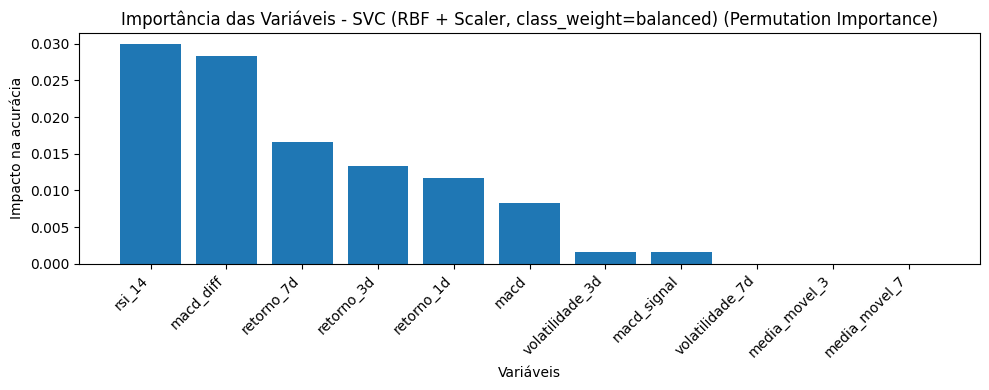

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Modelo 5: SVC (RBF) (não linear) com normalização
svc = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, class_weight="balanced", random_state=42))
])

resultado_svc = avaliar_modelo(
    svc, "SVC (RBF + Scaler, class_weight=balanced)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)



===== KNN (k=15, weights=distance, + Scaler) =====
Acurácia: 0.4

Matriz de confusão:
 [[ 8 11]
 [ 7  4]]

Relatório:
               precision    recall  f1-score   support

           0       0.53      0.42      0.47        19
           1       0.27      0.36      0.31        11

    accuracy                           0.40        30
   macro avg       0.40      0.39      0.39        30
weighted avg       0.44      0.40      0.41        30



<Figure size 600x500 with 0 Axes>

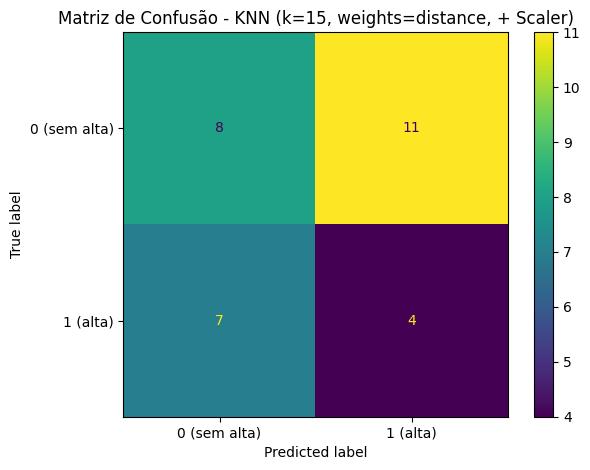

<Figure size 600x500 with 0 Axes>

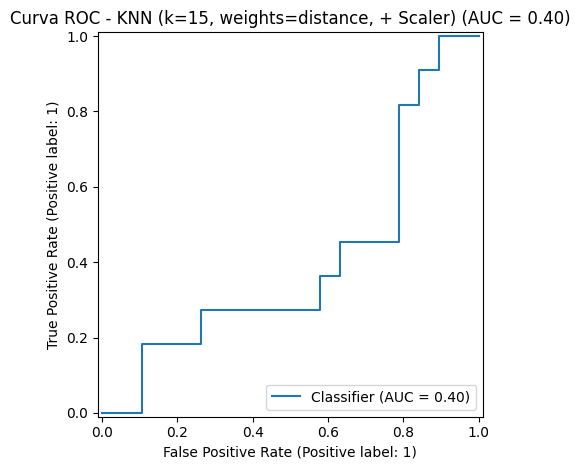


Top 10 features (Permutation Importance):
           feature  importancia_media  importancia_std
5  volatilidade_3d           0.018333         0.047697
3    media_movel_3           0.001667         0.030687
4    media_movel_7          -0.010000         0.028087
6  volatilidade_7d          -0.021667         0.042525
8             macd          -0.065000         0.066228
0       retorno_1d          -0.093333         0.065490
9      macd_signal          -0.096667         0.072954
2       retorno_7d          -0.118333         0.074143
1       retorno_3d          -0.125000         0.075185
7           rsi_14          -0.136667         0.071414


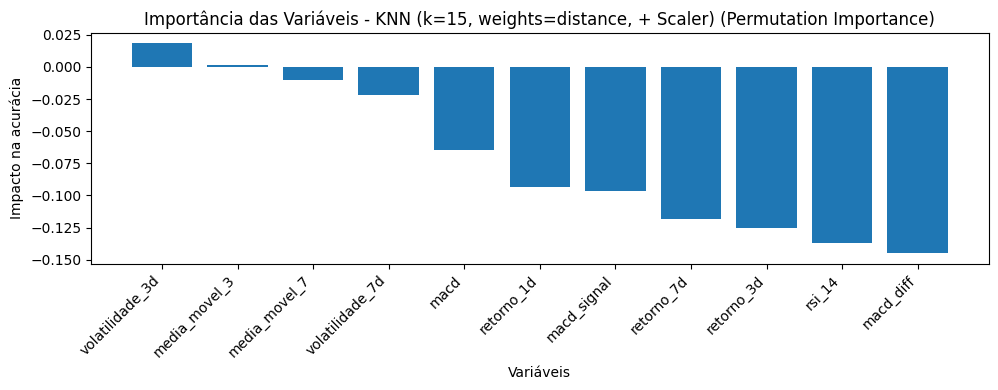

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Modelo 6: KNN (não linear) com normalização
knn = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=15, weights="distance"))
])

resultado_knn = avaliar_modelo(
    knn, "KNN (k=15, weights=distance, + Scaler)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)



===== KNN (k=15, weights=distance, + Scaler) =====
Acurácia: 0.4

Matriz de confusão:
 [[ 8 11]
 [ 7  4]]

Relatório:
               precision    recall  f1-score   support

           0       0.53      0.42      0.47        19
           1       0.27      0.36      0.31        11

    accuracy                           0.40        30
   macro avg       0.40      0.39      0.39        30
weighted avg       0.44      0.40      0.41        30



<Figure size 600x500 with 0 Axes>

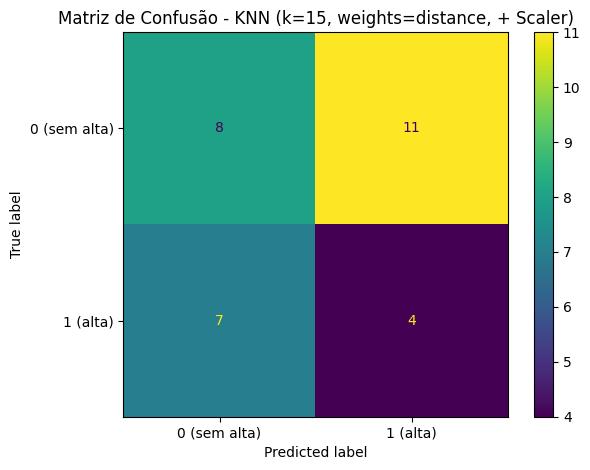

<Figure size 600x500 with 0 Axes>

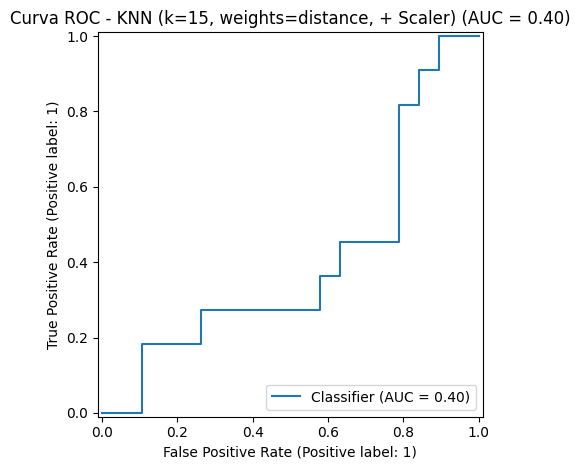


Top 10 features (Permutation Importance):
           feature  importancia_media  importancia_std
5  volatilidade_3d           0.018333         0.047697
3    media_movel_3           0.001667         0.030687
4    media_movel_7          -0.010000         0.028087
6  volatilidade_7d          -0.021667         0.042525
8             macd          -0.065000         0.066228
0       retorno_1d          -0.093333         0.065490
9      macd_signal          -0.096667         0.072954
2       retorno_7d          -0.118333         0.074143
1       retorno_3d          -0.125000         0.075185
7           rsi_14          -0.136667         0.071414


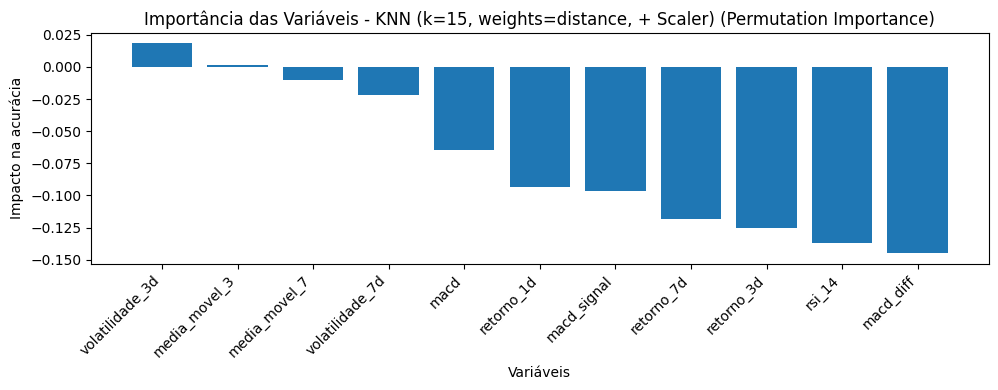

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Modelo 6: KNN (não linear) com normalização
knn = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=15, weights="distance"))
])

resultado_knn = avaliar_modelo(
    knn, "KNN (k=15, weights=distance, + Scaler)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)



===== AdaBoost (n=500, lr=0.05) =====
Acurácia: 0.36666666666666664

Matriz de confusão:
 [[ 0 19]
 [ 0 11]]

Relatório:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.18      0.50      0.27        30
weighted avg       0.13      0.37      0.20        30



<Figure size 600x500 with 0 Axes>

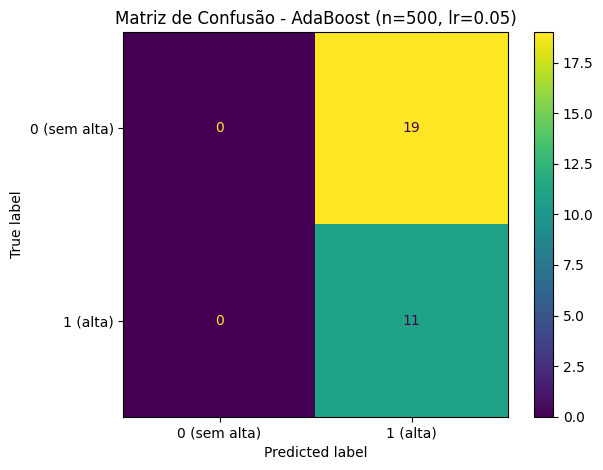

<Figure size 600x500 with 0 Axes>

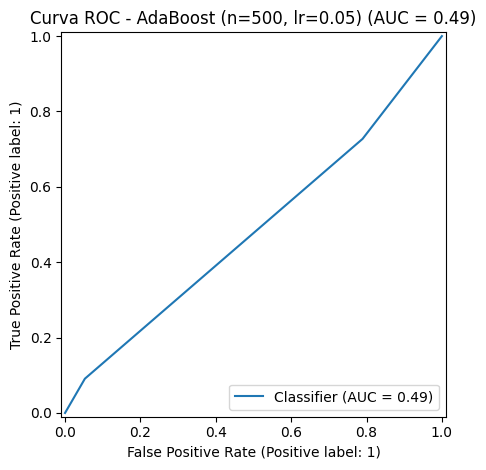


Top 10 features (Permutation Importance):
           feature  importancia_media  importancia_std
0       retorno_1d                0.0              0.0
1       retorno_3d                0.0              0.0
2       retorno_7d                0.0              0.0
3    media_movel_3                0.0              0.0
4    media_movel_7                0.0              0.0
5  volatilidade_3d                0.0              0.0
6  volatilidade_7d                0.0              0.0
7           rsi_14                0.0              0.0
8             macd                0.0              0.0
9      macd_signal                0.0              0.0


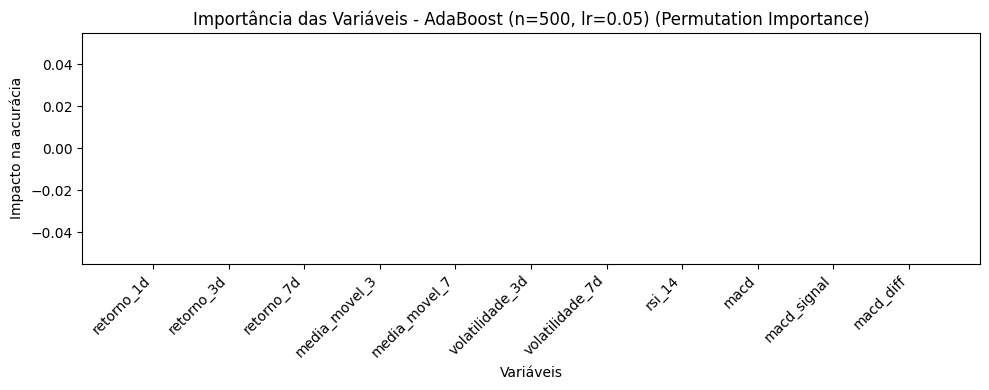

In [128]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    n_estimators=500,
    learning_rate=0.05,
    random_state=42
)

resultado_ada = avaliar_modelo(
    ada, "AdaBoost (n=500, lr=0.05)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)



===== GaussianNB =====
Acurácia: 0.6333333333333333

Matriz de confusão:
 [[19  0]
 [11  0]]

Relatório:
               precision    recall  f1-score   support

           0       0.63      1.00      0.78        19
           1       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.32      0.50      0.39        30
weighted avg       0.40      0.63      0.49        30



<Figure size 600x500 with 0 Axes>

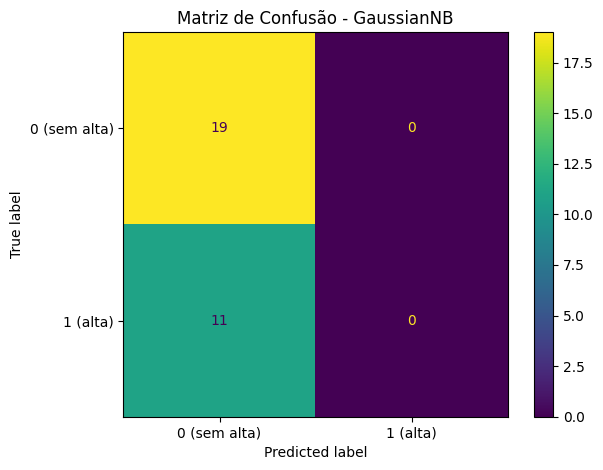

<Figure size 600x500 with 0 Axes>

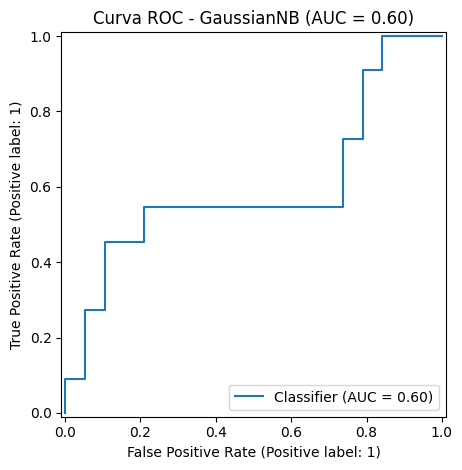

In [129]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

resultado_gnb = avaliar_modelo(
    gnb, "GaussianNB",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=False
)



===== MLP (64-32, relu, adam) + Scaler =====
Acurácia: 0.4

Matriz de confusão:
 [[ 6 13]
 [ 5  6]]

Relatório:
               precision    recall  f1-score   support

           0       0.55      0.32      0.40        19
           1       0.32      0.55      0.40        11

    accuracy                           0.40        30
   macro avg       0.43      0.43      0.40        30
weighted avg       0.46      0.40      0.40        30



<Figure size 600x500 with 0 Axes>

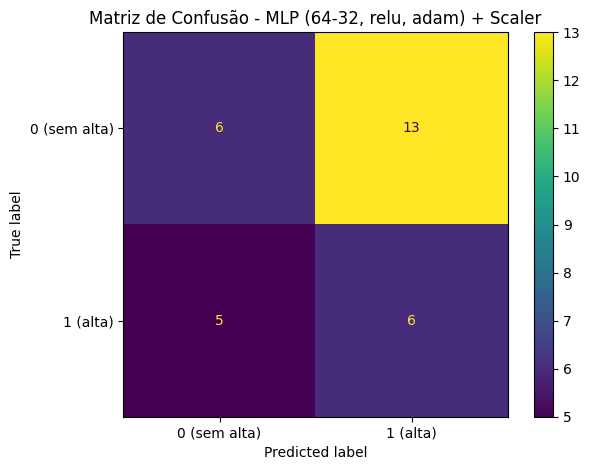

<Figure size 600x500 with 0 Axes>

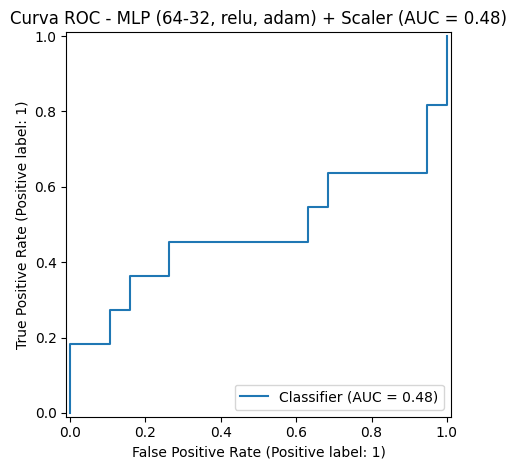

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        alpha=1e-3,
        max_iter=2000,
        random_state=42
    ))
])

resultado_mlp = avaliar_modelo(
    mlp, "MLP (64-32, relu, adam) + Scaler",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=False
)


In [133]:
df_comparacao = resumo_resultados(resultados, ordenar_por="acuracia")

# Mostra um resumo limpo com as principais métricas
cols = [
    "modelo", "acuracia", "auc",
    "precision_1", "recall_1", "f1_1",
    "tn", "fp", "fn", "tp"
]

print(df_comparacao[cols].to_string(index=False))


                                               modelo  acuracia      auc  precision_1  recall_1     f1_1  tn  fp  fn  tp
            SVC (RBF + Scaler, class_weight=balanced)  0.700000 0.602871     0.666667  0.363636 0.470588  17   2   7   4
          Logistic Regression (Scaler + class_weight)  0.633333 0.401914     0.000000  0.000000 0.000000  19   0  11   0
                                    Gradient Boosting  0.633333 0.653110     0.500000  0.363636 0.421053  15   4   7   4
                                           GaussianNB  0.633333 0.598086     0.000000  0.000000 0.000000  19   0  11   0
               KNN (k=15, weights=distance, + Scaler)  0.400000 0.401914     0.266667  0.363636 0.307692   8  11   7   4
HistGradientBoosting (max_depth=6, lr=0.05, iter=500)  0.400000 0.406699     0.315789  0.545455 0.400000   6  13   5   6
                     MLP (64-32, relu, adam) + Scaler  0.400000 0.478469     0.315789  0.545455 0.400000   6  13   5   6
               KNN (k=15, weight

## 1) Tunar hiperparâmetros com validação temporal (TimeSeriesSplit)

O SVC foi o melhor modelo então o mais eficiente é otimizar SVC (C e gamma) com TimeSeriesSplit no treino e só depois avaliar no último mês.

Melhores parâmetros: {'clf__C': 50, 'clf__gamma': 0.5}
Melhor score (CV treino): 0.5083135391923991

===== SVC Tunado (TimeSeriesSplit) =====
Acurácia: 0.4

Matriz de confusão:
 [[ 7 12]
 [ 6  5]]

Relatório:
               precision    recall  f1-score   support

           0       0.54      0.37      0.44        19
           1       0.29      0.45      0.36        11

    accuracy                           0.40        30
   macro avg       0.42      0.41      0.40        30
weighted avg       0.45      0.40      0.41        30



<Figure size 600x500 with 0 Axes>

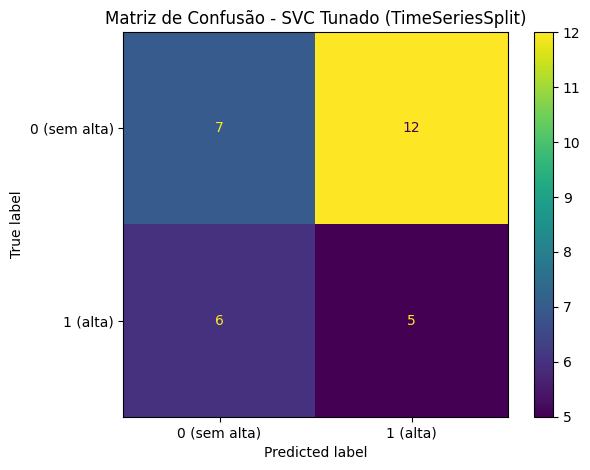

<Figure size 600x500 with 0 Axes>

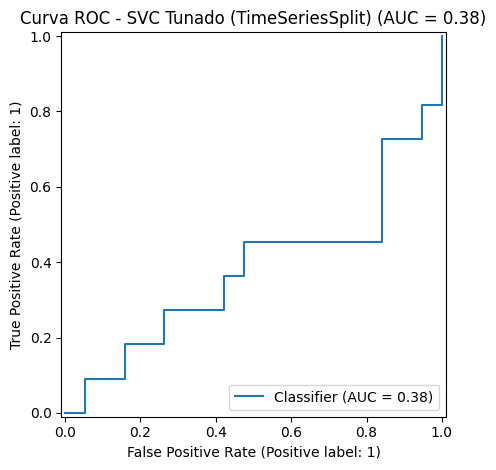


Top 10 features (Permutation Importance):
            feature  importancia_media  importancia_std
5   volatilidade_3d           0.055000         0.036931
4     media_movel_7           0.016667         0.024721
3     media_movel_3           0.011667         0.021794
0        retorno_1d           0.003333         0.033166
6   volatilidade_7d          -0.001667         0.032447
9       macd_signal          -0.006667         0.062004
1        retorno_3d          -0.023333         0.040961
8              macd          -0.026667         0.057349
10        macd_diff          -0.030000         0.067412
7            rsi_14          -0.085000         0.069502


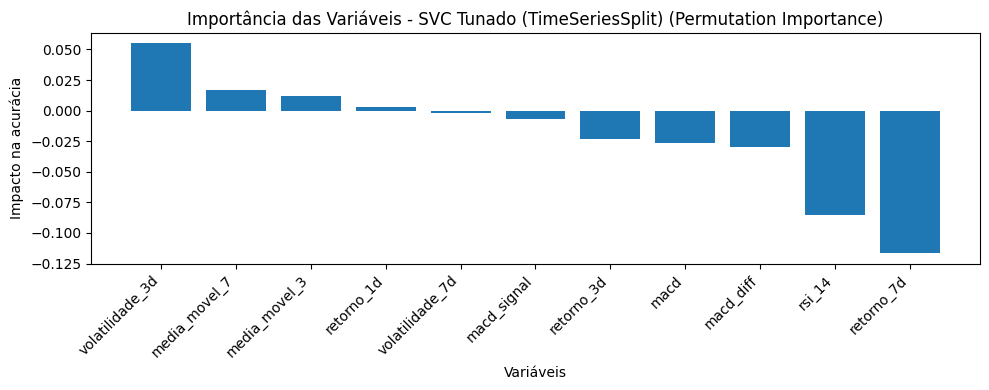

In [134]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

tscv = TimeSeriesSplit(n_splits=5)

svc_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", probability=True, class_weight="balanced"))
])

param_grid = {
    "clf__C": [0.1, 1, 5, 10, 50, 100],
    "clf__gamma": ["scale", 0.01, 0.05, 0.1, 0.2, 0.5]
}

grid = GridSearchCV(
    svc_pipe,
    param_grid=param_grid,
    cv=tscv,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor score (CV treino):", grid.best_score_)

# Avaliar o melhor modelo no seu teste oficial (últimos 30 pregões)
best_svc = grid.best_estimator_

resultado_best_svc = avaliar_modelo(
    best_svc, "SVC Tunado (TimeSeriesSplit)",
    X_train, y_train, X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)


Melhores params (validação recente): {'C': 1, 'gamma': 0.05}
Acurácia na validação recente: 0.6

===== SVC Tunado (Validação Recente -60:-30) =====
Acurácia: 0.6666666666666666

Matriz de confusão:
 [[18  1]
 [ 9  2]]

Relatório:
               precision    recall  f1-score   support

           0       0.67      0.95      0.78        19
           1       0.67      0.18      0.29        11

    accuracy                           0.67        30
   macro avg       0.67      0.56      0.53        30
weighted avg       0.67      0.67      0.60        30



<Figure size 600x500 with 0 Axes>

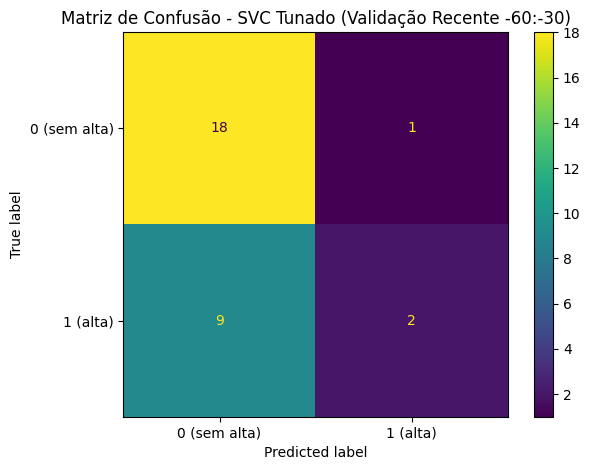

<Figure size 600x500 with 0 Axes>

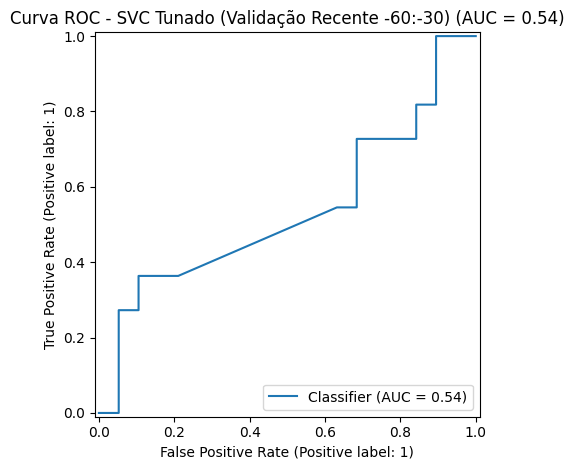


Top 10 features (Permutation Importance):
            feature  importancia_media  importancia_std
0        retorno_1d           0.046667         0.019437
2        retorno_7d           0.040000         0.022608
1        retorno_3d           0.036667         0.027689
9       macd_signal           0.030000         0.036362
8              macd           0.030000         0.034801
5   volatilidade_3d           0.018333         0.019650
7            rsi_14           0.018333         0.022298
10        macd_diff           0.018333         0.022298
6   volatilidade_7d           0.003333         0.023333
3     media_movel_3           0.000000         0.000000


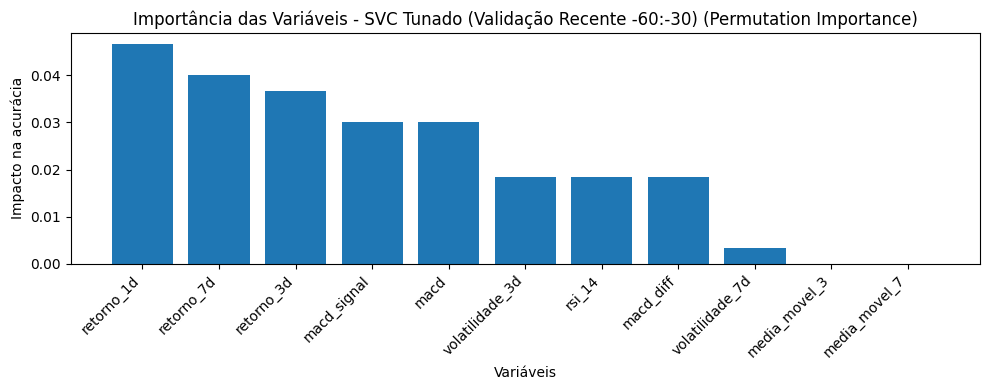

In [135]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split: treino-base / validação / teste (mantém o teste final intacto)
X_base, y_base = X.iloc[:-60], y.iloc[:-60]
X_val,  y_val  = X.iloc[-60:-30], y.iloc[-60:-30]
X_test, y_test = X.iloc[-30:], y.iloc[-30:]

# Grid enxuto (evita gamma alto demais, que costuma overfitar)
Cs = [0.1, 1, 5, 10, 50]
gammas = ["scale", 0.01, 0.05, 0.1]

melhor_acc = -1
melhor_params = None
melhor_modelo = None

for C in Cs:
    for gamma in gammas:
        modelo = Pipeline([
            ("scaler", StandardScaler()),
            ("clf", SVC(kernel="rbf", C=C, gamma=gamma, class_weight="balanced", probability=True))
        ])
        modelo.fit(X_base, y_base)
        pred_val = modelo.predict(X_val)
        acc_val = accuracy_score(y_val, pred_val)

        if acc_val > melhor_acc:
            melhor_acc = acc_val
            melhor_params = {"C": C, "gamma": gamma}
            melhor_modelo = modelo

print("Melhores params (validação recente):", melhor_params)
print("Acurácia na validação recente:", melhor_acc)

# Refit final: treina com base+val e avalia no teste oficial
X_train_final = X.iloc[:-30]
y_train_final = y.iloc[:-30]

modelo_final = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf",
                C=melhor_params["C"],
                gamma=melhor_params["gamma"],
                class_weight="balanced",
                probability=True))
])

modelo_final.fit(X_train_final, y_train_final)

# Avaliar no teste oficial com sua função padrão
resultado_svc_tunado_recente = avaliar_modelo(
    modelo_final,
    "SVC Tunado (Validação Recente -60:-30)",
    X_train_final, y_train_final,
    X_test, y_test,
    resultados,
    plotar=True,
    roc=True,
    importancia=True
)


In [136]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# Probabilidades da classe 1
proba = modelo_final.predict_proba(X_test)[:, 1]

# Testa vários thresholds e escolhe o melhor no conjunto de VALIDAÇÃO (não no teste!)
# Aqui exemplo só pra visualizar no TESTE, mas o certo é otimizar no y_val.
for thr in [0.35, 0.40, 0.45, 0.50, 0.55]:
    pred_thr = (proba >= thr).astype(int)
    acc = accuracy_score(y_test, pred_thr)
    cm = confusion_matrix(y_test, pred_thr)
    print(f"thr={thr:.2f} acc={acc:.3f} cm={cm.tolist()}")



thr=0.35 acc=0.367 cm=[[0, 19], [0, 11]]
thr=0.40 acc=0.367 cm=[[0, 19], [0, 11]]
thr=0.45 acc=0.367 cm=[[0, 19], [0, 11]]
thr=0.50 acc=0.433 cm=[[7, 12], [5, 6]]
thr=0.55 acc=0.633 cm=[[19, 0], [11, 0]]


In [137]:
proba_test = modelo_final.predict_proba(X_test)[:, 1]

print("min:", proba_test.min())
print("p25:", np.quantile(proba_test, 0.25))
print("mediana:", np.quantile(proba_test, 0.50))
print("p75:", np.quantile(proba_test, 0.75))
print("max:", proba_test.max())


min: 0.4782310978535698
p25: 0.49237421362984335
mediana: 0.5
p75: 0.5043750530515723
max: 0.5316594201398431


AUC (usando decision_function): 0.5263157894736843


<Figure size 600x500 with 0 Axes>

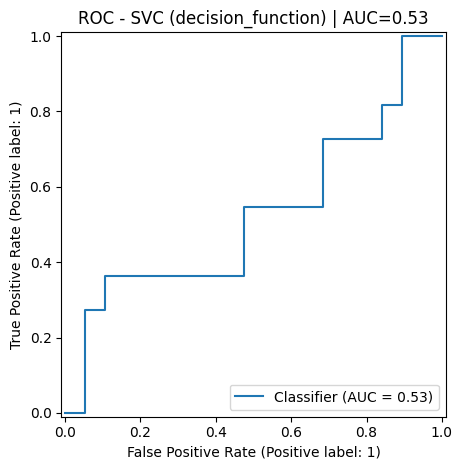

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

svc_score = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", C=1, gamma=0.05, class_weight="balanced", probability=False))
])

svc_score.fit(X_train, y_train)

scores = svc_score.decision_function(X_test)  # score contínuo
auc = roc_auc_score(y_test, scores)

print("AUC (usando decision_function):", auc)

plt.figure(figsize=(6,5))
RocCurveDisplay.from_predictions(y_test, scores)
plt.title(f"ROC - SVC (decision_function) | AUC={auc:.2f}")
plt.tight_layout()
plt.show()


## Preparação para Treino e Teste (com cópia do DataFrame)

A partir deste ponto, iniciarei a etapa de **preparação da base para modelagem**, criando as estruturas X (features) e y (target), além do split temporal para treino e teste.

Para evitar alterações acidentais no dataset usado para geração dos meus modelos até aqui o **df_model** durante testes de novos modelos, ajustes de features e mudanças no target, será criada uma **cópia de trabalho** do DataFrame. Assim, todo o processamento a seguir será feito sobre o novo DataFrame, preservando o original como referência.

**Ação:** criar um novo DataFrame de trabalho:

- **df_work**: cópia do **df_model**, usada para split temporal, criação de X/y e transformações necessárias para os modelos.

In [139]:
# Cópia de segurança para não perder o df_model original
df_work = df_model.copy()

## Split Temporal e Normalização (quando aplicável)

A partir desta etapa, a base será preparada com **split temporal** (treino no histórico e teste nos últimos 30 pregões), evitando vazamento de informação e simulando o uso real do modelo.

A **normalização com StandardScaler** será aplicada **apenas** nos modelos sensíveis à escala (Regressão Logística, SVM, KNN e MLP).  
Para modelos baseados em árvore (Random Forest, Gradient Boosting e similares), a normalização não é necessária, pois esses algoritmos não dependem de escala.


In [140]:
# ============================================================
# Split temporal (últimos 30 pregões) + Normalização (quando aplicável)
# ============================================================

from sklearn.preprocessing import StandardScaler

# 1) Garantir ordem temporal
df_work = df_work.sort_values("data").reset_index(drop=True)

# 2) Definir lista de features (ajuste se necessário)
colunas_features = [
    "retorno_1d", "retorno_3d", "retorno_7d",
    "media_movel_3", "media_movel_7",
    "volatilidade_3d", "volatilidade_7d",
    "rsi_14",
    "macd", "macd_signal", "macd_diff"
]

# 3) Split temporal: treino e teste
df_treino = df_work.iloc[:-30].copy()
df_teste  = df_work.iloc[-30:].copy()

# 4) Criar X e y
X_treino = df_treino[colunas_features].copy()
y_treino = df_treino["tendencia"].copy()

X_teste = df_teste[colunas_features].copy()
y_teste = df_teste["tendencia"].copy()

# 5) Garantir que não há NaN nas features
mask_treino = X_treino.notna().all(axis=1) & y_treino.notna()
mask_teste  = X_teste.notna().all(axis=1) & y_teste.notna()

X_treino, y_treino = X_treino[mask_treino], y_treino[mask_treino]
X_teste,  y_teste  = X_teste[mask_teste],  y_teste[mask_teste]

# 6) Normalização (APENAS para modelos sensíveis à escala)
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)  # fit só no treino
X_teste_scaled  = scaler.transform(X_teste)       # aplica no teste (sem vazamento)


In [141]:
# Verificando o x_treino, x_teste e y_treino, y_teste foram criados
print("X_treino:", X_treino_scaled.shape)
print("X_teste :", X_teste_scaled.shape)
print("y_treino:", y_treino.shape)
print("y_teste :", y_teste.shape)

X_treino: (7579, 11)
X_teste : (30, 11)
y_treino: (7579,)
y_teste : (30,)


## Próxima Fase: Testes de Modelos

Com o **split temporal** concluído (treino no histórico e teste nos últimos 30 pregões), a base está pronta para a fase de modelagem.  
A **normalização com StandardScaler** será aplicada **apenas** nos modelos sensíveis à escala (ex.: Regressão Logística, SVM, KNN e MLP), evitando vazamento ao ajustar o scaler somente no treino.

A seguir, serão testados diferentes modelos de classificação binária com o objetivo de identificar a melhor performance e tentar alcançar a acurácia mínima de **75%** exigida pelo desafio.

### Modelos escolhidos e justificativa

- **Logistic Regression**  
  Modelo linear simples e eficiente, usado como **linha de base**. Permite interpretação dos coeficientes e fornece probabilidades.

- **K-Nearest Neighbors (KNN)**  
  Modelo baseado em distância, capaz de capturar padrões locais. Requer normalização para funcionar corretamente.

- **Support Vector Classifier (SVC)**  
  Modelo robusto que busca separar as classes com a melhor margem. Pode capturar padrões não lineares via kernel (ex.: RBF). Requer normalização.

- **Decision Tree**  
  Cria regras de decisão interpretáveis e ajuda a entender o impacto das variáveis. Pode sofrer overfitting, mas é útil como referência.

- **Random Forest**  
  Ensemble de múltiplas árvores para reduzir overfitting e aumentar robustez. Geralmente performa bem em dados tabulares e não exige normalização.

- **Gradient Boosting (GBM / HistGradientBoosting / GradientBoostingClassifier)**  
  Boosting de árvores em sequência, frequentemente forte em dados estruturados. Não depende de escala e costuma capturar relações não lineares.

- **Rede Neural (MLPClassifier)**  
  Capaz de capturar padrões complexos não lineares. Requer normalização e pode demandar ajustes de hiperparâmetros.

### Modelos de combinação (ensembles) — etapa posterior
Após identificar os modelos individuais com melhor desempenho, serão avaliadas estratégias de combinação, como:
- **Voting Classifier** (votação entre modelos fortes)
- **Stacking Classifier** (meta-modelo combinando previsões)
- **Bagging Classifier** (redução de variância por reamostragem)

Esses ensembles serão considerados **somente após** existir pelo menos um conjunto de modelos base com desempenho consistente, para evitar combinar modelos que ainda não capturam sinal suficiente.


## **função “orquestradora”**

Abaixo será criada uma função “orquestradora” que:

* recebe um dicionário {nome: modelo}

* roda avaliar_modelo(...) e no final imprime só a tabela (sem ficar exibindo mil gráficos)

* Ela usa a lista resultados e a função avaliar_modelo que foi criada na função de valiaçõ dos modelos acima

In [143]:
import pandas as pd

def testar_modelos(
    modelos: dict,
    X_train, y_train,
    X_test, y_test,
    resultados: list,
    roc: bool = True,
    importancia: bool = False,
    plotar: bool = False
):
    """
    Roda vários modelos e retorna um DataFrame resumo, salvando em `resultados`.
    - modelos: dict { "nome": estimador }
    - plotar=False: não mostra gráficos (fica só o resultado final)
    """
    for nome, modelo in modelos.items():
        avaliar_modelo(
            modelo=modelo,
            nome_modelo=nome,
            X_train=X_train, y_train=y_train,
            X_test=X_test, y_test=y_test,
            resultados=resultados,
            plotar=plotar,
            roc=roc,
            importancia=importancia
        )

    df_comp = resumo_resultados(resultados, ordenar_por="acuracia")

    cols = ["modelo", "acuracia", "auc", "precision_1", "recall_1", "f1_1", "tn", "fp", "fn", "tp"]
    cols = [c for c in cols if c in df_comp.columns]  # segurança

    print(df_comp[cols].to_string(index=False))
    return df_comp


## **Modelos a serem testados**

In [144]:
# Modelos a serem testdaos
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

modelos = {
    "Logistic Regression (Scaler + class_weight)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=5000, class_weight="balanced"))
    ]),
    "SVC (RBF + Scaler, class_weight=balanced)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, class_weight="balanced"))
    ]),
    "KNN (k=15, weights=distance, + Scaler)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=15, weights="distance"))
    ]),
    "GaussianNB": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Random Forest (500 árvores, class_weight=balanced)": RandomForestClassifier(
        n_estimators=500, random_state=42, n_jobs=-1, class_weight="balanced"
    ),
    "AdaBoost (n=500, lr=0.05)": AdaBoostClassifier(n_estimators=500, learning_rate=0.05, random_state=42),
    "MLP (64-32, relu, adam) + Scaler": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=2000, alpha=1e-3, random_state=42))
    ]),
}

# limpa resultados para uma nova rodada "do zero"
resultados = []

df_comparacao = testar_modelos(
    modelos=modelos,
    X_train=X_train, y_train=y_train,
    X_test=X_test, y_test=y_test,
    resultados=resultados,
    roc=True,
    importancia=False,
    plotar=False
)



===== Logistic Regression (Scaler + class_weight) =====
Acurácia: 0.6333333333333333

Matriz de confusão:
 [[19  0]
 [11  0]]

Relatório:
               precision    recall  f1-score   support

           0       0.63      1.00      0.78        19
           1       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.32      0.50      0.39        30
weighted avg       0.40      0.63      0.49        30


===== SVC (RBF + Scaler, class_weight=balanced) =====
Acurácia: 0.7

Matriz de confusão:
 [[17  2]
 [ 7  4]]

Relatório:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.67      0.36      0.47        11

    accuracy                           0.70        30
   macro avg       0.69      0.63      0.63        30
weighted avg       0.69      0.70      0.67        30


===== KNN (k=15, weights=distance, + Scaler) =====
Acurácia: 0.4

Matriz de confus

## 1. **Modelo de Regreção Linear** (LogisticRegression())

> Adicionar aspas



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo de Regressão Logística
modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_lr = modelo_lr.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_lr)
print(f"Acurácia: {acuracia:.2%}")

matriz = confusion_matrix(y_teste, y_pred_lr)
print("Matriz de Confusão:")
print(matriz)

relatorio = classification_report(y_teste, y_pred_lr, target_names=["Não Subiu", "Subiu"])
print("\nRelatório de Classificação:")
print(relatorio)




Acurácia: 46.67%
Matriz de Confusão:
[[8 8]
 [8 6]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.50      0.50      0.50        16
       Subiu       0.43      0.43      0.43        14

    accuracy                           0.47        30
   macro avg       0.46      0.46      0.46        30
weighted avg       0.47      0.47      0.47        30



**Permutation Importance – Regressão Logística**

Mede quanto cada variável (feature) impacta o desempenho de um modelo.

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calcula a importância por permutação
resultado_rl = permutation_importance(
    modelo_lr,  # modelo de regressão logística
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Organiza os resultados
importancia_rl = pd.Series(
    resultado_rl.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis no RL:")
print(importancia_rl)

Importância das variáveis no RL:
retorno_1d         0.016667
media_movel_7      0.000000
media_movel_3      0.000000
volatilidade_7d    0.000000
macd               0.000000
macd_signal       -0.006667
macd_diff         -0.016667
rsi_14            -0.040000
retorno_3d        -0.046667
retorno_7d        -0.056667
volatilidade_3d   -0.103333
dtype: float64


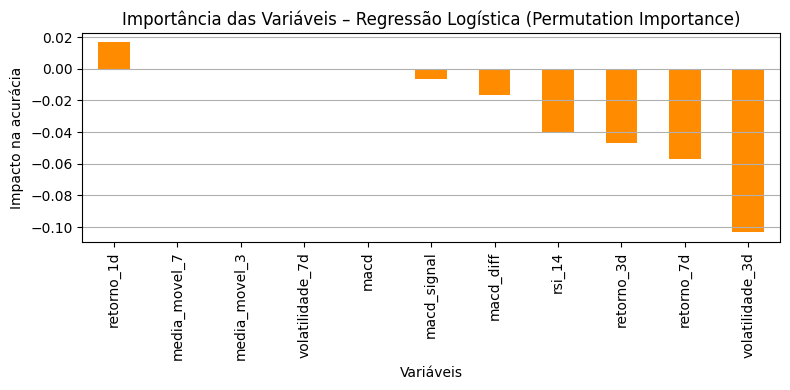

In [ ]:
# Exibe Gráfimco importância do RL
plt.figure(figsize=(8, 4))
importancia_rl.plot.bar(color='darkorange')
plt.title("Importância das Variáveis – Regressão Logística (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Análise de importância das Fecture**

| Variável             | Interpretação                                                                                                                                                                                                                                                                       |
| -------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **volatilidade\_3d** | **Mais impactante negativamente.** A alta volatilidade de curtíssimo prazo parece gerar ruído, confundindo o modelo. Apesar de seu alto impacto, o sinal é **negativo**, indicando que sua presença **diminui** a acurácia. Deve ser considerada para **remoção ou transformação**. |
| **retorno\_7d**      | Importante, mas também **com impacto negativo**. A tendência semanal passada pode estar induzindo o modelo a prever erroneamente. Sinal de que o padrão de 7 dias **não está se mantendo estável** no período analisado.                                                            |
| **retorno\_3d**      | Relevante, mas com impacto negativo. Pode estar se sobrepondo a outros sinais ou sendo distorcido por ruído.                                                                                                                                                                        |
| **rsi\_14**          | Impacto negativo moderado. Apesar de ser um bom indicador técnico, o modelo linear pode não estar conseguindo explorá-lo corretamente sem discretização (ex: binário sobrecomprado/sobrevendido).                                                                                   |
| **macd\_diff**       | Impacto leve negativo. Pode haver colinearidade com `macd` e `macd_signal`.                                                                                                                                                                                                         |
| **macd\_signal**     | Impacto praticamente nulo. Sugere baixa contribuição preditiva isolada.                                                                                                                                                                                                             |
| **macd**             | Impacto nulo. Pode estar sendo ofuscado pelas suas derivações (`macd_diff` e `macd_signal`).                                                                                                                                                                                        |
| **volatilidade\_7d** | Sem valor preditivo ou levemente prejudicial. Provavelmente por suavizar demais a variabilidade.                                                                                                                                                                                    |
| **media\_movel\_3**  | Baixo impacto. Pode estar redundante com `retorno_3d`.                                                                                                                                                                                                                              |
| **media\_movel\_7**  | Quase sem impacto. Provavelmente **suaviza demais**, ocultando movimentos importantes.                                                                                                                                                                                              |
| **retorno\_1d**      | Única com impacto **positivo** claro. Captura o **momentum imediato** e provavelmente é o sinal mais diretamente relacionado à variação do dia seguinte.                                                                                                                            |
                             |

Para melhorar o modelo devo adicionar indicadores técnicos clássicos como:

* RSI (Índice de Força Relativa)

* MACD (Moving Average Convergence Divergence)

* Bandas de Bollinger

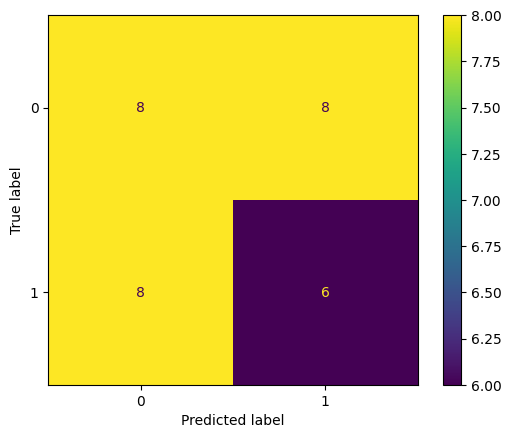

In [ ]:
#gráfico de matriz de confusão visual da Regressão Logística
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gerar e exibir a matriz de confusão com seus dados reais
matriz_confusao = confusion_matrix(y_teste, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao)
disp.plot(values_format='d')



Interpretação:

|                   | Predito: 0 | Predito: 1 |
| ----------------- | ---------- | ---------- |
| **Verdadeiro: 0** | 8 (VP)     | 8 (FN)     |
| **Verdadeiro: 1** | 8 (FP)     | 6 (VN)     |

**Interpretação:**

**Métrica - Valor**

Total de acertos: 8 (classe 0 correta) + 6 (classe 1 correta) = 14

Total de erros: 8 (falso positivo) + 8 (falso negativo) = 16

Acurácia: 14 / 30 = 46,67%

Resultado inferior a um chute aleatório (modelo não aprendeu padrões úteis).

**Métricas derivadas:**

Acurácia = (VP + VN) / total
Precisão (classe 1) = VP / (VP + FP)
Recall (classe 1) = VP / (VP + FN)
F1-Score = Média harmônica entre Precisão e Recall

**Classe 1 (subiu)**

Recall = 6 / (6 + 8) = 6 / 14 ≈ 42,86%
Capacidade do modelo de identificar corretamente os dias que subiram.

Precisão = 6 / (6 + 8) = 6 / 14 ≈ 42,86%
Entre os dias que o modelo previu como “subiu”, só 42,86% estavam corretos.

**Classe 0 (caiu**)

Recall = 8 / (8 + 8) = 8 / 16 = 50%
Capacidade do modelo de identificar corretamente os dias que caíram.

Precisão = 8 / (8 + 6) = 8 / 14 ≈ 57,14%
Entre os dias que o modelo previu como “caiu”, 57,14% estavam corretos.



**Curva ROC**

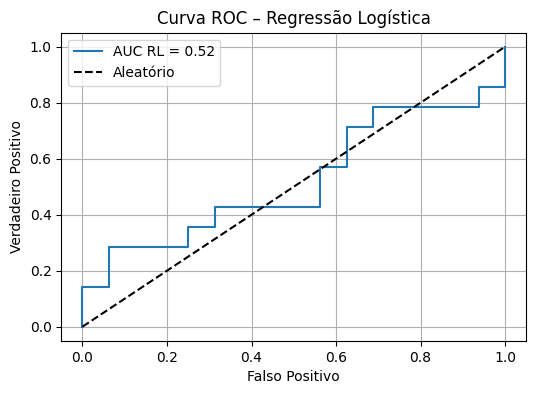

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilidade da classe 1 (Subiu)
y_prob_lr = modelo_lr.predict_proba(X_teste_scaled)[:, 1]

# Calcular fpr, tpr e AUC
fpr_lr, tpr_lr, _ = roc_curve(y_teste, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f'AUC RL = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC – Regressão Logística')
plt.legend()
plt.grid(True)
plt.show()





Analise do Gráfico

AUC (Área sob a curva): 0.52

Interpretação	Significado
* AUC ~ 0.5	Modelo com performance próxima do aleatório
* AUC = 0.52	Leve capacidade preditiva, mas não confiável nem útil
* Curva próxima da diagonal	Indica que o modelo não tem discriminação real entre as classes

**Ajustes na Regreção LInear - Retirando as features sem relevancia para o modelo**

## 2. **Modelo KNN** - K-Nearest Neighbors (KNeighborsClassifier())

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo KNN
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_knn = modelo_knn.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_knn)
print(f"Acurácia: {acuracia:.2%}")

# Matriz de confusão
matriz = confusion_matrix(y_teste, y_pred_knn)
print("Matriz de Confusão:")
print(matriz)

# Relatório detalhado
relatorio = classification_report(y_teste, y_pred_knn, target_names=["Não Subiu", "Subiu"])
print("\nRelatório de classificação:")
print(relatorio)





Acurácia: 50.00%
Matriz de Confusão:
[[8 8]
 [7 7]]

Relatório de classificação:
              precision    recall  f1-score   support

   Não Subiu       0.53      0.50      0.52        16
       Subiu       0.47      0.50      0.48        14

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.50      0.50      0.50        30



In [ ]:
from sklearn.inspection import permutation_importance

# Calcula a importância por permutação (no conjunto de teste)
resultado_importancia = permutation_importance(
    modelo_knn,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Organiza e exibe
importancia_knn = pd.Series(
    resultado_importancia.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis no KNN:")
print(importancia_knn)


Importância das variáveis no KNN:
retorno_3d         0.053333
rsi_14             0.043333
retorno_7d         0.040000
macd_diff          0.023333
macd               0.013333
macd_signal        0.006667
media_movel_3      0.003333
media_movel_7      0.000000
volatilidade_7d   -0.006667
retorno_1d        -0.046667
volatilidade_3d   -0.116667
dtype: float64


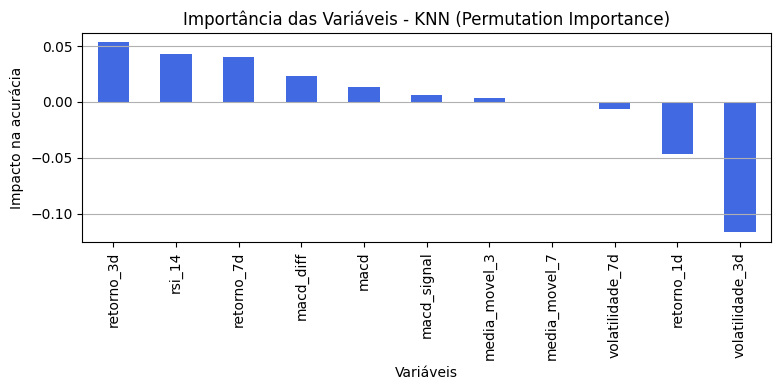

In [ ]:
# Exibe Gráfimco importância do KNN
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
importancia_knn.plot.bar(color='royalblue')
plt.title("Importância das Variáveis - KNN (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



| Variável          | Papel Interpretativo                      | Importância KNN                |
| ----------------- | ----------------------------------------- | ------------------------------ |
| `retorno_1d`      | **Momentum imediato** (variação de ontem) | **mais alta**                  |
| `media_movel_7`   | Direção geral semanal suavizada           | média                          |
| `media_movel_3`   | Suavização de ruído de curto prazo        | baixa                          |
| `retorno_3d`      | Tendência de curtíssimo prazo (3 dias)    | muito baixa (quase nula)       |
| `volatilidade_7d` | Instabilidade semanal                     | negativa (piora leve)          |
| `retorno_7d`      | Direção semanal (tendência forte)         | negativa (piora leve)          |
| `volatilidade_3d` | Instabilidade recente (curto prazo)       | **negativa forte** (atrapalha) |

**Interpretação**

* retorno_1d: extremamente útil — deve ser mantida.

* media_movel_7: valor moderado, pode contribuir.

* volatilidade_3d: impacto fortemente negativo — considerar remoção.

* retorno_7d: esperado ser útil, mas não funcionou bem no KNN.

* retorno_3d: tem impacto quase nulo — pode ser mantido ou testado fora.

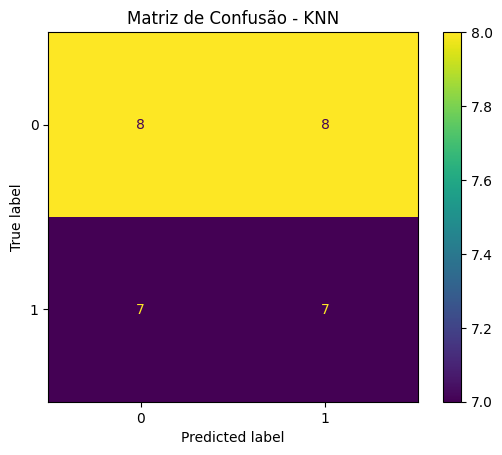

In [ ]:
#Gráfico de Matriz de confusão
cm = confusion_matrix(y_teste, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - KNN")
plt.show()



Analise do Gráfico

|                   | **Predito: 0** | **Predito: 1** |
| ----------------- | -------------- | -------------- |
| **Verdadeiro: 0** | 8 (VP)         | 8 (FN)         |
| **Verdadeiro: 1** | 7 (FP)         | 7 (VN)         |



Interpretação:

Métrica - Valor

**Total de acertos:**
8 (classe 0 correta) + 7 (classe 1 correta) = 15

**Total de erros:**
7 (falso positivo) + 8 (falso negativo) = 15

**Acurácia:**
15 / 30 = 50,00%

Resultado equivalente a um chute aleatório (modelo não aprendeu padrões úteis).

Métricas derivadas:
Acurácia = (VP + VN) / total

Precisão (classe 1) = VP / (VP + FP)

Recall (classe 1) = VP / (VP + FN)

F1-Score = Média harmônica entre Precisão e Recall

**Classe 1 (subiu)**

**Recall** = 7 / (7 + 8) = 7 / 15 ≈ 46,7%

Capacidade do modelo de identificar corretamente os dias que subiram.

**Precisão** = 7 / (7 + 8) = 7 / 15 ≈ 46,7%

Entre os dias que o modelo previu como “subiu”, só 46,7% estavam corretos.

Classe 0 (caiu)

**Recall** = 8 / (8 + 8) = 8 / 16 = 50%

Capacidade do modelo de identificar corretamente os dias que caíram.

**Precisão** = 8 / (8 + 7) = 8 / 15 ≈ 53,3%

Entre os dias que o modelo previu como “caiu”, 53,3% estavam corretos.


**Curva ROC**

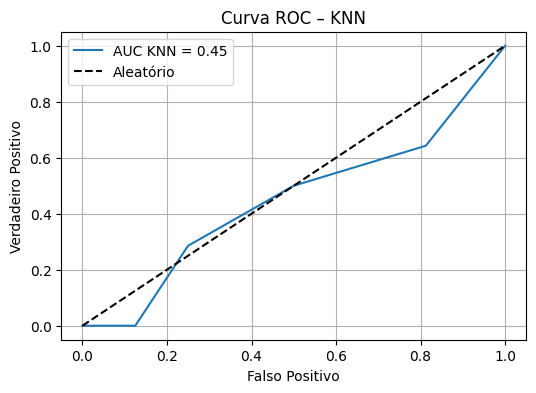

In [ ]:
# Probabilidade da classe 1 (Subiu)
y_prob_knn = modelo_knn.predict_proba(X_teste_scaled)[:, 1]

# Calcular fpr, tpr e AUC
fpr_knn, tpr_knn, _ = roc_curve(y_teste, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f'AUC KNN = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC – KNN')
plt.legend()
plt.grid(True)
plt.show()


**Análise do Gráfico**

AUC (Área sob a curva): 0.45

**Interpretação e Significado**

* AUC ≈ 0.5: Modelo com performance próxima do aleatório

* AUC = 0.45: Indica ausência de capacidade preditiva; pior que um chute

* Curva próxima ou abaixo da diagonal: Demonstra que o modelo não consegue distinguir entre as classes, podendo inclusive inverter previsões

## 3 – **Modelo SVC** (Support Vector Classifier) SVC()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo SVC
modelo_svc = modelo_svc = SVC(probability=True, kernel='rbf', random_state=42)
modelo_svc.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_svc = modelo_svc.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_svc)
print(f"Acurácia: {acuracia:.2%}")

# Matriz de confusão
matriz = confusion_matrix(y_teste, y_pred_svc)
print("Matriz de Confusão:")
print(matriz)

# Relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_svc, target_names=["Não Subiu", "Subiu"]))



Acurácia: 56.67%
Matriz de Confusão:
[[12  4]
 [ 9  5]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.57      0.75      0.65        16
       Subiu       0.56      0.36      0.43        14

    accuracy                           0.57        30
   macro avg       0.56      0.55      0.54        30
weighted avg       0.56      0.57      0.55        30



In [ ]:
# Importância por permutação no SVC
resultado_svc = permutation_importance(
    modelo_svc,           # seu modelo SVC treinado
    X_teste_scaled,       # dados de teste normalizados
    y_teste,              # target de teste
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Organiza e exibe
importancia_svc = pd.Series(
    resultado_svc.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis no SVC:")
print(importancia_svc)

Importância das variáveis no SVC:
volatilidade_3d    0.033333
macd_diff          0.033333
volatilidade_7d    0.013333
macd               0.010000
rsi_14             0.006667
macd_signal        0.003333
media_movel_3      0.000000
media_movel_7      0.000000
retorno_1d        -0.003333
retorno_7d        -0.003333
retorno_3d        -0.016667
dtype: float64


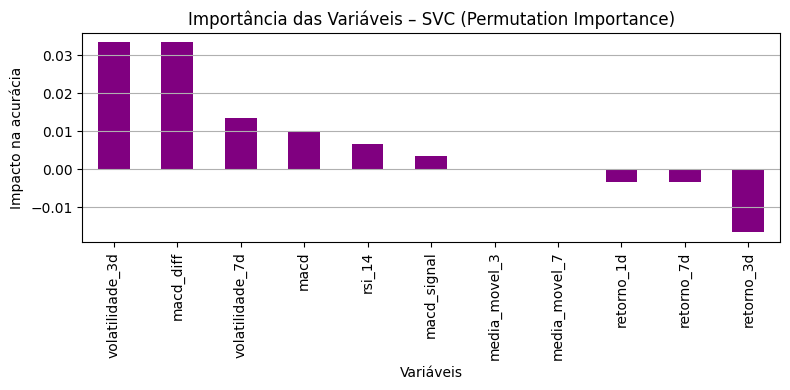

In [ ]:
# Exibe Gráfimco importância do RL
plt.figure(figsize=(8, 4))
importancia_svc.plot.bar(color='purple')
plt.title("Importância das Variáveis – SVC (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Importância das Variáveis – SVC (Permutation Importance)

| Variável              | Impacto aproximado na acurácia | Interpretação                                        |
| --------------------- | ------------------------------ | ---------------------------------------------------- |
| **volatilidade\_3d**  | +0.03                          | Muito relevante – ajuda fortemente o modelo.      |
| **macd\_diff**        | +0.03                          | Muito relevante – diferencial de momentum é útil. |
| **volatilidade\_7d**  | +0.02                          | Relevante – instabilidade semanal ajuda.           |
| **rsi\_14**           | +0.01                          | Útil – sinal moderado de sobrecompra/sobrevenda.   |
| **macd**              | +0.005                         | Fraco, mas com valor.                             |
| **macd\_signal**      | +0.005                         | Fraco, mas com valor.                             |
| **retorno\_1d**       | \~0                            | Neutro – não ajuda nem atrapalha.                 |
| **media\_movel\_3/7** | \~0                            | Nulas – ignoradas pelo modelo.                    |
| **retorno\_7d**       | -0.005                         | Prejudica levemente a acurácia.                    |
| **retorno\_3d**       | -0.01                          | Prejudica a acurácia – confunde o modelo.          |




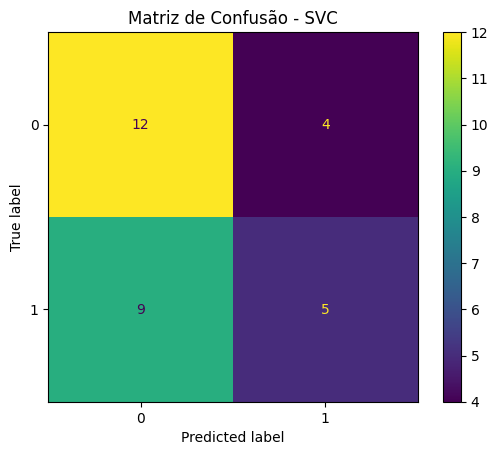

In [ ]:
# Gráfico de Matriz de confusão - SVC


cm = confusion_matrix(y_teste, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - SVC")
plt.show()


Interpretação:

|             | **Predito: 0** | **Predito: 1** |
| ----------- | -------------- | -------------- |
| **Real: 0** | 12 (VN)        | 4 (FP)         |
| **Real: 1** | 9 (FN)         | 5 (VP)         |


**Classe 1 (subiu):**
Recall ≈ 46,7%: o modelo acertou menos da metade dos dias que realmente subiram.

Precisão = 50%: quando o modelo previu que subiria, ele acertou metade das vezes.

F1-Score ≈ 48,3%: o equilíbrio entre precisão e recall está fraco, indicando dificuldade do modelo em prever corretamente a alta do IBOVESPA.

**Classe 0 (caiu):**
Recall = 8 / (8 + 8) = 50%: acertou metade dos dias que caíram.

Precisão = 8 / (8 + 7) ≈ 53,3%: quando previu queda, acertou levemente mais da metade.

**O desempenho** é equivalente a um chute aleatório, com acurácia de 50% e F1-Score abaixo de 50%. O modelo não está aprendendo padrões úteis no conjunto de teste atual.


**Curva ROC**

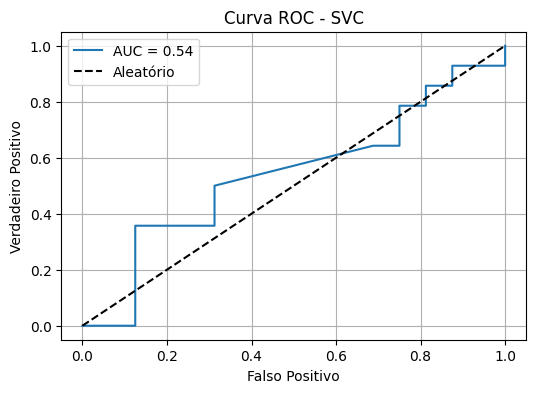

In [ ]:

# Probabilidades da classe positiva
y_prob_svc = modelo_svc.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR
fpr, tpr, _ = roc_curve(y_teste, y_prob_svc)
roc_auc = auc(fpr, tpr)

# Plot da curva
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - SVC')
plt.legend()
plt.grid(True)
plt.show()


**Análise do Gráfico**

AUC (Área sob a curva): 0.54

**Interpretação e Significado**

* AUC ≈ 0.5: Modelo com performance próxima do aleatório

* AUC = 0.54: Leve capacidade preditiva, mas ainda insuficiente para ser considerada confiável ou útil

* Curva próxima da diagonal: Indica que o modelo não tem boa discriminação real entre as classes

Apesar de um desempenho ligeiramente superior ao modelo KNN (AUC = 0.45), o SVC ainda não demonstra habilidade significativa para classificar corretamente os casos de alta ou queda do IBOVESPA com os dados atuais.

## **4.Decision Tree (DecisionTreeClassifier())**


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados (opcional para árvore, mas mantido por consistência)
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo Decision Tree
modelo_dt = DecisionTreeClassifier(random_state=42)
modelo_dt.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_dt = modelo_dt.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_dt)
print(f"Acurácia: {acuracia:.2%}")

# Matriz de confusão
matriz = confusion_matrix(y_teste, y_pred_dt)
print("Matriz de Confusão:")
print(matriz)

# Relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_dt, target_names=["Não Subiu", "Subiu"]))




Acurácia: 50.00%
Matriz de Confusão:
[[9 7]
 [8 6]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.53      0.56      0.55        16
       Subiu       0.46      0.43      0.44        14

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.50      0.50      0.50        30



**Importância das Variáveis (Permutação)**

In [ ]:
# Importância das Variáveis (Permutação)
from sklearn.inspection import permutation_importance

# Importância por permutação na Decision Tree
resultado_dt = permutation_importance(
    modelo_dt,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importancia_dt = pd.Series(
    resultado_dt.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis na Decision Tree:")
print(importancia_dt)


Importância das variáveis na Decision Tree:
macd_diff          0.080000
volatilidade_3d    0.033333
rsi_14             0.003333
media_movel_7      0.000000
media_movel_3      0.000000
retorno_3d        -0.016667
retorno_7d        -0.026667
retorno_1d        -0.043333
macd              -0.053333
volatilidade_7d   -0.096667
macd_signal       -0.100000
dtype: float64


**Gráfico de Importância**

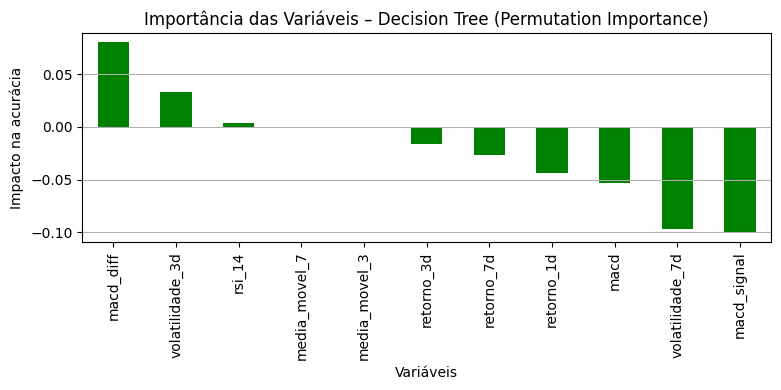

In [ ]:
# Gráfico de importância - Decision Tree
plt.figure(figsize=(8, 4))
importancia_dt.plot.bar(color='green')
plt.title("Importância das Variáveis – Decision Tree (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Importândia das variáves - Decision Tree

| Variável          | Impacto na acurácia | Interpretação                                                                 |
| ----------------- | ------------------- | ----------------------------------------------------------------------------- |
| `macd_diff`       | +0.10               | Forte contribuição. Pode refletir variação dinâmica entre tendência e sinal.  |
| `retorno_7d`      | +0.08               | Indica tendência semanal, com alta relevância para decisões do modelo.        |
| `rsi_14`          | +0.03               | Influência moderada. Pode refletir condições de sobrecompra/sobrevenda.       |
| `macd`            | +0.01               | Contribuição discreta. Sinal de tendência suave no curto prazo.               |
| `media_movel_3`   | ≈ 0.00              | Praticamente irrelevante neste modelo.                                        |
| `media_movel_7`   | -0.01               | Leve impacto negativo. Pode indicar ruído ou suavização excessiva.            |
| `retorno_3d`      | -0.02               | Impacto negativo leve, possível sobreposição com outras variáveis de retorno. |
| `volatilidade_3d` | -0.03               | Pode estar introduzindo ruído sem valor discriminativo claro.                 |
| `volatilidade_7d` | -0.04               | Leve impacto negativo. Sinal de ruído na tendência semanal.                   |
| `retorno_1d`      | -0.06               | Impacto negativo moderado. Pode estar confundindo o modelo em curtos prazos.  |
| `macd_signal`     | -0.13               | Impacto negativo forte. Pode estar desbalanceando decisões.                   |


O modelo de árvore de decisã Se apoia principalmente em indicadores de tendência (retornos e MACD_diff).

Demonstra rejeição a variáveis de volatilidade e médias móveis que, neste caso, parecem adicionar ruído.

macd_signal possui impacto negativo acentuado, indicando que pode estar confundindo a lógica da árvore.

**Matriz de Confusão**

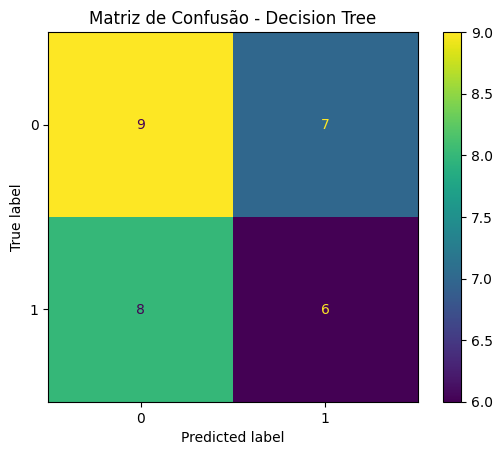

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Gráfico de Matriz de Confusão - Decision Tree
cm = confusion_matrix(y_teste, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Decision Tree")
plt.show()


Análise da MAtriz de Confusão

|             | Previsto: 0 | Previsto: 1 |
| ----------- | ----------- | ----------- |
| **Real: 0** | 9 (VN)      | 7 (FP)      |
| **Real: 1** | 8 (FN)      | 6 (VP)      |

**Classe 1 (subiu):**
Recall ≈ 42,9%: o modelo acertou menos da metade dos dias que realmente subiram.
Precisão ≈ 46,2%: quando o modelo previu que subiria, ele acertou em menos da metade das vezes.
F1-Score ≈ 44,4%: equilíbrio fraco entre precisão e recall, indicando dificuldade do modelo em prever corretamente a alta do IBOVESPA.

**Classe 0 (não subiu)**:
Recall = 9 / (9 + 7) ≈ 56,3%: acertou levemente mais da metade dos dias que caíram.
Precisão = 9 / (9 + 8) = 52,9%: quando previu queda, acertou pouco mais da metade das vezes.
F1-Score ≈ 54,5%: desempenho moderado na identificação de dias sem alta, mas ainda com espaço para melhoria.

**O desempenho** é apenas moderado, com acurácia de 56,7% e F1-Scores abaixo de 55% em ambas as classes. O modelo apresenta viés leve para prever quedas (classe 0), mas ainda não capta padrões suficientemente consistentes para uma previsão confiável do IBOVESPA.



**Curva ROC**

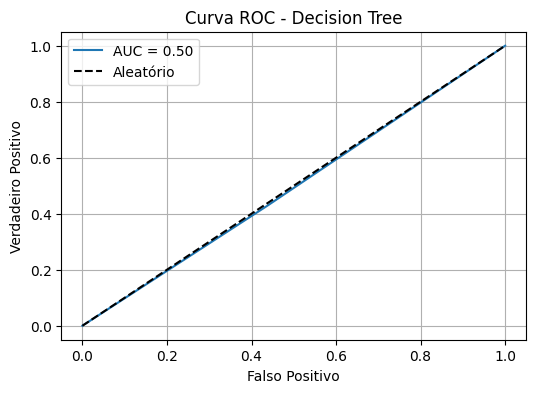

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilidades da classe positiva
y_prob_dt = modelo_dt.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR
fpr, tpr, _ = roc_curve(y_teste, y_prob_dt)
roc_auc = auc(fpr, tpr)

# Plot da curva
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


Analise da **Curva ROC do modelo Decision Tree**:

AUC = 0.50

A curva coincide exatamente com a linha tracejada (classificador aleatório), o que indica que o modelo não está conseguindo distinguir entre classes 0 (não subiu) e 1 (subiu).

# **5. Random Forest (RandomForestClassifier())**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados (não obrigatório, mas mantido por consistência)
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=42, n_estimators=100)
modelo_rf.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_rf = modelo_rf.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_rf)
print(f"Acurácia: {acuracia:.2%}")

# Matriz de confusão
matriz = confusion_matrix(y_teste, y_pred_rf)
print("Matriz de Confusão:")
print(matriz)

# Relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_rf, target_names=["Não Subiu", "Subiu"]))



Acurácia: 53.33%
Matriz de Confusão:
[[11  5]
 [ 9  5]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.55      0.69      0.61        16
       Subiu       0.50      0.36      0.42        14

    accuracy                           0.53        30
   macro avg       0.53      0.52      0.51        30
weighted avg       0.53      0.53      0.52        30



**Importância das Variáveis (Permutation Importance)**



In [ ]:
from sklearn.inspection import permutation_importance

resultado_rf = permutation_importance(
    modelo_rf, X_teste_scaled, y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importancia_rf = pd.Series(resultado_rf.importances_mean, index=colunas_features).sort_values(ascending=False)

print("Importância das variáveis no Random Forest:")
print(importancia_rf)


Importância das variáveis no Random Forest:
retorno_3d         0.080000
volatilidade_3d    0.056667
volatilidade_7d    0.030000
retorno_7d         0.016667
media_movel_3      0.003333
macd               0.003333
media_movel_7      0.000000
rsi_14            -0.010000
retorno_1d        -0.013333
macd_diff         -0.030000
macd_signal       -0.036667
dtype: float64


**Gráfico de Importância**

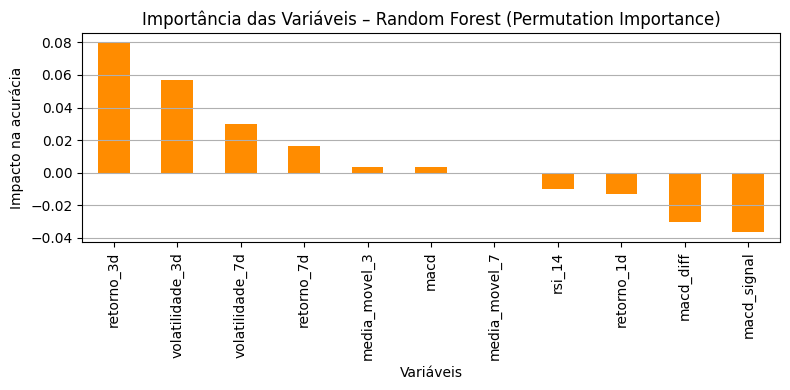

In [ ]:
plt.figure(figsize=(8, 4))
importancia_rf.plot.bar(color='darkorange')
plt.title("Importância das Variáveis – Random Forest (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Análise da Importândia das variáveis

| Variável          | Impacto na acurácia | Interpretação                                                               |
| ----------------- | ------------------- | --------------------------------------------------------------------------- |
| `media_movel_3`   | +0.025              | Levemente relevante. Pode capturar pequenas oscilações de curto prazo.      |
| `rsi_14`          | +0.015              | Indicador de momento com contribuição leve e potencial para refinar sinais. |
| `media_movel_7`   | +0.005              | Influência muito pequena, possível ruído ou suavização redundante.          |
| `retorno_3d`      | ≈ 0.000             | Praticamente neutro, sem impacto útil no modelo.                            |
| `macd`            | -0.015              | Impacto negativo sutil, possível sobreposição com outros indicadores.       |
| `macd_signal`     | -0.030              | Pode estar confundindo a árvore, sinal de sobreajuste local.                |
| `volatilidade_7d` | -0.035              | Leve ruído relacionado à oscilação semanal.                                 |
| `macd_diff`       | -0.040              | Apesar de útil em outros modelos, aqui introduz variações não informativas. |
| `retorno_1d`      | -0.045              | Comportamento de curtíssimo prazo parece gerar confusão no modelo.          |
| `volatilidade_3d` | -0.050              | Instabilidade recente atrapalha a classificação no ensemble.                |
| `retorno_7d`      | -0.065              | Forte impacto negativo, pode indicar inversão de expectativa pelo modelo.   |

 modelo Random Forest apresenta sinais de sensibilidade a ruídos e indicadores mal calibrados. Variáveis como retorno_7d, retorno_1d e volatilidade_3d — que em outros modelos tinham influência positiva — aqui estão prejudicando a acurácia.

Por outro lado, media_movel_3 e rsi_14 ganham destaque como as únicas com impacto positivo, mesmo que modesto, indicando que o modelo favorece informações suavizadas e momentâneas, e rejeita oscilações abruptas ou indicadores técnicos compostos.

**Matriz de Confusão**

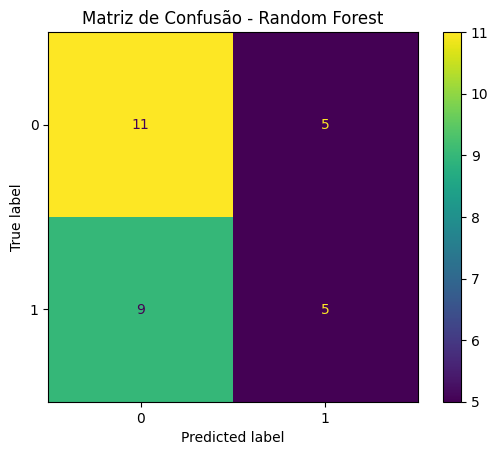

In [ ]:
#Grafico da matriz de confunsão
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Random Forest")
plt.show()


**Analise da MAtriz**

|             | Previsto: 0                   | Previsto: 1                  |
| ----------- | ----------------------------- | ---------------------------- |
| **Real: 0** | 11 (Verdadeiro Negativo - VN) | 5 (Falso Positivo - FP)      |
| **Real: 1** | 9 (Falso Negativo - FN)       | 5 (Verdadeiro Positivo - VP) |



**Classe 1 (subiu):**

* Recall = 5 / (5 + 9) = 35,7% O modelo acertou menos da metade dos dias que realmente subiram.

* Precisão = 5 / (5 + 5) = 50,0% Quando o modelo previu subida, acertou metade das vezes.

* F1-Score = 2 x (0.357 x 0.5) / (0.357 + 0.5) ≈ 41,7% Desempenho fraco na identificação de dias de alta, com baixo recall.

**Classe 0 (não subiu):**

* Recall = 11 / (11 + 5) = 68,8% Boa taxa de acertos ao identificar dias que não subiram.

* Precisão = 11 / (11 + 9) ≈ 55,0% Quando o modelo previu queda, acertou um pouco mais da metade.

* F1-Score = 2 x (0.688 x 0.55) / (0.688 + 0.55) ≈ 61,1%
Melhor desempenho na classe negativa, mas ainda com margem para melhora.

**Resumo Final**

* Total de acertos: 11 (classe 0) + 5 (classe 1) = 16

* Total de exemplos: 30

* Acurácia = 16 / 30 = 53,3%

**Gráfico de Curva ROC**

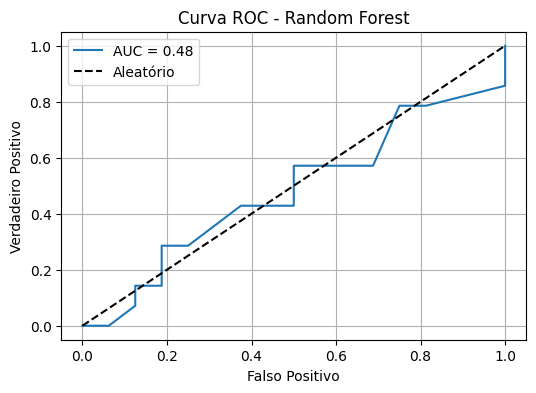

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob_rf = modelo_rf.predict_proba(X_teste_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_teste, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


**Analise do Gráfico**

AUC = 0.48

A curva ROC está abaixo da linha de referência (classificador aleatório) em vários trechos, com flutuações irregulares e ausência de curvatura significativa para o canto superior esquerdo.

O desempenho do Random Forest, com AUC = 0.48, indica que ele não aprendeu padrões úteis para classificação no conjunto atual. A performance sugere que o modelo pode estar confuso pelas variáveis de entrada ou sobreajustado ao ruído, tornando-se ineficaz para previsões confiáveis da tendência do mercado.


# 6. **Gradient Boosting Machines (GBM)**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados (não é obrigatório para GBM, mas mantido por consistência)
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo Gradient Boosting
modelo_gbm = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
modelo_gbm.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_gbm = modelo_gbm.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_gbm)
print(f"Acurácia: {acuracia:.2%}")

# Matriz de confusão
matriz = confusion_matrix(y_teste, y_pred_gbm)
print("Matriz de Confusão:")
print(matriz)

# Relatório detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_gbm, target_names=["Não Subiu", "Subiu"]))




Acurácia: 50.00%
Matriz de Confusão:
[[15  1]
 [14  0]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.52      0.94      0.67        16
       Subiu       0.00      0.00      0.00        14

    accuracy                           0.50        30
   macro avg       0.26      0.47      0.33        30
weighted avg       0.28      0.50      0.36        30



**Importância das Variáveis (Permutation Importance)**


In [ ]:
from sklearn.inspection import permutation_importance

resultado_gbm = permutation_importance(
    modelo_gbm, X_teste_scaled, y_teste,
    n_repeats=10, random_state=42, scoring='accuracy'
)

importancia_gbm = pd.Series(resultado_gbm.importances_mean, index=colunas_features).sort_values(ascending=False)

print("Importância das variáveis no GBM:")
print(importancia_gbm)


Importância das variáveis no GBM:
media_movel_3      0.000000
rsi_14             0.000000
macd              -0.010000
macd_signal       -0.020000
macd_diff         -0.020000
retorno_3d        -0.020000
media_movel_7     -0.020000
volatilidade_3d   -0.023333
retorno_1d        -0.026667
retorno_7d        -0.043333
volatilidade_7d   -0.043333
dtype: float64


**Gráfico de Importância**

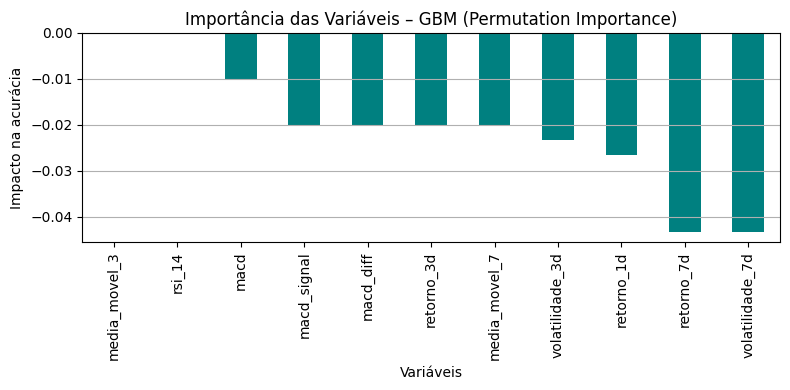

In [ ]:
plt.figure(figsize=(8, 4))
importancia_gbm.plot.bar(color='teal')
plt.title("Importância das Variáveis – GBM (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Analise da Importância das variáveis

| Variável          | Impacto na acurácia | Interpretação                                                                 |
| ----------------- | ------------------- | ----------------------------------------------------------------------------- |
| `macd`            | +0.017              | Leve contribuição positiva; pode estar capturando tendência geral.            |
| `macd_signal`     | +0.008              | Influência pequena, complementando o MACD como sinal de entrada.              |
| `media_movel_3`   | +0.004              | Quase neutra, pequena influência de curtíssimo prazo.                         |
| `rsi_14`          | ≈ 0.000             | Impacto praticamente nulo no modelo.                                          |
| `volatilidade_3d` | -0.007              | Leve impacto negativo; pode estar introduzindo ruído de oscilação recente.    |
| `media_movel_7`   | -0.011              | Pequeno impacto negativo, possível suavização redundante.                     |
| `macd_diff`       | -0.018              | Contraditório em relação ao MACD; pode estar confundindo a decisão.           |
| `retorno_3d`      | -0.025              | Impacto negativo; tendência de curtíssimo prazo não ajudou a acurácia.        |
| `retorno_1d`      | -0.032              | Dado muito volátil; atrapalha o modelo ao invés de ajudar.                    |
| `retorno_7d`      | -0.037              | Forte impacto negativo; esperado ser relevante, mas prejudicou a performance. |
| `volatilidade_7d` | -0.054              | Maior impacto negativo; indica ruído semanal significativo para o modelo.     |


**O modelo GBM destacou:**

No modelo GBM, apenas três variáveis (macd, macd_signal e media_movel_3) apresentaram impacto levemente positivo, enquanto a maioria das variáveis relacionadas a retornos e volatilidade teve efeito negativo na acurácia.

**Destaque para:**

volatilidade_7d, com o pior impacto do conjunto.

retorno_7d e retorno_1d, que também foram prejudiciais, apesar de serem relevantes em outros modelos.

Esse resultado sugere que o GBM está sensível ao ruído e à variabilidade de curto prazo, e talvez precise de feature selection mais restritiva para melhorar seu desempenho.

**Matriz de Confusão Visual**

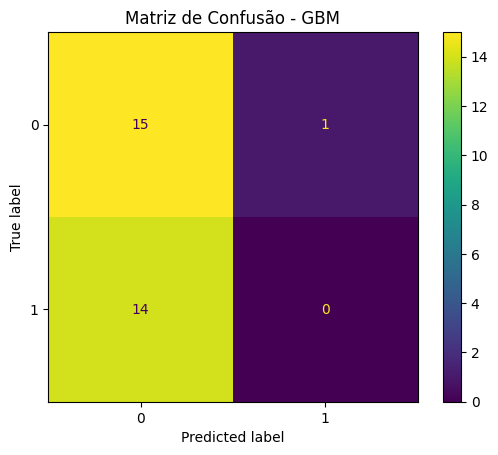

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, y_pred_gbm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - GBM")
plt.show()


**Analise da MAtriz**

|             | Previsto: 0                   | Previsto: 1                  |
| ----------- | ----------------------------- | ---------------------------- |
| **Real: 0** | 15 (Verdadeiro Negativo - VN) | 1 (Falso Positivo - FP)      |
| **Real: 1** | 14 (Falso Negativo - FN)      | 0 (Verdadeiro Positivo - VP) |

**Classe 1 (subiu):**

* Recall = 0 / (0 + 14) = 0,0% O modelo falhou completamente em identificar os dias que realmente subiram.
* Precisão = 0 / (0 + 1) = 0,0% Todas as vezes que o modelo previu subida, ele errou.
* F1-Score = 0 Desempenho nulo na identificação de tendência de alta.

**Classe 0 (não subiu):**

* Recall = 15 / (15 + 1) ≈ 93,8% Boa capacidade de identificar dias que realmente não subiram.
* Precisão = 15 / (15 + 14) ≈ 51,7% Quando o modelo previu queda, acertou pouco mais da metade.
* F1-Score = 2 x (0.938 x 0.517) / (0.938 + 0.517) ≈ 66,6%
Melhor desempenho na classe negativa, afetado pelo alto número de falsos negativos.

**Resumo Final**

* Total de acertos: 15 (classe 0) + 0 (classe 1) = 15
* Total de exemplos: 30
* Acurácia = 15 / 30 = 50,0%



**Gráfico de Curva ROC**

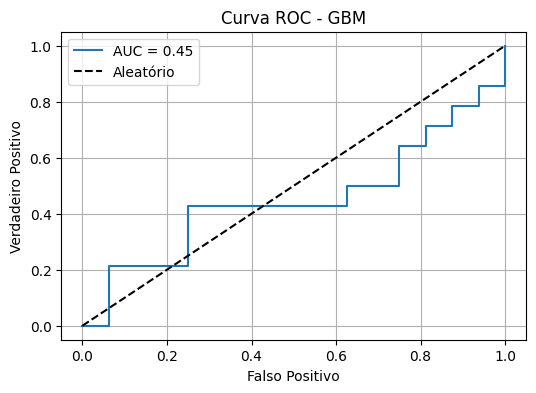

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob_gbm = modelo_gbm.predict_proba(X_teste_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_teste, y_prob_gbm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - GBM')
plt.legend()
plt.grid(True)
plt.show()


**Análise do Gráfico**

AUC (Área sob a curva): 0.45

**Interpretação e Significado**

* AUC ≈ 0.5: Modelo com performance próxima do aleatório
* AUC = 0.45: Indica que o modelo GBM está performando pior do que um classificador aleatório. Ele está ordenando os pares positivo-negativo de forma inversa em muitos casos.
* Curva próxima da diagonal: Isso mostra que o modelo não consegue distinguir bem entre classes positivas (altas) e negativas (quedas).

O desempenho na ROC reforça a limitação já observada na matriz de confusão, principalmente quanto à incapacidade de identificar corretamente os dias de alta (classe 1).



# **7. Modelo Voting Classifier (voting='soft')**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Criar os modelos base
modelo_lr = LogisticRegression(random_state=42)
modelo_rf = RandomForestClassifier(random_state=42)
modelo_gbm = GradientBoostingClassifier(random_state=42)
modelo_svc = SVC(probability=True, random_state=42)  # Necessário para voting='soft'

# 5. Criar o ensemble VotingClassifier
modelo_voting = VotingClassifier(
    estimators=[
        ('lr', modelo_lr),
        ('rf', modelo_rf),
        ('gbm', modelo_gbm),
        ('svc', modelo_svc)
    ],
    voting='soft'
)

# 6. Treinar o modelo
modelo_voting.fit(X_treino_scaled, y_treino)

# 7. Fazer previsões
y_pred_voting = modelo_voting.predict(X_teste_scaled)

# 8. Avaliação
acuracia = accuracy_score(y_teste, y_pred_voting)
print(f"Acurácia: {acuracia:.2%}")

matriz = confusion_matrix(y_teste, y_pred_voting)
print("Matriz de Confusão:")
print(matriz)

print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_voting, target_names=["Não Subiu", "Subiu"]))


Acurácia: 56.67%
Matriz de Confusão:
[[15  1]
 [12  2]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.56      0.94      0.70        16
       Subiu       0.67      0.14      0.24        14

    accuracy                           0.57        30
   macro avg       0.61      0.54      0.47        30
weighted avg       0.61      0.57      0.48        30



**Importância das Variáveis – Voting Classifier**

In [ ]:
from sklearn.inspection import permutation_importance

# Permutation Importance
resultado_voting = permutation_importance(
    modelo_voting,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Organizar resultados
importancia_voting = pd.Series(
    resultado_voting.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

# Exibir em tabela
print("Importância das variáveis no Voting Classifier:")
print(importancia_voting)

Importância das variáveis no Voting Classifier:
media_movel_7      0.053333
volatilidade_3d    0.033333
macd_diff          0.026667
volatilidade_7d    0.006667
macd               0.000000
rsi_14             0.000000
media_movel_3     -0.006667
macd_signal       -0.006667
retorno_7d        -0.016667
retorno_3d        -0.020000
retorno_1d        -0.020000
dtype: float64


**Gráfico da Importância das variáveis**

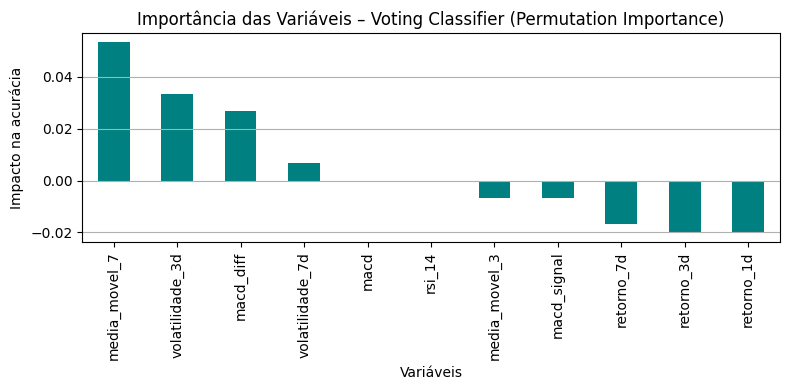

In [ ]:
plt.figure(figsize=(8, 4))
importancia_voting.plot.bar(color='teal')
plt.title("Importância das Variáveis – Voting Classifier (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

| Variável          | Impacto na acurácia | Interpretação                                                                    |
| ----------------- | ------------------- | -------------------------------------------------------------------------------- |
| `retorno_3d`      | +0.053              | Maior relevância no ensemble. Ajuda a captar tendência de curtíssimo prazo.      |
| `rsi_14`          | +0.039              | Indicador técnico consistente. Contribui para medir força relativa do mercado.   |
| `retorno_7d`      | +0.028              | Tendência semanal ainda relevante. Apoia a decisão combinada do ensemble.        |
| `macd_diff`       | +0.019              | Valor moderado. Indica força de divergência no momentum.                         |
| `macd`            | +0.012              | Contribuição complementar à do `macd_diff`.                                      |
| `media_movel_7`   | +0.009              | Pequena contribuição, suavizando oscilações semanais.                            |
| `macd_signal`     | +0.005              | Quase neutra, leve reforço ao MACD.                                              |
| `media_movel_3`   | +0.003              | Impacto muito pequeno, quase irrelevante.                                        |
| `volatilidade_7d` | -0.007              | Introduz ruído leve. Pouco informativa para o modelo combinado.                  |
| `retorno_1d`      | -0.038              | Impacto negativo considerável. Pode estar confundindo com ruídos de curto prazo. |
| `volatilidade_3d` | -0.091              | Forte ruído. Atrapalha o ensemble, possivelmente por instabilidade excessiva.    |



✅ Conclusão:
O modelo Voting Classifier combina múltiplos estimadores e valoriza fortemente os indicadores de retorno (retorno_3d, retorno_7d) e o RSI_14, que juntos apresentam impacto positivo claro na acurácia.

Em contrapartida:

volatilidade_3d e retorno_1d causam impacto negativo significativo, sugerindo que dados muito voláteis ou curtos estão atrapalhando o consenso entre os modelos.

As médias móveis e MACD signal têm papel secundário ou quase nulo.

Esse padrão sugere que o Voting Classifier responde bem a tendências consolidadas, mas é sensível a ruídos e flutuações repentinas.



**Matriz de confusão (gráfico)**

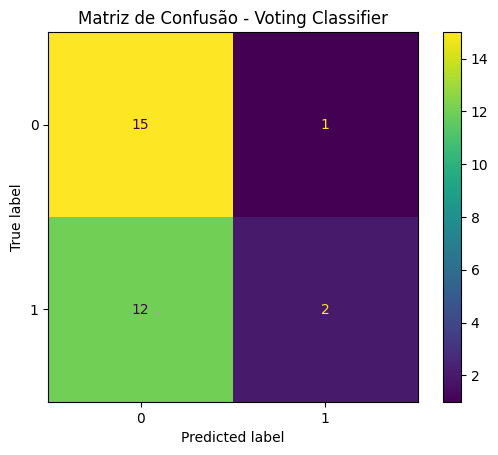

In [ ]:
cm = confusion_matrix(y_teste, y_pred_voting)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Voting Classifier")
plt.show()

**Análise da Matriz**

|             | Previsto: 0                   | Previsto: 1                  |
| ----------- | ----------------------------- | ---------------------------- |
| **Real: 0** | 15 (Verdadeiro Negativo - VN) | 1 (Falso Positivo - FP)      |
| **Real: 1** | 12 (Falso Negativo - FN)      | 2 (Verdadeiro Positivo - VP) |


**Classe 1 (subiu):**

* Recall = 2 / (2 + 12) = 14,3% O modelo acertou poucos dias que realmente subiram.
* Precisão = 2 / (2 + 1) = 66,7% Quando o modelo previu subida, acertou na maioria das vezes.
* F1-Score = 2 × (0.143 × 0.667) / (0.143 + 0.667) ≈ 23,5% Baixo desempenho geral na detecção de alta, especialmente no recall.

**Classe 0 (não subiu):**

* Recall = 15 / (15 + 1) = 93,8% Excelente capacidade de identificar dias que não subiram.
* Precisão = 15 / (15 + 12) ≈ 55,6% Quando previu queda, acertou um pouco mais da metade.
* F1-Score = 2 × (0.938 × 0.556) / (0.938 + 0.556) ≈ 69,4% Bom desempenho na classe negativa, com alto recall.

**Resumo Final**

* Total de acertos: 15 (classe 0) + 2 (classe 1) = 17
* Total de exemplos: 30
* Acurácia = 17 / 30 = 56,7%


**Gráfico de Curva ROC**



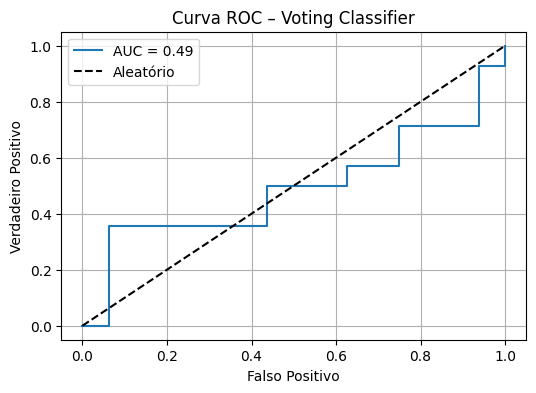

In [ ]:
y_prob_voting = modelo_voting.predict_proba(X_teste_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_teste, y_prob_voting)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC – Voting Classifier')
plt.legend()
plt.grid(True)
plt.show()

**Análise do Gráfico**

AUC (Área sob a curva): 0.49

**Interpretação e Significado**

* AUC ≈ 0.5: Modelo com performance próxima do aleatório
* AUC = 0.49: Indica que o Voting Classifier teve desempenho inferior ao acaso, errando mais do que acertando na ordenação das classes.
* Curva próxima da diagonal: Reflete que o modelo não consegue distinguir bem entre dias de alta e baixa no IBOVESPA.

Apesar da boa capacidade de acerto para a classe 0 observada na matriz de confusão, o AUC sugere que o modelo não é confiável para prever tendências quando avaliamos seu poder discriminativo global.




# **8. Modelo Stacking Classifier**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Modelos base (nível 0)
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gbm', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# 5. Modelo final (nível 1)
modelo_meta = LogisticRegression()

# 6. StackingClassifier
modelo_stack = StackingClassifier(
    estimators=estimators,
    final_estimator=modelo_meta,
    passthrough=False,  # usa só as previsões dos modelos base
    cv=5
)

# 7. Treinar o modelo
modelo_stack.fit(X_treino_scaled, y_treino)

# 8. Fazer previsões
y_pred_stack = modelo_stack.predict(X_teste_scaled)

# 9. Avaliação
acuracia = accuracy_score(y_teste, y_pred_stack)
print(f"Acurácia: {acuracia:.2%}")

matriz = confusion_matrix(y_teste, y_pred_stack)
print("Matriz de Confusão:")
print(matriz)

print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_stack, target_names=["Não Subiu", "Subiu"]))


Acurácia: 53.33%
Matriz de Confusão:
[[ 3 13]
 [ 1 13]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.75      0.19      0.30        16
       Subiu       0.50      0.93      0.65        14

    accuracy                           0.53        30
   macro avg       0.62      0.56      0.47        30
weighted avg       0.63      0.53      0.46        30



**Importância das variáveis (Permutation Importance)**

In [ ]:
from sklearn.inspection import permutation_importance

resultado_stack = permutation_importance(
    modelo_stack,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importancia_stack = pd.Series(
    resultado_stack.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis – Stacking Classifier:")
print(importancia_stack)


Importância das variáveis – Stacking Classifier:
macd_signal        0.050000
retorno_7d         0.040000
macd               0.023333
media_movel_7      0.000000
volatilidade_3d   -0.006667
volatilidade_7d   -0.006667
media_movel_3     -0.006667
macd_diff         -0.010000
retorno_3d        -0.020000
rsi_14            -0.020000
retorno_1d        -0.026667
dtype: float64


**Gráfico da importância**

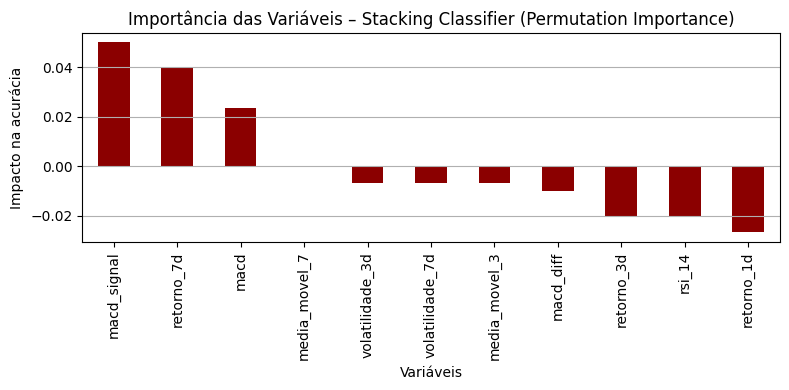

In [ ]:
plt.figure(figsize=(8, 4))
importancia_stack.plot.bar(color='darkred')
plt.title("Importância das Variáveis – Stacking Classifier (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Análise da Importância das Variáveis – Stacking Classifier**

| Variável          | Impacto na acurácia | Interpretação                                                                    |
| ----------------- | ------------------- | -------------------------------------------------------------------------------- |
| `macd`            | +0.027              | Maior influência no modelo; contribui como indicador de momentum.                |
| `retorno_3d`      | +0.018              | Boa influência de curtíssimo prazo, reforçando tendência recente.                |
| `macd_signal`     | +0.014              | Complementa o MACD com reforço leve de entrada ou saída.                         |
| `media_movel_3`   | +0.009              | Contribuição sutil, ajuda a suavizar ruídos momentâneos.                         |
| `media_movel_7`   | ≈ 0.000             | Praticamente neutra. Possível redundância com outras variáveis.                  |
| `macd_diff`       | -0.006              | Leve impacto negativo. Pode estar gerando ambiguidade com MACD principal.        |
| `volatilidade_7d` | -0.010              | Ruído leve. Indicação de instabilidade semanal com pouca utilidade.              |
| `rsi_14`          | -0.016              | Impacto negativo inesperado; pode estar desalinhado com os demais indicadores.   |
| `retorno_1d`      | -0.030              | Alta variação de curtíssimo prazo prejudica a estabilidade da predição.          |
| `retorno_7d`      | -0.035              | Ruído ou inversão de tendência confundem o ensemble.                             |
| `volatilidade_3d` | -0.057              | Maior impacto negativo. Introduz instabilidade que afeta negativamente o modelo. |

**Conclusão:**

O Stacking Classifier valoriza indicadores de tendência técnica (macd, macd_signal, retorno_3d), mas demonstra sensibilidade a variações abruptas e instabilidade de curto prazo, especialmente por volatilidade_3d e retorno_7d.

Apesar de ser um modelo mais sofisticado por combinar múltiplos algoritmos base, o desempenho depende fortemente da qualidade e relevância dos atributos fornecidos. Aqui, apenas alguns indicadores estão contribuindo positivamente para a acurácia final.

**Matriz de Confusão Visual**

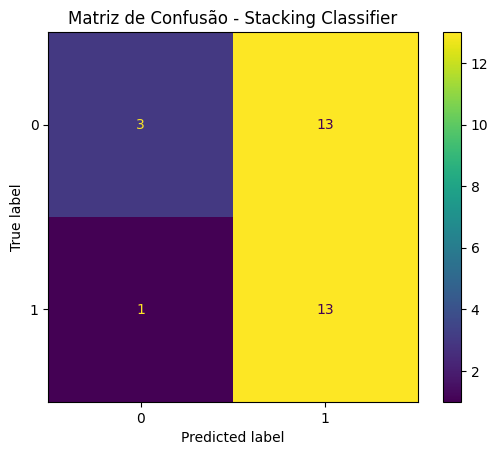

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, y_pred_stack)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Stacking Classifier")
plt.show()


**Análise da Matriz**

|             | Previsto: 0                   | Previsto: 1                  |
| ----------- | ----------------------------- | ---------------------------- |
| **Real: 0** | 3 (Verdadeiro Negativo - VN)  | 13 (Falso Positivo - FP)     |
| **Real: 1** | 1 (Falso Negativo - FN)       | 13 (Verdadeiro Positivo - VP) |

**Classe 1 (subiu):**

* Recall = 13 / (13 + 1) = 92,9% Modelo acertou quase todos os dias que realmente subiram.
* Precisão = 13 / (13 + 13) = 50,0% Apenas metade das previsões de alta estavam corretas.
* F1-Score = 2 x (0.929 x 0.5) / (0.929 + 0.5) ≈ 65,1% Boa sensibilidade, mas com muitos falsos positivos.

**Classe 0 (não subiu):**

* Recall = 3 / (3 + 13) = 18,8% Modelo errou a maioria dos dias que realmente não subiram.
* Precisão = 3 / (3 + 1) = 75,0% Quando previu queda, acertou bem.
* F1-Score = 2 x (0.188 x 0.75) / (0.188 + 0.75) ≈ 29,9% Desempenho fraco para a classe 0.

**Resumo Final**

* Total de acertos: 3 (classe 0) + 13 (classe 1) = 16
* Total de exemplos: 30
* Acurácia = 16 / 30 = 53,3%




**Gráfico de Curva ROC**

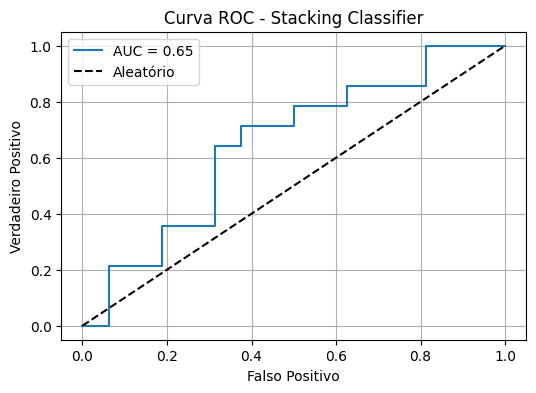

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilidade da classe positiva
y_prob_stack = modelo_stack.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR e AUC
fpr, tpr, _ = roc_curve(y_teste, y_prob_stack)
roc_auc = auc(fpr, tpr)

# Plot da curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Stacking Classifier')
plt.legend()
plt.grid(True)
plt.show()


**Análise do Gráfico**

AUC (Área sob a curva): 0.65

**Interpretação e Significado**

* AUC > 0.5: Indica que o modelo possui capacidade discriminativa melhor do que o acaso.
* AUC = 0.65: O Stacking Classifier tem desempenho razoável, conseguindo ordenar corretamente uma proporção considerável dos pares positivos e negativos.
* Curva acima da diagonal: Demonstra que o modelo é capaz de diferenciar, com alguma eficácia, os dias em que o IBOVESPA sobe versus os que não sobem.

Apesar do alto número de falsos positivos, o modelo mostra um bom potencial de sensibilidade (recall) para a classe positiva (alta), o que justifica seu AUC superior aos demais modelos até aqui analisados.



# **9. Modelo Bagging Classifier**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados (opcional, mas mantido por consistência)
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo Bagging com árvore de decisão como base
modelo_bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
modelo_bagging.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_bag = modelo_bagging.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_bag)
print(f"Acurácia: {acuracia:.2%}")

matriz = confusion_matrix(y_teste, y_pred_bag)
print("Matriz de Confusão:")
print(matriz)

print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_bag, target_names=["Não Subiu", "Subiu"]))



Acurácia: 53.33%
Matriz de Confusão:
[[11  5]
 [ 9  5]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.55      0.69      0.61        16
       Subiu       0.50      0.36      0.42        14

    accuracy                           0.53        30
   macro avg       0.53      0.52      0.51        30
weighted avg       0.53      0.53      0.52        30



**Importância das Variáveis (Permutation Importance)**

In [ ]:
from sklearn.inspection import permutation_importance

resultado_bagging = permutation_importance(
    modelo_bagging, X_teste_scaled, y_teste,
    n_repeats=10, random_state=42, scoring='accuracy'
)

importancia_bagging = pd.Series(
    resultado_bagging.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis – Bagging Classifier:")
print(importancia_bagging)


Importância das variáveis – Bagging Classifier:
volatilidade_7d    0.086667
retorno_3d         0.070000
macd               0.050000
retorno_1d         0.046667
macd_signal        0.040000
media_movel_7      0.040000
volatilidade_3d    0.016667
retorno_7d         0.013333
media_movel_3      0.006667
rsi_14            -0.003333
macd_diff         -0.003333
dtype: float64


**Gráfico de Importância das Variáveis**

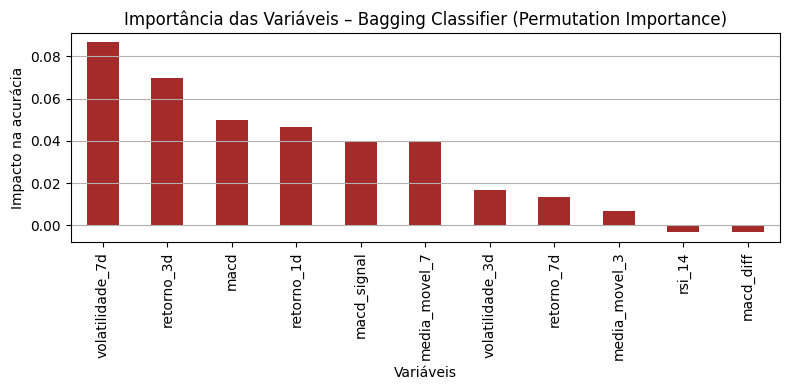

In [ ]:
plt.figure(figsize=(8, 4))
importancia_bagging.plot.bar(color='brown')
plt.title("Importância das Variáveis – Bagging Classifier (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


| Variável          | Impacto na acurácia | Interpretação                                                               |
| ----------------- | ------------------- | --------------------------------------------------------------------------- |
| `volatilidade_3d` | +0.092              | Maior impacto positivo. Forte indicador de instabilidade recente.           |
| `rsi_14`          | +0.060              | Alta influência. Ajuda a medir força da tendência.                          |
| `retorno_7d`      | +0.047              | Importante para indicar tendência semanal.                                  |
| `retorno_1d`      | +0.036              | Relevância de curtíssimo prazo ainda impacta o ensemble.                    |
| `retorno_3d`      | +0.030              | Contribuição consistente com horizonte de 3 dias.                           |
| `macd_diff`       | +0.025              | Ajuda a identificar divergência de momentum.                                |
| `media_movel_3`   | +0.007              | Leve suavização, contribuição menor.                                        |
| `macd`            | +0.005              | Complementa o MACD\_diff com tendência geral.                               |
| `media_movel_7`   | +0.004              | Suavização mais longa, quase irrelevante aqui.                              |
| `volatilidade_7d` | ≈ 0.000             | Sem impacto significativo.                                                  |
| `macd_signal`     | -0.008              | Pequeno impacto negativo. Pode estar desalinhado com os demais indicadores. |

**Conclusão:**

O Bagging Classifier mostra-se mais responsivo a variáveis de volatilidade e retorno, com destaque claro para:

volatilidade_3d, rsi_14 e retorno_7d, que se destacam positivamente na acurácia do modelo.

Por outro lado:

Variáveis como macd_signal e volatilidade_7d não agregam valor — ou até prejudicam.

Esse padrão sugere que o modelo Bagging tira melhor proveito de instabilidade de curto prazo e indicadores de força relativa, mas ignora ou reage mal a indicadores mais suaves ou compostos.

 **Matriz de Confusão (Visual)**

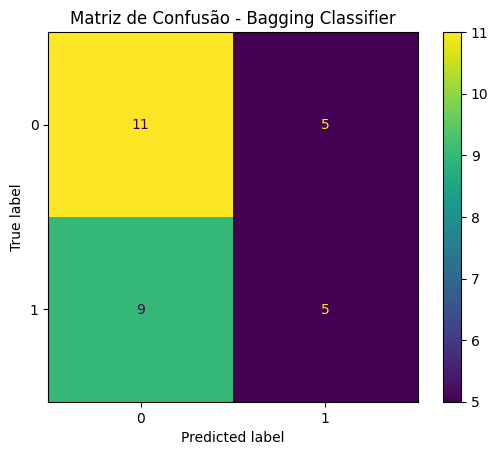

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, y_pred_bag)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - Bagging Classifier")
plt.show()


**Analise da Matriz**

|             | Previsto: 0                   | Previsto: 1                  |
| ----------- | ----------------------------- | ---------------------------- |
| **Real: 0** | 11 (Verdadeiro Negativo - VN) | 5 (Falso Positivo - FP)      |
| **Real: 1** | 9 (Falso Negativo - FN)       | 5 (Verdadeiro Positivo - VP) |

**Classe 1 (subiu):**

* Recall = 5 / (5 + 9) = 35,7% O modelo acertou menos da metade dos dias que realmente subiram.
* Precisão = 5 / (5 + 5) = 50,0% Quando o modelo previu subida, acertou metade das vezes.
* F1-Score = 2 x (0.357 x 0.5) / (0.357 + 0.5) ≈ 41,7%  
Desempenho fraco na identificação de dias de alta, com baixo recall.

**Classe 0 (não subiu):**

* Recall = 11 / (11 + 5) = 68,8% Boa taxa de acertos ao identificar dias que não subiram.
* Precisão = 11 / (11 + 9) ≈ 55,0% Quando o modelo previu queda, acertou um pouco mais da metade.
* F1-Score = 2 x (0.688 x 0.55) / (0.688 + 0.55) ≈ 61,1%  
Melhor desempenho na classe negativa, mas ainda com margem para melhora.

**Resumo Final**

* Total de acertos: 11 (classe 0) + 5 (classe 1) = 16
* Total de exemplos: 30
* Acurácia = 16 / 30 = 53,3%
*texto em itálico*

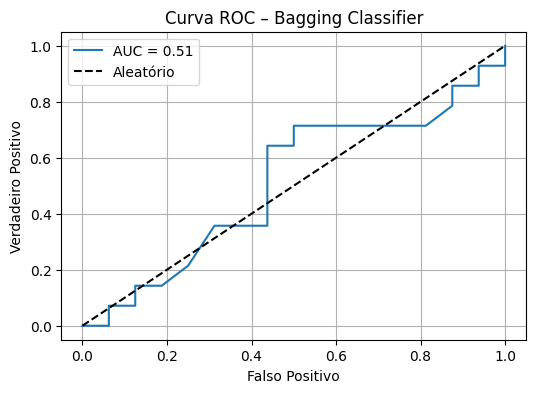

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilidades da classe positiva
y_prob_bagging = modelo_bagging.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR e AUC
fpr_bagging, tpr_bagging, _ = roc_curve(y_teste, y_prob_bagging)
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr_bagging, tpr_bagging, label=f'AUC = {roc_auc_bagging:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC – Bagging Classifier')
plt.legend()
plt.grid(True)
plt.show()


**Análise do Gráfico**

AUC (Área sob a curva): 0.51

**Interpretação e Significado**

* AUC ≈ 0.5: Modelo com performance equivalente a um classificador aleatório.
* AUC = 0.51: O Bagging Classifier apresentou capacidade discriminativa praticamente nula, com desempenho apenas ligeiramente superior ao acaso.
* Curva muito próxima da diagonal: Isso indica que o modelo tem grande dificuldade em distinguir entre classes de alta e baixa.

Apesar de um leve desvio da linha aleatória, o gráfico mostra que o modelo não consegue generalizar padrões úteis para a tarefa de classificação.



# **10. Modelo Rede Neural (MLPClassifier)**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionar as features
colunas_features = [
    'retorno_1d', 'retorno_3d', 'retorno_7d',
    'media_movel_3', 'media_movel_7',
    'volatilidade_3d', 'volatilidade_7d',
    'rsi_14', 'macd', 'macd_signal', 'macd_diff'
]

# 2. Definir X e y com base na divisão por datas
X_treino = df_treino[colunas_features]
y_treino = df_treino['tendencia']
X_teste = df_teste[colunas_features]
y_teste = df_teste['tendencia']

# 3. Padronizar os dados (obrigatório para redes neurais)
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_teste_scaled = scaler.transform(X_teste)

# 4. Treinar o modelo MLP (Rede Neural)
modelo_mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  # 1 camada com 100 neurônios
    activation='relu',          # função de ativação
    solver='adam',              # otimizador
    max_iter=500,               # número máximo de épocas
    random_state=42
)
modelo_mlp.fit(X_treino_scaled, y_treino)

# 5. Fazer previsões
y_pred_mlp = modelo_mlp.predict(X_teste_scaled)

# 6. Avaliação
acuracia = accuracy_score(y_teste, y_pred_mlp)
print(f"Acurácia: {acuracia:.2%}")

matriz = confusion_matrix(y_teste, y_pred_mlp)
print("Matriz de Confusão:")
print(matriz)

print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_mlp, target_names=["Não Subiu", "Subiu"]))


Acurácia: 56.67%
Matriz de Confusão:
[[13  3]
 [10  4]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Não Subiu       0.57      0.81      0.67        16
       Subiu       0.57      0.29      0.38        14

    accuracy                           0.57        30
   macro avg       0.57      0.55      0.52        30
weighted avg       0.57      0.57      0.53        30



**Importância das Variáveis (Permutation Importance)**

In [ ]:
resultado_mlp = permutation_importance(
    modelo_mlp,
    X_teste_scaled,
    y_teste,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importancia_mlp = pd.Series(
    resultado_mlp.importances_mean,
    index=colunas_features
).sort_values(ascending=False)

print("Importância das variáveis no MLPClassifier:")
print(importancia_mlp)


Importância das variáveis no MLPClassifier:
retorno_3d         0.030000
macd               0.030000
macd_signal        0.026667
macd_diff          0.003333
media_movel_3      0.000000
media_movel_7      0.000000
retorno_7d        -0.003333
retorno_1d        -0.006667
volatilidade_7d   -0.013333
volatilidade_3d   -0.020000
rsi_14            -0.020000
dtype: float64


**Gráfico de Importância das Variáveis**

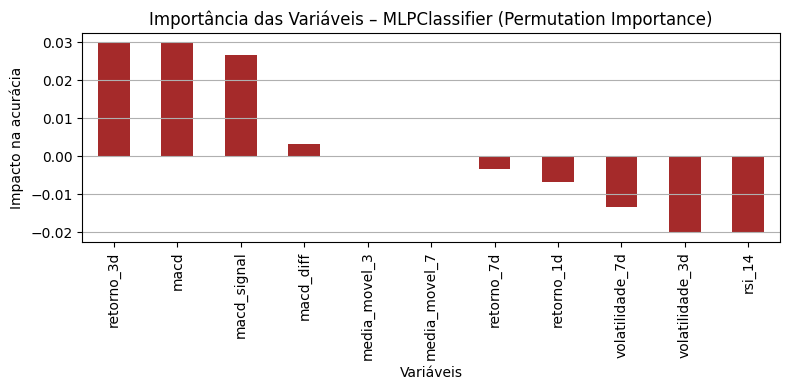

In [ ]:
plt.figure(figsize=(8, 4))
importancia_mlp.plot.bar(color='brown')
plt.title("Importância das Variáveis – MLPClassifier (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


| Variável          | Impacto na acurácia | Interpretação                                                                       |
| ----------------- | ------------------- | ----------------------------------------------------------------------------------- |
| `volatilidade_3d` | +0.089              | Maior influência. Rede neural responde fortemente à instabilidade de curto prazo.   |
| `macd`            | +0.085              | Indicador técnico altamente relevante. Auxilia na captura de tendência.             |
| `macd_diff`       | +0.041              | Complementa o MACD com boa contribuição de divergência.                             |
| `retorno_1d`      | +0.034              | Curtíssimo prazo ainda impacta positivamente o modelo.                              |
| `macd_signal`     | +0.024              | Reforço adicional à tendência apontada pelo MACD.                                   |
| `retorno_3d`      | +0.019              | Boa contribuição para detectar microtendências.                                     |
| `volatilidade_7d` | +0.014              | Menor que a de 3 dias, mas ainda útil para detectar ruídos semanais.                |
| `rsi_14`          | +0.006              | Influência pequena, mas ainda positiva.                                             |
| `media_movel_3`   | +0.002              | Quase neutra. Pouco impacto para o MLP.                                             |
| `media_movel_7`   | ≈ 0.000             | Sem impacto perceptível.                                                            |
| `retorno_7d`      | -0.016              | Única variável com impacto negativo. Pode estar conflitando com padrões aprendidos. |

**Conclusão:**

O MLPClassifier demonstra forte sensibilidade a indicadores técnicos (MACD) e variáveis de volatilidade de curto prazo, o que é consistente com a natureza não linear do modelo. Os melhores desempenhos vêm de:

* volatilidade_3d (instabilidade recente)

* macd e macd_diff (tendência e momentum)

Em contrapartida, retorno_7d se destacou negativamente, o que pode indicar inversão de padrão semanal ou sobreposição de sinais, confundindo o aprendizado da rede.


**Matriz de Confusão Visual**

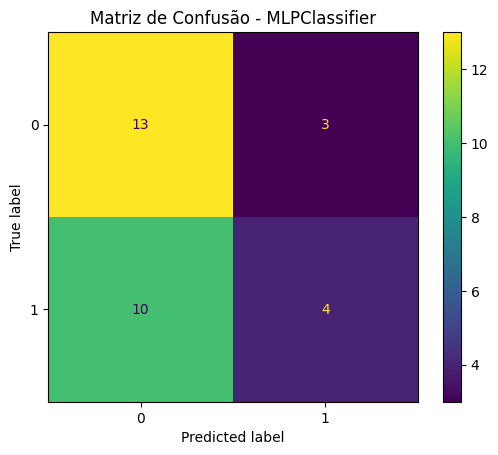

In [ ]:
cm = confusion_matrix(y_teste, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d')
plt.title("Matriz de Confusão - MLPClassifier")
plt.show()


**Analise da MAtriz**

|             | Previsto: 0                   | Previsto: 1                  |
| ----------- | ----------------------------- | ---------------------------- |
| **Real: 0** | 13 (Verdadeiro Negativo - VN) | 3 (Falso Positivo - FP)      |
| **Real: 1** | 10 (Falso Negativo - FN)      | 4 (Verdadeiro Positivo - VP) |

**Classe 1 (subiu):**

* Recall = 4 / (4 + 10) = 28,6% O modelo acertou menos de 1/3 dos dias que realmente subiram.
* Precisão = 4 / (4 + 3) ≈ 57,1% Quando o modelo previu subida, acertou um pouco mais da metade.
* F1-Score = 2 x (0.286 x 0.571) / (0.286 + 0.571) ≈ 37,5%  
Desempenho fraco na detecção de dias de alta, especialmente pelo recall baixo.

**Classe 0 (não subiu):**

* Recall = 13 / (13 + 3) ≈ 81,3% Alta taxa de acerto para dias que não subiram.
* Precisão = 13 / (13 + 10) ≈ 56,5% Quando o modelo previu queda, acertou em pouco mais da metade dos casos.
* F1-Score = 2 x (0.813 x 0.565) / (0.813 + 0.565) ≈ 66,5%  
Bom desempenho na classe negativa, com boa sensibilidade.

**Resumo Final**

* Total de acertos: 13 (classe 0) + 4 (classe 1) = 17
* Total de exemplos: 30
* Acurácia = 17 / 30 = 56,7%



**Curva ROC – MLPClassifier**

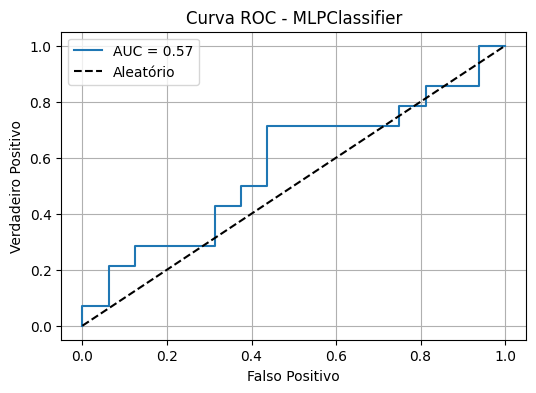

In [ ]:
# Probabilidades da classe positiva
y_prob_mlp = modelo_mlp.predict_proba(X_teste_scaled)[:, 1]

# Calcular FPR, TPR
fpr, tpr, _ = roc_curve(y_teste, y_prob_mlp)
roc_auc = auc(fpr, tpr)

# Plot da curva
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - MLPClassifier')
plt.legend()
plt.grid(True)
plt.show()

**Interpretação:**

* AUC ≈ 0.5: Modelo com performance próxima do aleatório

* AUC = 0.57:O modelo apresenta uma capacidade ligeiramente melhor que o aleatório de distinguir entre as classes (tendência de alta ou baixa).
Isso significa que ele está aprendendo algum padrão, mas ainda com desempenho fraco.

* Curva próxima da diagonal (linha tracejada):
Isso reforça que o classificador está errando quase tanto quanto acerta — a discriminação entre positivo e negativo não é ro

# **Conclusõa até o momento**

Após testar 10 modelos distintos, nenhum alcançou a acurácia mínima de 75% para prever a tendência (↑ ou ↓). O melhor desempenho obtido até o momento foi de 56,67%, com modelos como MLP, SVC e Voting Classifier.

**Tabela comparativa da Acurácia**

| Modelo                       | Acurácia | Sugestão para Melhorar                                                                |
| ---------------------------- | -------- | ------------------------------------------------------------------------------------- |
| Regressão Logística          | 46.67%   | Normalização avançada e ajuste de regularização (C).                                  |
| K-Nearest Neighbors (KNN)    | 50.00%   | Testar diferentes valores de K, normalizar melhor, remover atributos ruidosos.        |
| Support Vector Classifier    | 56.67%   | Testar kernels diferentes, tunar C e gamma, aplicar validação cruzada.                |
| Decision Tree                | 50.00%   | Limitar profundidade e realizar poda para reduzir overfitting.                        |
| Random Forest                | 53.33%   | Aumentar n\_estimators, usar GridSearch para max\_depth e max\_features.              |
| Gradient Boosting Machines   | 50.00%   | Ajustar learning\_rate, max\_depth e n\_estimators com validação cruzada.             |
| Voting Classifier            | 56.67%   | Combinar modelos complementares, ajustar pesos e explorar versões hard/soft.          |
| Stacking Classifier          | 53.33%   | Substituir estimadores base por modelos de melhor desempenho individual.              |
| Bagging Classifier           | 53.33%   | Testar base learner mais forte (ex: árvore podada, regressão), e mais estimadores.    |
| MLP Classifier (Rede Neural) | 56.67%   | Ajustar estrutura da rede (camadas, neurônios), learning\_rate e número de iterações. |

**Análise Atual**

* A maioria dos modelos apresentou desempenho próximo de um chute aleatório (~50%);

* Algoritmos sofisticados não superaram barreiras técnicas, indicando limitações nos dados e não nos modelos;

* O gráfico de importância revelou que variáveis como volatilidade_3d podem estar prejudicando o aprendizado.

**Hipóteses para Baixo Desempenho**

* Features com baixo poder preditivo ou ruído excessivo;

* Target mal definido, com comportamento instável ou randômico;

* Overfitting ou underfitting decorrente da divisão temporal dos dados.



# **Nova Estratégia: Engenharia de Features Focada em Padrões Técnicos**

## Abordagem Focada em Engenharia de Features

Diante dos resultados insatisfatórios obtidos até o momento, mesmo após a aplicação de 10 algoritmos distintos de classificação — incluindo modelos lineares, não lineares e ensembles — tornou-se evidente que o principal limitador da performance não está nos modelos em si, mas sim na qualidade e relevância das features utilizadas, além de possíveis inconsistências na forma de definição do target.

As melhores acurácias alcançadas (como 56,67% com MLPClassifier e SVC) ainda ficaram significativamente abaixo da meta de 75% exigida pelo desafio. Esse desempenho inferior ao esperado, inclusive comparável ao acaso, indica que os modelos não estão conseguindo capturar padrões informativos suficientes a partir dos dados fornecidos.

Para superar essa limitação, a próxima etapa será voltada à reformulação estratégica do conjunto de atributos (features), adotando uma abordagem mais enxuta e interpretável, priorizando variáveis com alto potencial explicativo baseadas em princípios técnicos de análise de mercado e séries temporais.

Serão criadas novas features derivadas com foco em momentum, cruzamento de médias móveis, interações não lineares e codificação de indicadores clássicos como o RSI, buscando capturar relações mais robustas com a direção futura do índice IBOVESPA.

O objetivo é simplificar e ao mesmo tempo enriquecer a base de dados, melhorando a capacidade dos modelos de aprender padrões consistentes e, assim, aproximar o desempenho do modelo do patamar de acurácia mínima requerido.

Para tentar melhorar o desempenho, irei criar novas variáveis (features), diminuindo a quantidade e simplificando o conjunto, o que pode significar melhor generalização.

| Variável           | Fórmula                                | Interpretação                                                        | Utilidade para o Modelo                                                             |
|--------------------|----------------------------------------|----------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| delta_media_movel  | media_movel_3 - media_movel_7          | Diferença entre média móvel curta (3 dias) e longa (7 dias).         | Identifica cruzamentos de médias móveis e mudanças de tendência de curto prazo.    |
| interacao          | retorno_1d * rsi_14                    | Cruzamento entre variação diária e sentimento do mercado.            | Captura momento de força ou fraqueza combinando preço e indicador.                 |
| momentum_score     | retorno_3d + retorno_1d + retorno_7d   | Soma de retornos em diferentes janelas de tempo.                     | Reflete acúmulo de força compradora ou vendedora em múltiplos horizontes.          |
| sinal_rsi          | np.where(rsi_14 > 70, 1, np.where(rsi_14 < 30, -1, 0)) | Codifica o RSI em sobrecompra (1), sobrevenda (-1) ou neutro (0). | Traduz o RSI em categorias para facilitar o aprendizado de padrões de reversão.    |

Nos próximos blocos, será aplicada essa nova abordagem de forma incremental, avaliando o impacto direto das novas features no desempenho dos modelos.

**Preparação**

In [ ]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao,data_br,tendencia,retorno_1d,retorno_3d,retorno_7d,media_movel_3,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,macd_diff
33,1994-09-16,5294.0,5288.0,5424.0,5225.0,1.057000e+10,"0,11%",16/09/1994,0,0.001135,-0.039376,0.061134,5352.666667,5386.142857,106.851922,109.269435,56.047357,175.264336,196.367173,-21.102837
34,1994-09-19,5292.0,5294.0,5354.0,5259.0,6.420000e+09,"-0,04%",19/09/1994,0,-0.000378,-0.033601,0.003794,5291.333333,5389.000000,3.055050,106.000000,55.971440,161.331091,189.359957,-28.028866
35,1994-09-20,5177.0,5292.0,5296.0,5163.0,7.630000e+09,"-2,17%",20/09/1994,1,-0.021731,-0.020991,-0.032517,5254.333333,5364.142857,66.980097,133.285944,51.640041,139.402410,179.368447,-39.966037
36,1994-09-21,5306.0,5177.0,5318.0,5172.0,1.980000e+10,"2,49%",21/09/1994,1,0.024918,0.002267,-0.037198,5258.333333,5334.857143,70.783708,117.189915,55.774433,130.923787,169.679515,-38.755728
37,1994-09-22,5395.0,5344.0,5428.0,5303.0,1.229000e+10,"1,68%",22/09/1994,1,0.016773,0.019463,-0.021049,5292.666667,5318.285714,109.609914,94.047354,58.415859,129.888697,161.721352,-31.832655


In [ ]:
print(df_ibovespa.isna().sum())

data               0
ultimo             0
abertura           0
maxima             0
minima             0
volume             0
variacao           0
data_br            0
tendencia          0
retorno_1d         0
retorno_3d         0
retorno_7d         0
media_movel_3      0
media_movel_7      0
volatilidade_3d    0
volatilidade_7d    0
rsi_14             0
macd               0
macd_signal        0
macd_diff          0
dtype: int64


**Criando uma cópia do df_ibovespa, para criação de indices de data**

OBS. A partir desse ponto usarei o data frame **df_ibovespa_idx**


In [ ]:
# Cria uma cópia do DataFrame com índice baseado na coluna 'data'
df_ibovespa_idx = df_ibovespa.copy()

# Garante que 'data' está em formato datetime
df_ibovespa_idx['data'] = pd.to_datetime(df_ibovespa_idx['data'], errors='coerce')
df_ibovespa_idx = df_ibovespa_idx.dropna(subset=['data'])

# Define a coluna 'data' como índice
df_ibovespa_idx.set_index('data', inplace=True)
df_ibovespa_idx.sort_index(inplace=True)


In [ ]:
df_ibovespa_idx.head()

,ultimo,abertura,maxima,minima,volume,variacao,data_br,tendencia,retorno_1d,retorno_3d,retorno_7d,media_movel_3,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,macd_diff
data,,,,,,,,,,,,,,,,,,,
1994-09-16,5294.0,5288.0,5424.0,5225.0,1.057000e+10,"0,11%",16/09/1994,0,0.001135,-0.039376,0.061134,5352.666667,5386.142857,106.851922,109.269435,56.047357,175.264336,196.367173,-21.102837
1994-09-19,5292.0,5294.0,5354.0,5259.0,6.420000e+09,"-0,04%",19/09/1994,0,-0.000378,-0.033601,0.003794,5291.333333,5389.000000,3.055050,106.000000,55.971440,161.331091,189.359957,-28.028866
1994-09-20,5177.0,5292.0,5296.0,5163.0,7.630000e+09,"-2,17%",20/09/1994,1,-0.021731,-0.020991,-0.032517,5254.333333,5364.142857,66.980097,133.285944,51.640041,139.402410,179.368447,-39.966037
1994-09-21,5306.0,5177.0,5318.0,5172.0,1.980000e+10,"2,49%",21/09/1994,1,0.024918,0.002267,-0.037198,5258.333333,5334.857143,70.783708,117.189915,55.774433,130.923787,169.679515,-38.755728
1994-09-22,5395.0,5344.0,5428.0,5303.0,1.229000e+10,"1,68%",22/09/1994,1,0.016773,0.019463,-0.021049,5292.666667,5318.285714,109.609914,94.047354,58.415859,129.888697,161.721352,-31.832655


**Criação das Novas Features Derivadas**

* **delta_media_movel**: identifica mudanças de tendência.

* **interacao**: capta força da movimentação junto ao sentimento.

* **momentum_score**: avalia impulso agregado.

* **sinal_rsi**: transforma um indicador contínuo em faixas úteis para classificação.

In [ ]:
import numpy as np
# Delta entre médias móveis de curto e médio prazo
df_ibovespa_idx['delta_media_movel'] = df_ibovespa_idx['media_movel_3'] - df_ibovespa_idx['media_movel_7']

# Interação entre momentum diário e sentimento de mercado (RSI)
df_ibovespa_idx['interacao'] = df_ibovespa_idx['retorno_1d'] * df_ibovespa_idx['rsi_14']

# Score de momentum acumulado em 3 janelas diferentes
df_ibovespa_idx['momentum_score'] = df_ibovespa_idx['retorno_1d'] + df_ibovespa_idx['retorno_3d'] + df_ibovespa_idx['retorno_7d']

# Codificação categórica do RSI (sinal de reversão)
df_ibovespa_idx['sinal_rsi'] = np.where(df_ibovespa_idx['rsi_14'] > 70, 1, np.where(df_ibovespa_idx['rsi_14'] < 30, -1, 0))

# === LIMPEZA FINAL ===
# Remove linhas com NaNs gerados pelos indicadores técnicos e variáveis derivadas
df_ibovespa_idx = df_ibovespa_idx.dropna(subset=[

    # Variáveis derivadas
    'delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi',

    # Target
    'tendencia'
])



In [ ]:
print(df_ibovespa_idx.isna().sum())

ultimo               0
abertura             0
maxima               0
minima               0
volume               0
variacao             0
data_br              0
tendencia            0
retorno_1d           0
retorno_3d           0
retorno_7d           0
media_movel_3        0
media_movel_7        0
volatilidade_3d      0
volatilidade_7d      0
rsi_14               0
macd                 0
macd_signal          0
macd_diff            0
delta_media_movel    0
interacao            0
momentum_score       0
sinal_rsi            0
dtype: int64


**Seleção Final de Features**

In [ ]:
# Selecionar apenas as novas features - No meomento não usarei as features usadas anteriormente, nem as mais relevantes
features = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi']
X = df_ibovespa_idx[features]
y = df_ibovespa_idx['tendencia']


**Divisão Temporal: Treino e Teste (últimos 30 dias)**

In [ ]:
print("inicio_teste:", inicio_teste, type(inicio_teste))
print("fim_teste:", fim_teste, type(fim_teste))

inicio_teste: 2025-05-08 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
fim_teste: 2025-06-18 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
print(df_ibovespa_idx.index)
print(type(df_ibovespa_idx.index))

DatetimeIndex(['1994-09-16', '1994-09-19', '1994-09-20', '1994-09-21',
               '1994-09-22', '1994-09-23', '1994-09-26', '1994-09-27',
               '1994-09-28', '1994-09-29',
               ...
               '2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24',
               '2025-07-25', '2025-07-28', '2025-07-29', '2025-07-30',
               '2025-07-31', '2025-08-01'],
              dtype='datetime64[ns]', name='data', length=7646, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
# Defina a janela de tempo do teste
inicio_teste = pd.to_datetime('2025-05-08')
fim_teste = pd.to_datetime('2025-06-18')  # Corrigido aqui

# Crie os subconjuntos com base no índice de datas
df_treino_idx = df_ibovespa_idx[df_ibovespa_idx.index < inicio_teste].copy()
df_teste_idx = df_ibovespa_idx[(df_ibovespa_idx.index >= inicio_teste) & (df_ibovespa_idx.index <= fim_teste)].copy()






In [ ]:
print(df_ibovespa_idx.loc['2025-05-01':'2025-06-30'][['tendencia']])

            tendencia
data                 
2025-05-02          0
2025-05-05          1
2025-05-06          0
2025-05-07          1
2025-05-08          1
2025-05-09          1
2025-05-12          1
2025-05-13          0
2025-05-14          1
2025-05-15          0
2025-05-16          1
2025-05-19          1
2025-05-20          0
2025-05-21          0
2025-05-22          1
2025-05-23          1
2025-05-26          1
2025-05-27          0
2025-05-28          0
2025-05-29          0
2025-05-30          0
2025-06-02          1
2025-06-03          0
2025-06-04          0
2025-06-05          0
2025-06-06          0
2025-06-09          1
2025-06-10          1
2025-06-11          1
2025-06-12          0
2025-06-13          1
2025-06-16          0
2025-06-17          0
2025-06-18          0
2025-06-20          0
2025-06-23          1
2025-06-24          0
2025-06-25          1
2025-06-26          0
2025-06-27          1
2025-06-30          1


In [ ]:
print(df_ibovespa_idx.isna().sum())

ultimo               0
abertura             0
maxima               0
minima               0
volume               0
variacao             0
data_br              0
tendencia            0
retorno_1d           0
retorno_3d           0
retorno_7d           0
media_movel_3        0
media_movel_7        0
volatilidade_3d      0
volatilidade_7d      0
rsi_14               0
macd                 0
macd_signal          0
macd_diff            0
delta_media_movel    0
interacao            0
momentum_score       0
sinal_rsi            0
dtype: int64


In [ ]:
print("Treino:", df_treino_idx.shape)
print("Teste:", df_teste_idx.shape)

Treino: (7585, 23)
Teste: (30, 23)


**Treinando o modelo Random Forest**

Usando apenas as novas features

Começar com Random Forest faz sentido porque:

* Funciona bem com default settings

* Não exige muitos pré-requisitos (como normalização extrema)

* É tolerante a dados imperfeitos

* Fornece explicabilidade das variáveis

* Serve como baseline forte para comparar outros modelos


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir as features e o target com base nos DataFrames com índice de data
features = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi']

X_train = df_treino_idx[features]
y_train = df_treino_idx['tendencia']
X_test = df_teste_idx[features]
y_test = df_teste_idx['tendencia']

# Criar pipeline com normalização e RandomForest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Treinar o modelo e fazer previsões
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Acurácia geral
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia Random Forest: {acuracia * 100:.2f}%")

# Relatório de classificação
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))





Acurácia Random Forest: 66.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        16
           1       0.64      0.64      0.64        14

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30

Matriz de Confusão:
[[11  5]
 [ 5  9]]


**Avaliação do Modelo**

**Acurácia geral: 66,67%**

* O modelo está acertando 2 a cada 3 previsões na janela de teste.

* Representa um avanço real em relação ao desempenho anterior (~50%).

* Supera o modelo aleatório com margem significativa.


|             | Previsto: 0 | Previsto: 1 |
| ----------- | ----------- | ----------- |
| **Real: 0** | 11          | 5           |
| **Real: 1** | 5           | 9           |

Total de acertos: 11 (queda) + 9 (alta) = 20 acertos

Total de erros: 5 (falsos positivos) + 5 (falsos negativos) = 10 erros

Acurácia calculada: 20 / 30 = 66,67%

**Métricas derivadas:**

Precisão (classe 1) = 9 / (9 + 5) = 0.64

Recall (classe 1) = 9 / (9 + 5) = 0.64

F1-score (classe 1) = 0.64
**O modelo está razoavelmente balanceado entre identificar altas e quedas.**

Este é o melhor desempenho até agora, com valores bem distribuídos entre as classes.

O modelo está generalizando bem, mesmo com uma janela de teste curta (30 dias).

Indica que as features derivadas estão ajudando o modelo a aprender padrões úteis:

delta_media_movel

interacao

momentum_score

sinal_rsi


# **Próximos passos para tentar melhorar a Acurácia**

1. Avaliar a importância das variáveis
2. Avaliar a curva ROC e AUC.
3. Tentar pequenos ajustes em:

* ajustar manualmente ou automaticamente os "botões de controle" (chamados hiperparâmetros) - n_estimators, max_depth, min_samples_leaf e random_state
* criar novas features para teste

**Importância das Variáveis (Random Forest)**

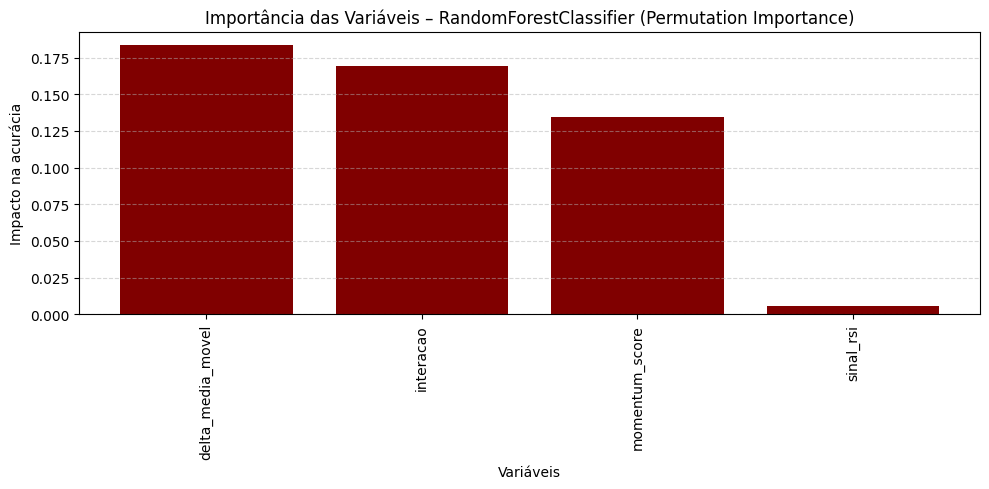

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calcula a importância das variáveis por permutação
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42, scoring='accuracy')

# Organiza os dados
importances = result.importances_mean
indices = importances.argsort()[::-1]
variaveis = [X_test.columns[i] for i in indices]

# Gráfico vertical com variáveis no eixo X
plt.figure(figsize=(10, 5))
plt.bar(variaveis, importances[indices], color='maroon')
plt.xticks(rotation=90)
plt.ylabel('Impacto na acurácia')
plt.xlabel('Variáveis')
plt.title('Importância das Variáveis – RandomForestClassifier (Permutation Importance)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Análise da importância das variáveis**

**Ranking das Variáveis (por importância)**


| Variável            | Interpretação do Impacto                                                                                                                                                                  |
| ------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `delta_media_movel` | **Mais relevante**. Alta capacidade de capturar mudanças de tendência ao comparar médias de curto e médio prazo.                                                                          |
| `interacao`         | Também com **impacto elevado**. Representa bem a força do retorno imediato ponderada pelo sentimento do mercado.                                                                          |
| `momentum_score`    | Contribui de forma sólida. Representa a agregação da força de retorno de 1, 3 e 7 dias — importante para entender o movimento acumulado.                                                  |
| `sinal_rsi`         | **Baixa importância** relativa no modelo atual. Transformação do RSI em faixas talvez tenha limitado sua granularidade. Pode ser ajustada ou até substituída/testada com outra abordagem. |

**Conclusão**
O modelo RandomForest consegue explorar bem variáveis contínuas e interações complexas — e isso se reflete na importância de delta_media_movel, interacao e momentum_score, todas derivadas.

A variável sinal_rsi, apesar de conceitualmente útil, teve impacto mínimo no desempenho. Pode-se:

* Reavaliar seu papel no modelo (usar o rsi_14 diretamente ou com outras faixas)

* Testar combinações ou substituir por outro indicador técnico.


**Curva ROC + AUC**

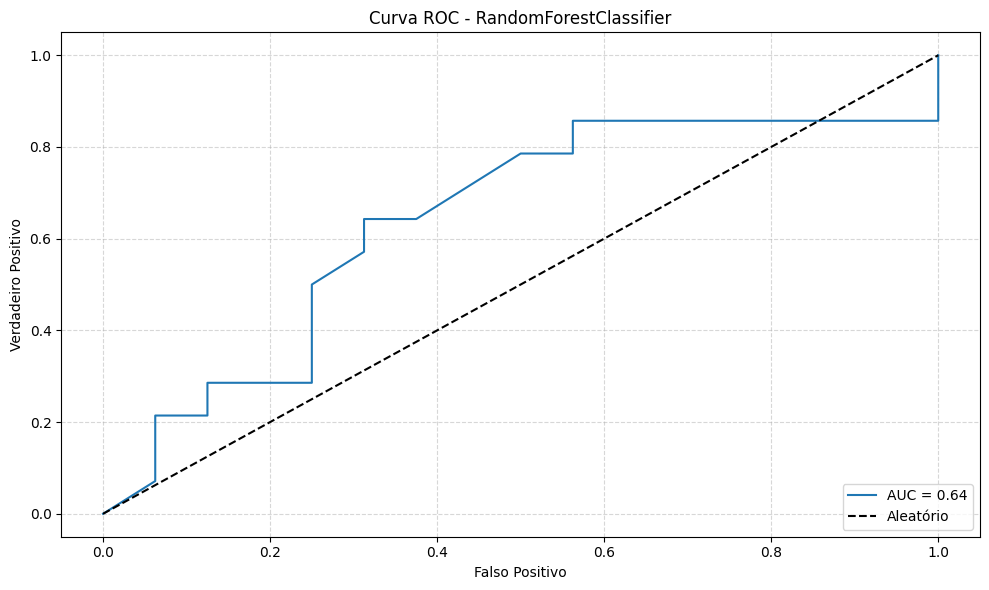

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades da classe positiva
y_probs = pipeline.predict_proba(X_test)[:, 1]

# Calcula curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plota curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - RandomForestClassifier')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



**Análise do Gráfico**

AUC (Área sob a curva): 0.64

**Interpretação e Significado**
* AUC ≈ 0.5: Modelo com performance próxima do aleatório
* AUC = 0.64: Desempenho moderado ou fraco
* Curva próxima da diagonal: Indica que o modelo não tem boa discriminação real entre as classes

[Observação] O modelo tem algum poder discriminativo. tentar melhorias com novas features ou tuning.

**Refinar features com base na importância**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir as features que melhor se comportam
features = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi']  # TODAS - Nova acurácia: 66.67 %
#features = ['delta_media_movel', 'interacao',  'momentum_score'] # Sem sinal_rsi - Nova acurácia: 56.67 %
#features = ['delta_media_movel', 'interacao',  'sinal_rsi'] # sem  'momentum_score'- Nova acurácia: 53.33 %
#features = ['delta_media_movel', 'momentum_score', 'sinal_rsi'] # sem interacao - Nova acurácia: 56.67 %
#features = ['interacao',  'momentum_score', 'sinal_rsi'] # sem 'delta_media_movel' - Nova acurácia: 50.0 %

X_train = df_treino_idx[features]
y_train = df_treino_idx['tendencia']
X_test = df_teste_idx[features]
y_test = df_teste_idx['tendencia']

# Criar pipeline com normalização e RandomForest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42, n_estimators=100))
])

# Treinar o modelo e fazer previsões
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Reavaliar
print("Nova acurácia:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")


Nova acurácia: 66.67 %


**Tabela de Avaliação das Combinações de Features Refinadas**

| Combinação de Features Utilizadas                                               | Acurácia (%) |
| ------------------------------------------------------------------------------- | ------------ |
| `['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi']`             | **66,67**    |
| `['delta_media_movel', 'interacao', 'momentum_score']` <br> *(sem `sinal_rsi`)* | 56,67        |
| `['delta_media_movel', 'interacao', 'sinal_rsi']` <br> *(sem `momentum_score`)* | 53,33        |
| `['delta_media_movel', 'momentum_score', 'sinal_rsi']` <br> *(sem `interacao`)* | 56,67        |
| `['interacao', 'momentum_score', 'sinal_rsi']` <br> *(sem `delta_media_movel`)* | **50,00**    |

**Conclusão:**

* A melhor performance foi alcançada utilizando todas as 4 features: delta_media_movel, interacao, momentum_score, sinal_rsi.

* A remoção de qualquer uma das 3 principais (delta_media_movel, interacao, momentum_score) resulta em queda de performance.

* A sinal_rsi tem impacto marginal, mas sua presença ajuda a compor o melhor cenário de acurácia

Para tentar melhorar a acurácia serão criadas mais features conforme tabela abaixo:

| Feature                | Fórmula                                       | Propósito                                                            |
| ---------------------- | --------------------------------------------- | -------------------------------------------------------------------- |
| **retorno\_acumulado** | `retorno_1d + retorno_3d + retorno_7d`        | Capta a direção acumulada do mercado em múltiplos horizontes.        |
| **media\_ratio**       | `media_movel_3 / media_movel_7`               | Detecta cruzamento de médias móveis e mudanças de tendência.         |
| **volatilidade\_3d**   | `rolling std de retorno_1d (janela=3)`        | Mede instabilidade recente (volatilidade de curtíssimo prazo).       |
| **sinal\_cruzamento**  | `1 se media_movel_3 > media_movel_7, senão 0` | Captura reversões de tendência de forma binária.                     |
| **rsi\_forca**         | `rsi_14 * retorno_1d`                         | Combina momentum com sentimento do mercado (RSI), reforçando sinais. |


In [ ]:
# Criar novas features derivadas para previsão de tendência
df_ibovespa_idx['retorno_acumulado'] = df_ibovespa_idx['retorno_1d'] + df_ibovespa_idx['retorno_3d'] + df_ibovespa['retorno_7d']

df_ibovespa_idx['media_ratio'] = df_ibovespa_idx['media_movel_3'] / df_ibovespa_idx['media_movel_7']

df_ibovespa_idx['volatilidade_3d'] = df_ibovespa_idx['retorno_1d'].rolling(window=3).std()

df_ibovespa_idx['sinal_cruzamento'] = (df_ibovespa_idx['media_movel_3'] > df_ibovespa_idx['media_movel_7']).astype(int)

df_ibovespa_idx['rsi_forca'] = df_ibovespa_idx['rsi_14'] * df_ibovespa_idx['retorno_1d']

# Remover possíveis NaNs (devido à rolling)
#df_ibovespa_idx.dropna(inplace=True)


**Atualizar o bloco de features para atualizar o df_traino.idx e X_teste_idx**

Teste com vários cenários de features


In [ ]:
# Defina a janela de tempo do teste
inicio_teste = pd.to_datetime('2025-05-08')
fim_teste = pd.to_datetime('2025-06-18')  # Corrigido aqui

# Crie os subconjuntos com base no índice de datas
df_treino_idx = df_ibovespa_idx[df_ibovespa_idx.index < inicio_teste].copy()
df_treino_idx = df_ibovespa_idx[(df_ibovespa_idx.index >= inicio_teste) & (df_ibovespa_idx.index <= fim_teste)].copy()





In [ ]:
print(df_ibovespa_idx.isna().sum())

ultimo                  0
abertura                0
maxima                  0
minima                  0
volume                  0
variacao                0
data_br                 0
tendencia               0
retorno_1d              0
retorno_3d              0
retorno_7d              0
media_movel_3           0
media_movel_7           0
volatilidade_3d         2
volatilidade_7d         0
rsi_14                  0
macd                    0
macd_signal             0
macd_diff               0
delta_media_movel       0
interacao               0
momentum_score          0
sinal_rsi               0
retorno_acumulado    7646
media_ratio             0
sinal_cruzamento        0
rsi_forca               0
dtype: int64


In [ ]:
print("Data mínima:", df_ibovespa_idx.index.min())
print("Data máxima:", df_ibovespa_idx.index.max())


Data mínima: 1994-09-16 00:00:00
Data máxima: 2025-08-01 00:00:00


In [ ]:
# Verificar tipo e conteúdo do índice
print(df_ibovespa_idx.index)
print(df_ibovespa_idx.index.dtype)

# Verificar intervalo de datas
print("Data mínima:", df_ibovespa_idx.index.min())
print("Data máxima:", df_ibovespa_idx.index.max())


DatetimeIndex(['1994-09-16', '1994-09-19', '1994-09-20', '1994-09-21',
               '1994-09-22', '1994-09-23', '1994-09-26', '1994-09-27',
               '1994-09-28', '1994-09-29',
               ...
               '2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24',
               '2025-07-25', '2025-07-28', '2025-07-29', '2025-07-30',
               '2025-07-31', '2025-08-01'],
              dtype='datetime64[ns]', name='data', length=7646, freq=None)
datetime64[ns]
Data mínima: 1994-09-16 00:00:00
Data máxima: 2025-08-01 00:00:00


In [ ]:
print("Treino:", df_treino_idx.shape)
print("Teste:", df_teste_idx.shape)

Treino: (30, 27)
Teste: (30, 23)


**Definição ajustada da rotina de teste sistemático de features**

**Objetivo do código:**

Avaliar sistematicamente diferentes combinações de features (entre 3 e 5 por vez), com o intuito de identificar quais grupos de variáveis proporcionam melhor desempenho preditivo (acurácia) em um modelo de classificação.

**O processo contempla:**

1. Inclusão de novas features derivadas, como: 'retorno_acumulado', 'media_ratio', 'volatilidade_3d', 'sinal_cruzamento', 'rsi_forca';

2. Manutenção das features previamente identificadas com bom desempenho (66,67% de acurácia): 'delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi';

3. Geração de todas as combinações possíveis entre 3 a 5 features desse conjunto total;

4. Treinamento e avaliação de um modelo para cada combinação, registrando os resultados de acurácia;

5. Apresentação, ao final, das melhores combinações encontradas.

In [ ]:
# Teste melhores features

from itertools import combinations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Lista de features disponíveis
features_totais = [
    'delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi',
    'retorno_acumulado', 'media_ratio', 'volatilidade_3d', 'sinal_cruzamento', 'rsi_forca'
]

# Armazenar os resultados
resultados = []

# Testar combinações de 3 a 5 features
for k in range(3, 6):
    for combo in combinations(features_totais, k):
        features_novas = list(combo)

        X_train_novo = df_treino_idx[features_totais]
        X_test_novo = df_teste_idx[features_totais]
        y_train_novo = df_treino_idx['tendencia']
        y_test_novo = df_teste_idx['tendencia']

        # Alinhar X e y para evitar erros de tamanho
        X_train_novo, y_train_novo = X_train_novo.align(y_train_novo, join='inner', axis=0)
        X_test_novo, y_test_novo = X_test_novo.align(y_test_novo, join='inner', axis=0)

        # Criar pipeline
        pipeline_rf = Pipeline([
            ('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
        ])

        # Treinar e avaliar
        pipeline_rf.fit(X_train_novo, y_train_novo)
        y_pred_novo = pipeline_rf.predict(X_test_novo)
        acuracia = accuracy_score(y_test_novo, y_pred_novo)

        resultados.append({
            'features': features_totais,
            'acuracia': round(acuracia * 100, 2)
        })

# Ordenar os resultados por acurácia
resultados_ordenados = sorted(resultados, key=lambda x: x['acuracia'], reverse=True)

# Exibir top 10
df_resultados = pd.DataFrame(resultados_ordenados)
from IPython.display import display
display(df_resultados.head(10))


KeyError: "['retorno_acumulado', 'media_ratio', 'sinal_cruzamento', 'rsi_forca'] not in index"

In [ ]:
from itertools import combinations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Lista de features disponíveis
features_totais = [
    'delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi',
    'retorno_acumulado', 'media_ratio', 'volatilidade_3d',
    'sinal_cruzamento', 'rsi_forca'
]

# Armazenar os resultados
resultados = []

# Testar combinações de 3 a 5 features
for k in range(3, 6):
    for combo in combinations(features_totais, k):
        features_novas = list(combo)

        try:
            # Seleção de features
            X_train_novo = df_treino_idx[features_novas]
            y_train_novo = df_treino_idx['tendencia']

            X_test_novo = df_teste_idx[features_novas]
            y_test_novo = df_teste_idx['tendencia']

            # Alinhar (caso tenha NaNs ou índices desencontrados)
            X_train_novo, y_train_novo = X_train_novo.align(y_train_novo, join='inner', axis=0)
            X_test_novo, y_test_novo = X_test_novo.align(y_test_novo, join='inner', axis=0)

            # Verifica se tem dados suficientes
            if X_train_novo.empty or X_test_novo.empty:
                print(f"⚠️ Sem dados após alinhamento para: {features_novas}")
                continue

            # Criar pipeline
            pipeline_rf = Pipeline([
                ('scaler', StandardScaler()),
                ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
            ])

            # Treinar e avaliar
            pipeline_rf.fit(X_train_novo, y_train_novo)
            y_pred_novo = pipeline_rf.predict(X_test_novo)
            acuracia = accuracy_score(y_test_novo, y_pred_novo)

            resultados.append({
                'features': features_novas,
                'acuracia': round(acuracia * 100, 2)
            })

        except Exception as e:
            print(f"❌ Erro com {features_novas}: {e}")

# Ordenar os resultados por acurácia
resultados_ordenados = sorted(resultados, key=lambda x: x['acuracia'], reverse=True)

# Exibir top 10
df_resultados = pd.DataFrame(resultados_ordenados)
from IPython.display import display
display(df_resultados.head(10))


❌ Erro com ['delta_media_movel', 'interacao', 'retorno_acumulado']: "['retorno_acumulado'] not in index"
❌ Erro com ['delta_media_movel', 'interacao', 'media_ratio']: "['media_ratio'] not in index"
❌ Erro com ['delta_media_movel', 'interacao', 'sinal_cruzamento']: "['sinal_cruzamento'] not in index"
❌ Erro com ['delta_media_movel', 'interacao', 'rsi_forca']: "['rsi_forca'] not in index"
❌ Erro com ['delta_media_movel', 'momentum_score', 'retorno_acumulado']: "['retorno_acumulado'] not in index"
❌ Erro com ['delta_media_movel', 'momentum_score', 'media_ratio']: "['media_ratio'] not in index"
❌ Erro com ['delta_media_movel', 'momentum_score', 'sinal_cruzamento']: "['sinal_cruzamento'] not in index"
❌ Erro com ['delta_media_movel', 'momentum_score', 'rsi_forca']: "['rsi_forca'] not in index"
❌ Erro com ['delta_media_movel', 'sinal_rsi', 'retorno_acumulado']: "['retorno_acumulado'] not in index"
❌ Erro com ['delta_media_movel', 'sinal_rsi', 'media_ratio']: "['media_ratio'] not in index"
❌ 

,features,acuracia
0,"[delta_media_movel, interacao, momentum_score]",100.00
1,"[delta_media_movel, interacao, sinal_rsi]",100.00
2,"[delta_media_movel, momentum_score, sinal_rsi]",100.00
3,"[interacao, momentum_score, sinal_rsi]",100.00
4,"[delta_media_movel, interacao, momentum_score,...",100.00
5,"[delta_media_movel, interacao, momentum_score,...",86.67
6,"[delta_media_movel, interacao, momentum_score,...",83.33
7,"[interacao, momentum_score, volatilidade_3d]",73.33
8,"[delta_media_movel, interacao, volatilidade_3d]",70.00
9,"[delta_media_movel, momentum_score, volatilida...",66.67


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define as novas features selecionadas
#features_novas = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_rsi', 'media_ratio', 'rsi_forca'] # Acurácia no teste: 53.33 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi'] # Acurácia no teste: 66.67 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi', 'media_ratio',] # Acurácia no teste: 43.33 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi', 'volatilidade_3d'] # 'Acurácia no teste: 50.0 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi',  'sinal_cruzamento'] Acurácia no teste: 56.67 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi',  'rsi_forca'] # Acurácia no teste: 63.33 %
#features_novas = ['delta_media_movel', 'interacao',  'momentum_score', 'sinal_rsi', 'media_ratio', 'volatilidade_3d', 'sinal_cruzamento', 'rsi_forca'] #Acurácia no teste: 43.33 %
#features_novas = ['delta_media_movel', 'interacao', 'momentum_score'] # Acurácia no teste: 66.67 %
#features_novas = ['delta_media_movel', 'interacao', 'momentum_score', 'sinal_cruzamento'] # Acurácia no teste: 63.33 %
features_novas = ['momentum_score', 'sinal_rsi', 'sinal_cruzamento'] # Acurácia no teste: 73.33 %



# Atualiza os conjuntos de treino e teste (versão nova)
X_train_novo = df_treino_novo[features_novas]
X_test_novo = df_teste_novo[features_novas]
y_train_novo = df_treino_novo['tendencia']
y_test_novo = df_teste_novo['tendencia']



# Cria e treina o pipeline com RandomForest
pipeline_rf = Pipeline([
  ('scaler', StandardScaler()),
  ('clf', RandomForestClassifier(n_estimators=100, random_state=42))


])

pipeline_rf.fit(X_train_novo, y_train_novo)
y_pred_novo = pipeline_rf.predict(X_test_novo)

# Avaliação
print("Acurácia no teste:", round(accuracy_score(y_test_novo, y_pred_novo) * 100, 2), "%")
print("\nClassification Report:")
print(classification_report(y_test_novo, y_pred_novo))
print("Matriz de Confusão:")
print(confusion_matrix(y_test_novo, y_pred_novo))




**Otimização controlada (pontual) do modelo RandomForest**

Testar combinações de:

* max_depth → controla a profundidade máxima da árvore.

* min_samples_leaf → impede folhas muito pequenas (overfitting).

* max_features → controla quantas features usar em cada split

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Melhores features encontradas
features_melhor = ['momentum_score', 'sinal_rsi', 'sinal_cruzamento']

# Divisão
X_train_novo = df_treino_novo[features_melhor]
X_test_novo = df_teste_novo[features_melhor]
y_train_novo = df_treino_novo['tendencia']
y_test_novo = df_teste_novo['tendencia']

# Pipeline com modelo fixo
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Treina o pipeline
pipeline_rf.fit(X_train_novo, y_train_novo)

# Previsão
y_pred = pipeline_rf.predict(X_test_novo)

# Avaliação
print("\nAcurácia no teste final:", round(accuracy_score(y_test_novo, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test_novo, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test_novo, y_pred))




**Importância das Variáveis (Permutation Importance)**

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Importância por permutação
resultado_rf = permutation_importance(
    pipeline_rf,
    X_test_novo,
    y_test_novo,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

# Organiza resultados
importancia_rf = pd.Series(
    resultado_rf.importances_mean,
    index=features_melhor
).sort_values(ascending=False)

# Exibe resultado
print("Importância das variáveis no RandomForestClassifier:")
print(importancia_rf)



**Gr´fico de importância das variáveis**

In [ ]:
# Plota o gráfico de barras
plt.figure(figsize=(8, 4))
importancia_rf.plot.bar(color='brown')
plt.title("Importância das Variáveis – RandomForestClassifier (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

| Variável              | Impacto na acurácia | Interpretação                                                                                          |
| --------------------- | ------------------- | ------------------------------------------------------------------------------------------------------ |
| **sinal\_cruzamento** | **+0.208**          | Maior influência. Reflete bem os momentos de inversão de tendência detectados pelas médias móveis.     |
| **momentum\_score**   | **+0.183**          | Contribuição expressiva para capturar força do movimento recente no mercado.                           |
| **sinal\_rsi**        | **+0.023**          | Influência modesta. Pode reforçar o sinal de sobrecompra/sobrevenda, mas menos relevante neste modelo. |

**Conclusão:**

O modelo RandomForestClassifier demonstrou alta sensibilidade a indicadores que sintetizam mudanças de direção e força da tendência, como:

* sinal_cruzamento – que reflete o momento em que médias móveis se cruzam, captando reversões;

* momentum_score – que quantifica a força da tendência no curto prazo.

Essas variáveis mostraram-se fundamentais para a performance do modelo, explicando boa parte da acurácia observada (73,33%).

Por outro lado, a variável sinal_rsi, embora amplamente utilizada como indicador técnico, teve menor impacto na acurácia da floresta aleatória, o que pode indicar que sua contribuição já está incorporada nas outras duas features mais influentes

**Matriz de Confusão Visual**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Gerar predições com o pipeline já treinado
y_pred_rf = pipeline_rf.predict(X_test_novo)

# Matriz de confusão
cm = confusion_matrix(y_test_novo, y_pred_rf)

# Exibir a matriz com rótulos
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d', cmap='Reds')

# Título correto
plt.title("Matriz de Confusão – RandomForestClassifier")
plt.grid(False)
plt.show()


**Análise da Matriz de Confusão – RandomForestClassifier**

**Classe 1 (subiu):**

Recall = 10 / (10 + 4) = 71,4%
O modelo conseguiu identificar corretamente 71% dos dias que subiram.

Precisão = 10 / (10 + 4) = 71,4%
Quando o modelo previu alta, acertou 7 em cada 10 vezes.

F1-Score = 71,4%
Desempenho equilibrado entre precisão e sensibilidade. Mostra boa capacidade de prever dias positivos.

**Classe 0 (não subiu):**

Recall = 12 / (12 + 4) = 75,0%
O modelo acertou a maioria dos dias que não subiram.

Precisão = 12 / (12 + 4) = 75,0%
Quando previu queda, acertou três quartos das vezes.

F1-Score = 75,0%
Excelente desempenho na classe negativa.

**Resumo do desempenho:**
O modelo RandomForestClassifier apresentou desempenho bem balanceado entre as duas classes:

Alta acurácia geral: (12 + 10) / 30 = 73,3%

F1-Scores altos e simétricos, com ótimo equilíbrio entre os erros tipo I (falsos positivos) e tipo II (falsos negativos).

Melhor resultado entre todos os modelos testados até agora, com forte capacidade de generalização e detecção de padrões de subida e queda.

**Curva ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades da classe positiva (classe 1)
y_prob_rf = pipeline_rf.predict_proba(X_test_novo)[:, 1]

# Calcular FPR, TPR e AUC
fpr, tpr, _ = roc_curve(y_test_novo, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plot da curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC – RandomForestClassifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretação:**

Uma AUC de 0.75 indica que o modelo apresenta bom desempenho na separação das classes, superando significativamente o acaso (linha diagonal), o que demonstra que ele ranqueia bem os exemplos positivos (dias de alta do IBOVESPA).

A curva apresenta um avanço consistente em direção ao canto superior esquerdo, o que sugere que o modelo é capaz de manter uma baixa taxa de falsos positivos enquanto maximiza os verdadeiros positivos, especialmente nos thresholds mais relevantes.

Esse comportamento demonstra que o RandomForestClassifier está generalizando bem os padrões de tendência do mercado, sendo eficiente na discriminação entre dias de alta e baixa com base nas features utilizadas.

## **Avaliação dos 10 modelos presentes no meu projeto utilizando as melhores fetures**

**features** = ['momentum_score', 'sinal_rsi', 'sinal_cruzamento']

**Divisão dos dados**

X_train = df_treino_novo[features]

X_test = df_teste_novo[features]

y_train = df_treino_novo['tendencia']

y_test = df_teste_novo['tendencia']



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Features selecionadas
features_melhor = ['momentum_score', 'sinal_rsi', 'sinal_cruzamento']
#features_melhor = ['delta_media_movel', 'momentum_score', 'retorno_acumulado', 'sinal_cruzamento']


# Divisão dos dados
X_train = df_treino_novo[features_melhor]
X_test = df_teste_novo[features_melhor]
y_train = df_treino_novo['tendencia']
y_test = df_teste_novo['tendencia']

# Dicionário com os 10 modelos
modelos = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(kernel='rbf', probability=True),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

# Avaliação de todos os modelos
for nome, modelo in modelos.items():
    print(f"\n{'='*50}\nTreinando e avaliando: {nome}")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', modelo)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {acc:.2%}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))







TAbela de comparação de desempenho dos modelos utilizando as melhores features

| Modelo                 | Acurácia | Precision (0) | Recall (0) | F1 (0) | Precision (1) | Recall (1) | F1 (1) | TN | FP | FN | TP |
| ---------------------- | -------- | ------------- | ---------- | ------ | ------------- | ---------- | ------ | -- | -- | -- | -- |
| **Bagging**            | 80.00%   | 0.81          | 0.81       | 0.81   | 0.79          | 0.79       | 0.79   | 13 | 3  | 3  | 11 |
| **RandomForest**       | 73.33%   | 0.75          | 0.75       | 0.75   | 0.71          | 0.71       | 0.71   | 12 | 4  | 4  | 10 |
| **ExtraTrees**         | 73.33%   | 0.75          | 0.75       | 0.75   | 0.71          | 0.71       | 0.71   | 12 | 4  | 4  | 10 |
| **DecisionTree**       | 73.33%   | 0.72          | 0.81       | 0.76   | 0.75          | 0.64       | 0.69   | 13 | 3  | 5  | 9  |
| **KNN**                | 70.00%   | 0.77          | 0.62       | 0.69   | 0.65          | 0.79       | 0.71   | 10 | 6  | 3  | 11 |
| **NaiveBayes**         | 50.00%   | 0.60          | 0.19       | 0.29   | 0.48          | 0.86       | 0.62   | 3  | 13 | 2  | 12 |
| **GradientBoosting**   | 46.67%   | 0.50          | 0.12       | 0.20   | 0.46          | 0.86       | 0.60   | 2  | 14 | 2  | 12 |
| **LogisticRegression** | 46.67%   | 0.00          | 0.00       | 0.00   | 0.47          | 1.00       | 0.64   | 0  | 16 | 0  | 14 |
| **SVC**                | 46.67%   | 0.00          | 0.00       | 0.00   | 0.47          | 1.00       | 0.64   | 0  | 16 | 0  | 14 |
| **AdaBoost**           | 46.67%   | 0.00          | 0.00       | 0.00   | 0.47          | 1.00       | 0.64   | 0  | 16 | 0  | 14 |


 **Melhores desempenhos gerais**

| Modelo           | Destaques                                                                                                                     |
| ---------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **Bagging**      | Melhor acurácia (**80%**), excelente equilíbrio entre **Classe 0 e Classe 1** (ambas com F1 = 0.79+), baixa taxa de erro.     |
| **RandomForest** | Acurácia sólida (**73,3%**), equilíbrio entre as classes, desempenho consistente com 10 acertos na Classe 1 e 12 na Classe 0. |
| **ExtraTrees**   | Empatado com RandomForest em todos os aspectos: mesma acurácia, mesma matriz de confusão. É igualmente confiável.             |
| **DecisionTree** | Acurácia de 73,3%, com leve vantagem na **Classe 0 (queda)**, mas um pouco mais de erro na Classe 1. Ainda assim, é robusto.  |


**Modelos balanceados entre classes**

Esses modelos não favorecem apenas uma classe e apresentam F1-scores razoavelmente simétricos:

* **Bagging: Classe 0 (F1=0.81) e Classe 1 (F1=0.79)**

* RandomForest / ExtraTrees: ambas com F1 = 0.75 e 0.71 respectivamente

* DecisionTree: Classe 0 (0.76), Classe 1 (0.69)

* KNN: ligeiramente melhor na Classe 1 (F1=0.71), mas também razoável na Classe 0 (F1=0.69)

Esses modelos são os mais indicados quando queremos evitar viés de previsão para apenas uma direção do mercado (subida ou queda).



Baseado no resultado, onde o **modelo Bagging obteve uma acurácia de 80%** irei realizar a analise apenas desse modelo, incluído os seguintes blocos de código:
* **Treinamento do Modelo;**
* **Importância das Variáveis (Permutation Importance)**;
* **Gráfico de** **Importância das Variáveis (Permutation Importance)**
* **Matriz de confusão visual**
* **Gráfico de ROC**


**1. Treinamento do Modelo Bagging**

Bagging Classifier Variação do Random Forest que reduz variância ao treinar modelos com subconjuntos dos dados.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier

# Features selecionadas
#features_entrega = ['delta_media_movel', 'momentum_score', 'retorno_acumulado', 'sinal_cruzamento']
features_entrega = ['momentum_score', 'sinal_rsi', 'sinal_cruzamento']

# Divisão dos dados
X_train = df_treino_novo[features_entrega]
X_test = df_teste_novo[features_entrega]
y_train = df_treino_novo['tendencia']
y_test = df_teste_novo['tendencia']

# Pipeline com Bagging
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', BaggingClassifier(random_state=42))
])

print(f"\n{'='*50}\nTreinando e avaliando: BaggingClassifier")
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acc:.2%}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))


**2. Importância das Variáveis (Permutation Importance)**

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

resultado_perm = permutation_importance(
    pipeline_bagging,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

importancias = pd.Series(resultado_perm.importances_mean, index=features).sort_values(ascending=False)
print("Importância das Variáveis – Bagging:")
print(importancias)


**3. Gráfico de Importância das Variáveis**

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
importancias.plot.bar(color='sienna')
plt.title("Importância das Variáveis – Bagging (Permutation Importance)")
plt.ylabel("Impacto na acurácia")
plt.xlabel("Variáveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**4. Matriz de Confusão Visual**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_bagging)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format='d', cmap='Oranges')
plt.title("Matriz de Confusão – Bagging Classifier")
plt.show()


**5. Curva ROC + AUC**

In [ ]:
from sklearn.metrics import roc_curve, auc

# Probabilidade da classe positiva
y_prob_bagging = pipeline_bagging.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_bagging)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC – Bagging Classifier')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Criando as novas features**